In [1]:
import csv
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from utils import group_entropies_by_dialogue_id, group_sbs_data_by_dialogue_id

## Dialogues generated by GPT3

Import of step entropies 

In [25]:
# Percorsi dei file di entropia
entropy_paths = {
    "raw_app1_gpt3ongpt3_k5_nores": "./data/generation/8_mcrae/gpt/entropy/old_entropy/sbs_entropy_k_five_cleaned.csv",
    "raw_app1_gpt3ongpt3_k10_nores": "./data/generation/8_mcrae/gpt/entropy/old_entropy/sbs_entropy_k_ten_cleaned.csv",
    "raw_app1_gpt3ongpt3_k20_nores": "./data/generation/8_mcrae/gpt/entropy/old_entropy/sbs_entropy_k_twenty_cleaned.csv",
    "raw_app1_gpt3ongpt4o_k5_nores_noapo": "./data/generation/8_mcrae/gpt/entropy/old_entropy/sbs_entropy_k_five_gpt4o_apocalypse_cleaned.csv",
    "raw_app1_gpt3ongpt4o_k10_nores_noapo": "./data/generation/8_mcrae/gpt/entropy/old_entropy/sbs_entropy_k_ten_gpt4o_apocalypse_cleaned.csv"
}

# Funzione per caricare e raggruppare le entropie per dialog_id
def load_and_group_entropy(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.DictReader(file, delimiter=",")
        grouped_data, max_length = group_entropies_by_dialogue_id(reader)
    return grouped_data, max_length

In [59]:
# Dizionari per memorizzare i dati raggruppati e la lunghezza massima dei dialoghi
grouped_entropies = {}
max_dialogue_lengths = {}

# Caricamento e raggruppamento di tutti i file di entropia
for key, path in entropy_paths.items():
    grouped_data, max_length = load_and_group_entropy(path)
    grouped_entropies[key] = grouped_data
    max_dialogue_lengths[key] = max_length

print(grouped_entropies["raw_app1_gpt3ongpt3_k5_nores"])
max_dialogue_length_gpt3 = max_dialogue_lengths["raw_app1_gpt3ongpt3_k5_nores"] 
print(max_dialogue_length_gpt3)

{0: [2.0, 2.0, 1.9938, 1.4834, 1.5774, 0.6501], 1: [3.0, 2.9588, 2.787, 1.6499], 2: [2.0, 2.0, 2.0, 1.5849, 0.9544, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 3: [2.2577, 1.8257, 1.8091, -0.0], 4: [2.0, 1.9938, 1.9238, 1.9714, 0.8631], 5: [2.0, 1.921, 1.921, 1.2988], 6: [2.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], 7: [2.0, 1.9911, 1.0, 1.0, 1.0, -0.0, -0.0, -0.0], 8: [2.0, 2.0, 2.0, 1.5849, -0.0], 9: [2.0, 2.0, 1.9714, 1.8257, 1.0, 1.0, 1.0, 1.0, 0.9911, 1.0, 0.9911, 0.9911, 0.9911], 10: [1.9709, 2.0, 1.5774, 1.5849, 1.0, 1.0, 1.0, 1.0, 0.9911, 1.0, 0.9544, 1.0, -0.0, -0.0], 11: [1.9938, 2.0, 1.5546, 1.5766, 1.5395, 1.2988, 1.3486, 0.9911, 0.9544, 0.6501], 12: [2.0, 2.0, 1.9709, 0.9544, 0.8113, -0.0], 13: [2.0, 1.5849, 1.5849, 1.5849, 1.0, 1.0, -0.0, -0.0, -0.0, -0.0], 14: [2.0, 1.0, 1.0, -0.0, -0.0], 15: [2.3166, 1.5849, 1.5849, 1.5849, 1.5849, 1.4834], 16: [1.9938, 2.0, 2.0, 1.5774, 0.9544, 0.6501, 0.6501], 17: [2.5161, 2.5803, 2.1645, 2.2427, 1.7899, 1.3486, -0.0], 18: [2.

Importing dialogues with the distributions calculated by approach 1 and 2

In [114]:
# Lista dei percorsi dei file di dati
dialogues_gpt3_paths = {
    "app1_gpt3ongpt3_k5": "./data/generation/8_mcrae/gpt/dialogues/app1_gpt3ongpt3_k5.csv",
    "app1_gpt3ongpt3_k10": "./data/generation/8_mcrae/gpt/dialogues/app1_gpt3ongpt3_k10.csv",
    "app1_gpt3ongpt3_k20": "./data/generation/8_mcrae/gpt/dialogues/app1_gpt3ongpt3_k20_error_target.csv",
    "app1_gpt4ongpt3_k5": "./data/generation/8_mcrae/gpt/dialogues/app1_gpt4ongpt3_k5.csv",
    "app1_gpt4ongpt3_k10": "./data/generation/8_mcrae/gpt/dialogues/app1_gpt4ongpt3_k10.csv",
    "app1_gpt4ongpt3_k20": "./data/generation/8_mcrae/gpt/dialogues/app1_gpt4ongpt3_k20.csv",
    "app2_gpt3ongpt3_k5": "./data/generation/8_mcrae/gpt/dialogues/app2_gpt3ongpt3_k5.csv",
    "app2_gpt4ongpt3_k5": "./data/generation/8_mcrae/gpt/dialogues/app2_gpt4ongpt3_k5.csv"
}

# Funzione per caricare e raggruppare i dati per dialog_id
def load_and_group_data(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.DictReader(file, delimiter=",")
        grouped_dialogues = group_sbs_data_by_dialogue_id(reader)
    return grouped_dialogues

In [115]:
# Dizionario per memorizzare i dati raggruppati
grouped_dialogues = {}

# Caricamento e raggruppamento di tutti i file
for key, path in dialogues_gpt3_paths.items():
    grouped_dialogues[key] = load_and_group_data(path)


print(grouped_dialogues["app1_gpt3ongpt3_k5"])

[{'dialogue_id': 0, 'intra_dialogues': [{'intra_dialogue_id': 0, 'p_distribuition': {'elk': 0.25, 'chicken': 0.0, 'robin': 0.0, 'starling': 0.0, 'fox': 0.25, 'partridge': 0.0, 'hamster': 0.25, 'buffalo': 0.25}, 'target': 'fawn', 'question': 'Is your item a bird?', 'answer': 'No.'}, {'intra_dialogue_id': 1, 'p_distribuition': {'elk': 0.2083, 'chicken': 0.1667, 'robin': 0.0, 'starling': 0.0, 'fox': 0.2083, 'partridge': 0.0, 'hamster': 0.2083, 'buffalo': 0.2083}, 'target': 'fawn', 'question': 'Is your item a mammal?', 'answer': 'Yes.'}, {'intra_dialogue_id': 2, 'p_distribuition': {'elk': 0.2381, 'chicken': 0.0952, 'robin': 0.0, 'starling': 0.0, 'fox': 0.2381, 'partridge': 0.0, 'hamster': 0.1905, 'buffalo': 0.2381}, 'target': 'fawn', 'question': 'Is your item typically kept as a pet?', 'answer': 'No.'}, {'intra_dialogue_id': 3, 'p_distribuition': {'elk': 0.1111, 'chicken': 0.1111, 'robin': 0.0, 'starling': 0.1667, 'fox': 0.2778, 'partridge': 0.0556, 'hamster': 0.2778, 'buffalo': 0.0}, 'tar

### Ideal entropy computation

In [30]:
num_cand = 8
entropies_optimal = {'dialogue_id': [], 'intra_dialogue_id': [], 'entropy_op': []}
for dialogue_id, dialogue in enumerate(grouped_dialogues['app1_gpt3ongpt3_k5']):
    intra_dialogues = dialogue["intra_dialogues"]
    total_steps = len(intra_dialogues)
    initial_num_candidates = 8
    num_candidates = initial_num_candidates
    for i in range(total_steps):
        # num_candidates = max(1, initial_num_candidates - i * (initial_num_candidates - 1) // (total_steps - 1))
        num_candidates = max(1, int(num_candidates / 2))
        
        optimal_distribution = np.zeros(8)
        for j in range(0, num_candidates):
            optimal_distribution[j] = 1 / num_cand
        entropy_opt = sp.stats.entropy(optimal_distribution, base=2)
        entropies_optimal['dialogue_id'].append(dialogue_id)
        entropies_optimal['intra_dialogue_id'].append(i)
        entropies_optimal['entropy_op'].append(entropy_opt)
        # print(f"Step {i}, Entropy: {entropy_opt}, num_candidate: {num_candidates}")
       

In [31]:
current_dialogue_id = -1
max_length = 0
entropies_ideal = {}

for i in range(len(entropies_optimal['dialogue_id'])):
    dialogue_id = entropies_optimal['dialogue_id'][i]
    if(dialogue_id != ''):
      dialogue_id = int(dialogue_id)
      intra_dialogue_id = int(entropies_optimal['intra_dialogue_id'][i])

      if(dialogue_id != current_dialogue_id):
        entropies_ideal[dialogue_id] = []
        current_dialogue_id = dialogue_id
      
      entropies_ideal[dialogue_id].append(entropies_optimal['entropy_op'][i])
      
      if(intra_dialogue_id > max_length):
        max_length = intra_dialogue_id
# print(entropies_ideal)
# print(max_length+1)

In [10]:
def entropy_from_end(entropies_val):   
    entropies_op_by_distances = []

    for _ in range(0, max_dialogue_length_gpt3, 1):
        entropies_op_by_distances.append([])

    for dialogue_entropy in entropies_val.values():
        dialogue_length = len(dialogue_entropy)
        for step_index, step_entropy in enumerate(dialogue_entropy):
            distance_from_end = dialogue_length - step_index - 1
            entropies_op_by_distances[distance_from_end].append(step_entropy)

    dic_entropies_op_by_distances_end = {}
    for (distance, entropies_by_distance) in enumerate(entropies_op_by_distances):
        std = np.std(entropies_by_distance)
        mean = np.mean(entropies_by_distance)
        dic_entropies_op_by_distances_end[distance+1] = mean
        print(distance, std, mean)

    return dic_entropies_op_by_distances_end
    
dic_entropies_op_by_distances_end = entropy_from_end(entropies_ideal)

0 0.0 0.0
1 0.18246560765962697 0.034482758620689655
2 0.4516524759629539 0.16091954022988506
3 0.6424160744396211 0.3333333333333333
4 0.7503461804938555 0.4473684210526316
5 0.7300403991389791 0.671875
6 0.9327526118120761 0.9814814814814815
7 0.818617905835453 0.6774193548387096
8 0.8779711460710616 0.75
9 0.7848037684780196 0.8235294117647058
10 0.9166442529086912 1.0769230769230769
11 0.8329931278350429 0.8571428571428571
12 0.8944271909999159 1.0
13 0.9428090415820634 0.6666666666666666
14 0.5 0.5
15 0.5 1.5
16 0.0 2.0


In [11]:
def get_mean(reader, key):
    mean = []
    for row in reader:
        mean.append(float(row[key]))
    return mean

#### Importing grouped entropies from end

In [14]:
# Definizione dei percorsi dei file e delle statistiche richieste
stat_entropy_paths = {
    "stats_app1_gpt4ongpt3_k5_noapo": {"path": "./data/generation/8_mcrae/gpt/entropy/old_entropy/entropy_k_five_gpt4o_statistics_from_dialogue_end_apocalypse_cleaned.csv", "stat_key": "std"},
    "stat_entropy_gpt3_app1_on4_k10": {"path": "./data/generation/8_mcrae/gpt/entropy/old_entropy/entropy_k_ten_gpt4o_statistics_from_dialogue_end_apocalypse_cleaned.csv", "stat_key": "mean"},
    "stat_entropy_gpt3_app2_on4_k5": {"path": "./data/generation/8_mcrae/gpt/entropy/old_entropy/entropy(gpt3)_k_five_gpt4o_statistics_from_dialogue_end_apocalypse_cleaned.csv", "stat_key": "mean"},
    "stat_entropy_gpt3_app1_on3_k5": {"path": "./data/generation/8_mcrae/gpt/entropy/old_entropy/entropy_k_five_statistics_from_dialogue_end_cleaned.csv", "stat_key": "std"},
    "stat_entropy_gpt3_app1_on3_k10": {"path": "./data/generation/8_mcrae/gpt/entropy/old_entropy/entropy_k_ten_statistics_from_dialogue_end_cleaned.csv", "stat_key": "std"},
    "stat_entropy_gpt3_app1_on3_k20": {"path": "./data/generation/8_mcrae/gpt/entropy/old_entropy/entropy_k_twenty_statistics_from_dialogue_end_cleaned.csv", "stat_key": "std"},
    "stat_entropy_gpt3_app2_on3_k5": {"path": "./data/generation/8_mcrae/gpt/entropy/old_entropy/entropy(gpt3)_k_five_gpt3_statistics_from_dialogue_end_apocalypse_cleaned.csv", "stat_key": "mean"}
}

# Funzione per caricare e calcolare la statistica media
def load_and_calculate_statistic(file_path, key):
    with open(file_path, 'r', newline='') as file:
        reader = csv.DictReader(file, delimiter=",")
        return get_mean(reader, key=key)

In [17]:
# Dizionario per memorizzare i risultati delle statistiche
stat_entropy_results = {}

# Caricamento e calcolo delle statistiche per ciascun file
for name, info in stat_entropy_paths.items():
    stat_entropy_results[name] = load_and_calculate_statistic(info["path"], key=info["stat_key"])

print(stat_entropy_results["stats_app1_gpt4ongpt3_k5_noapo"])

[0.07990967741935483, 0.31214852941176474, 0.6412944444444444, 0.9053424657534247, 1.087055223880597, 1.2560327586206896, 1.471174, 1.2805586206896553, 1.4948818181818182, 1.5630866666666667, 1.56215, 1.3222500000000001, 1.43246, 1.1828666666666667, 0.7887, 2.0, 2.0]


NameError: name 'stat_entropy_gpt3_app1_on4_k5_apocalypse_cleaned_end' is not defined

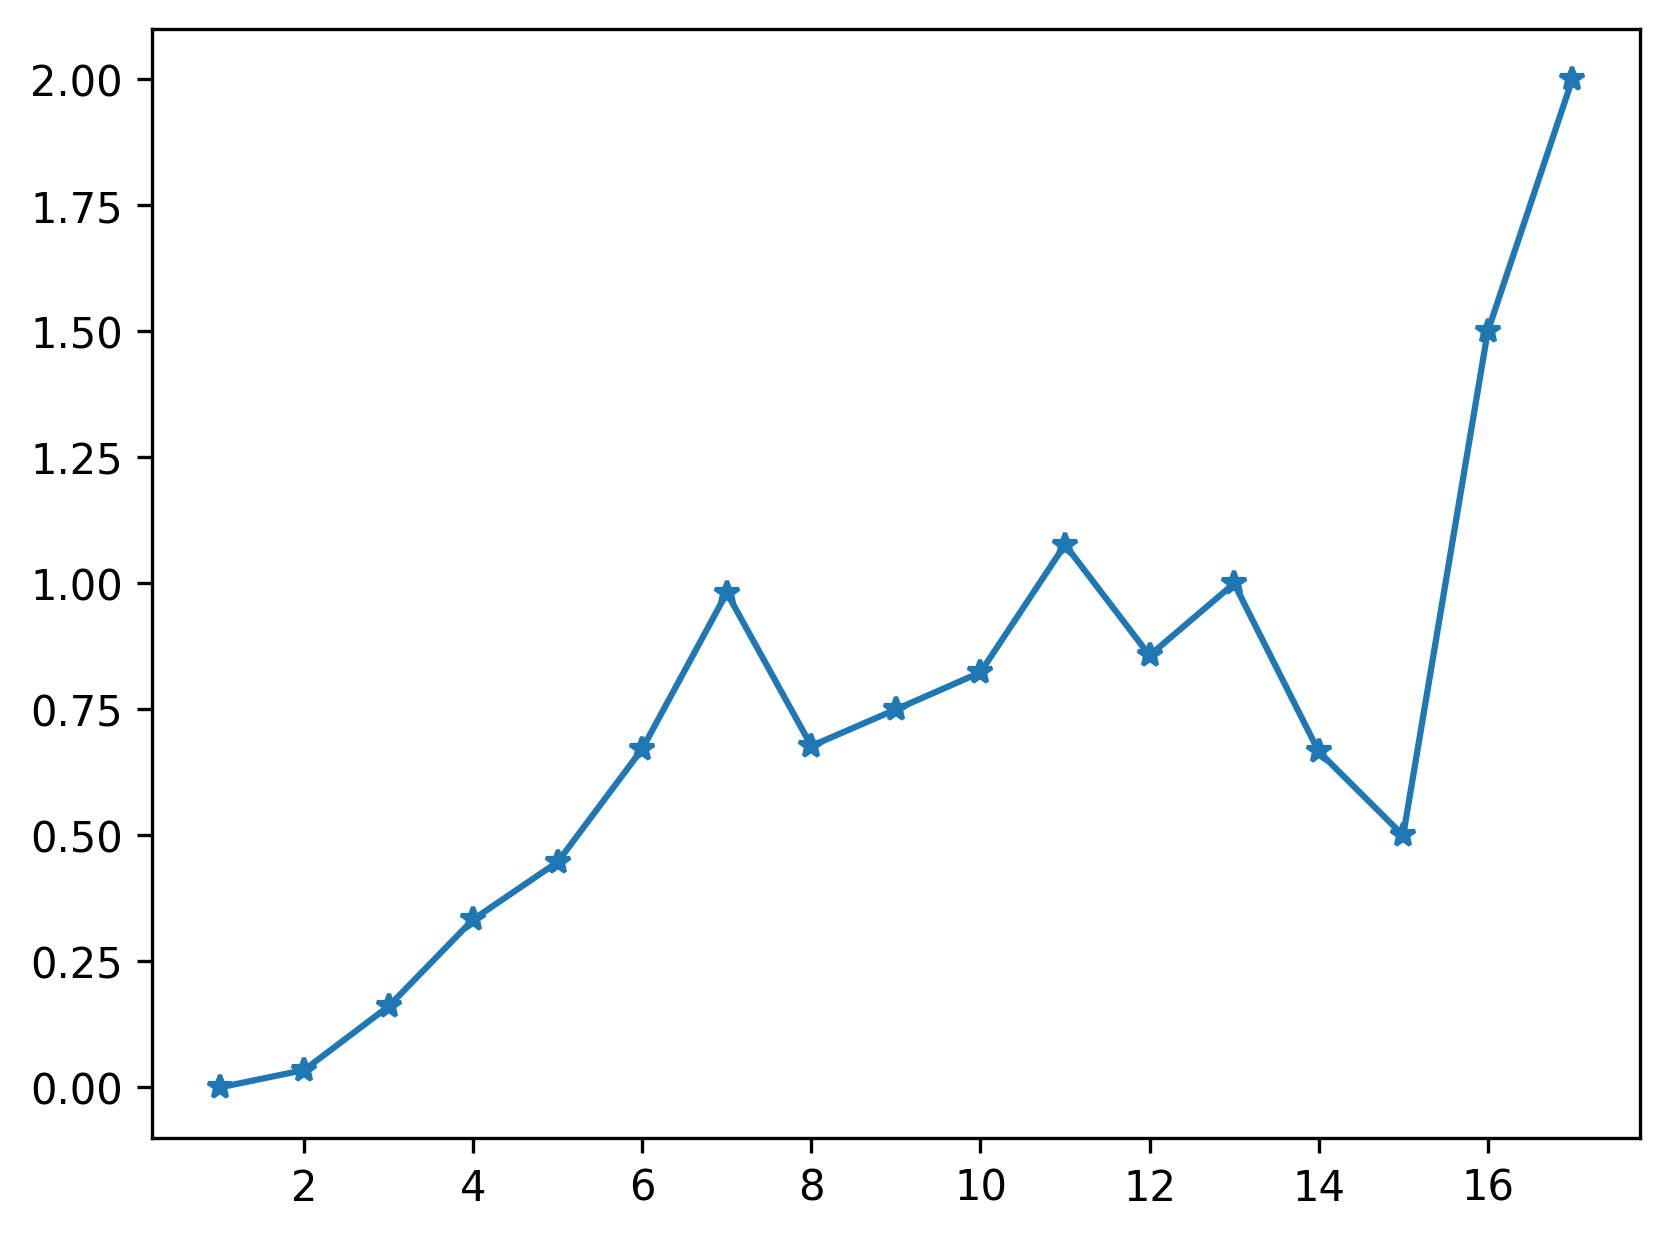

In [9]:
x_values = range(1, len(dic_entropies_op_by_distances_end) + 1)

# print(dic_entropies_op_by_distances_end)

plt.figure(dpi=300)
plt.plot(x_values, dic_entropies_op_by_distances_end.values(),  marker = '*')
plt.plot(x_values, stat_entropy_gpt3_app1_on4_k5_apocalypse_cleaned_end,  marker = 'o')
plt.plot(x_values, stat_entropy_gpt3_app1_on3_k5_apocalypse_cleaned_end,  marker = 's')
plt.plot(x_values, stat_entropy_gpt3_app2_on3_k5_apocalypse_cleaned_end,  marker = 'o', linestyle='dashed')
plt.plot(x_values, stat_entropy_gpt3_app2_on4_k5_apocalypse_cleaned_end,  marker = 's', linestyle='dashed')
plt.xlabel('Step of dialogue')
plt.ylabel('Entropy')
plt.title('Entropy by distance from end on GPT3 dialogues (k=5)')
plt.legend(['Ideal Entropy', 'GPT3 - singular approach', 'GPT4o - singular approach', 'GPT3 - simultaneous approach', 'GPT4o - simultaneous approach'])

Standard deviation of the step entropies

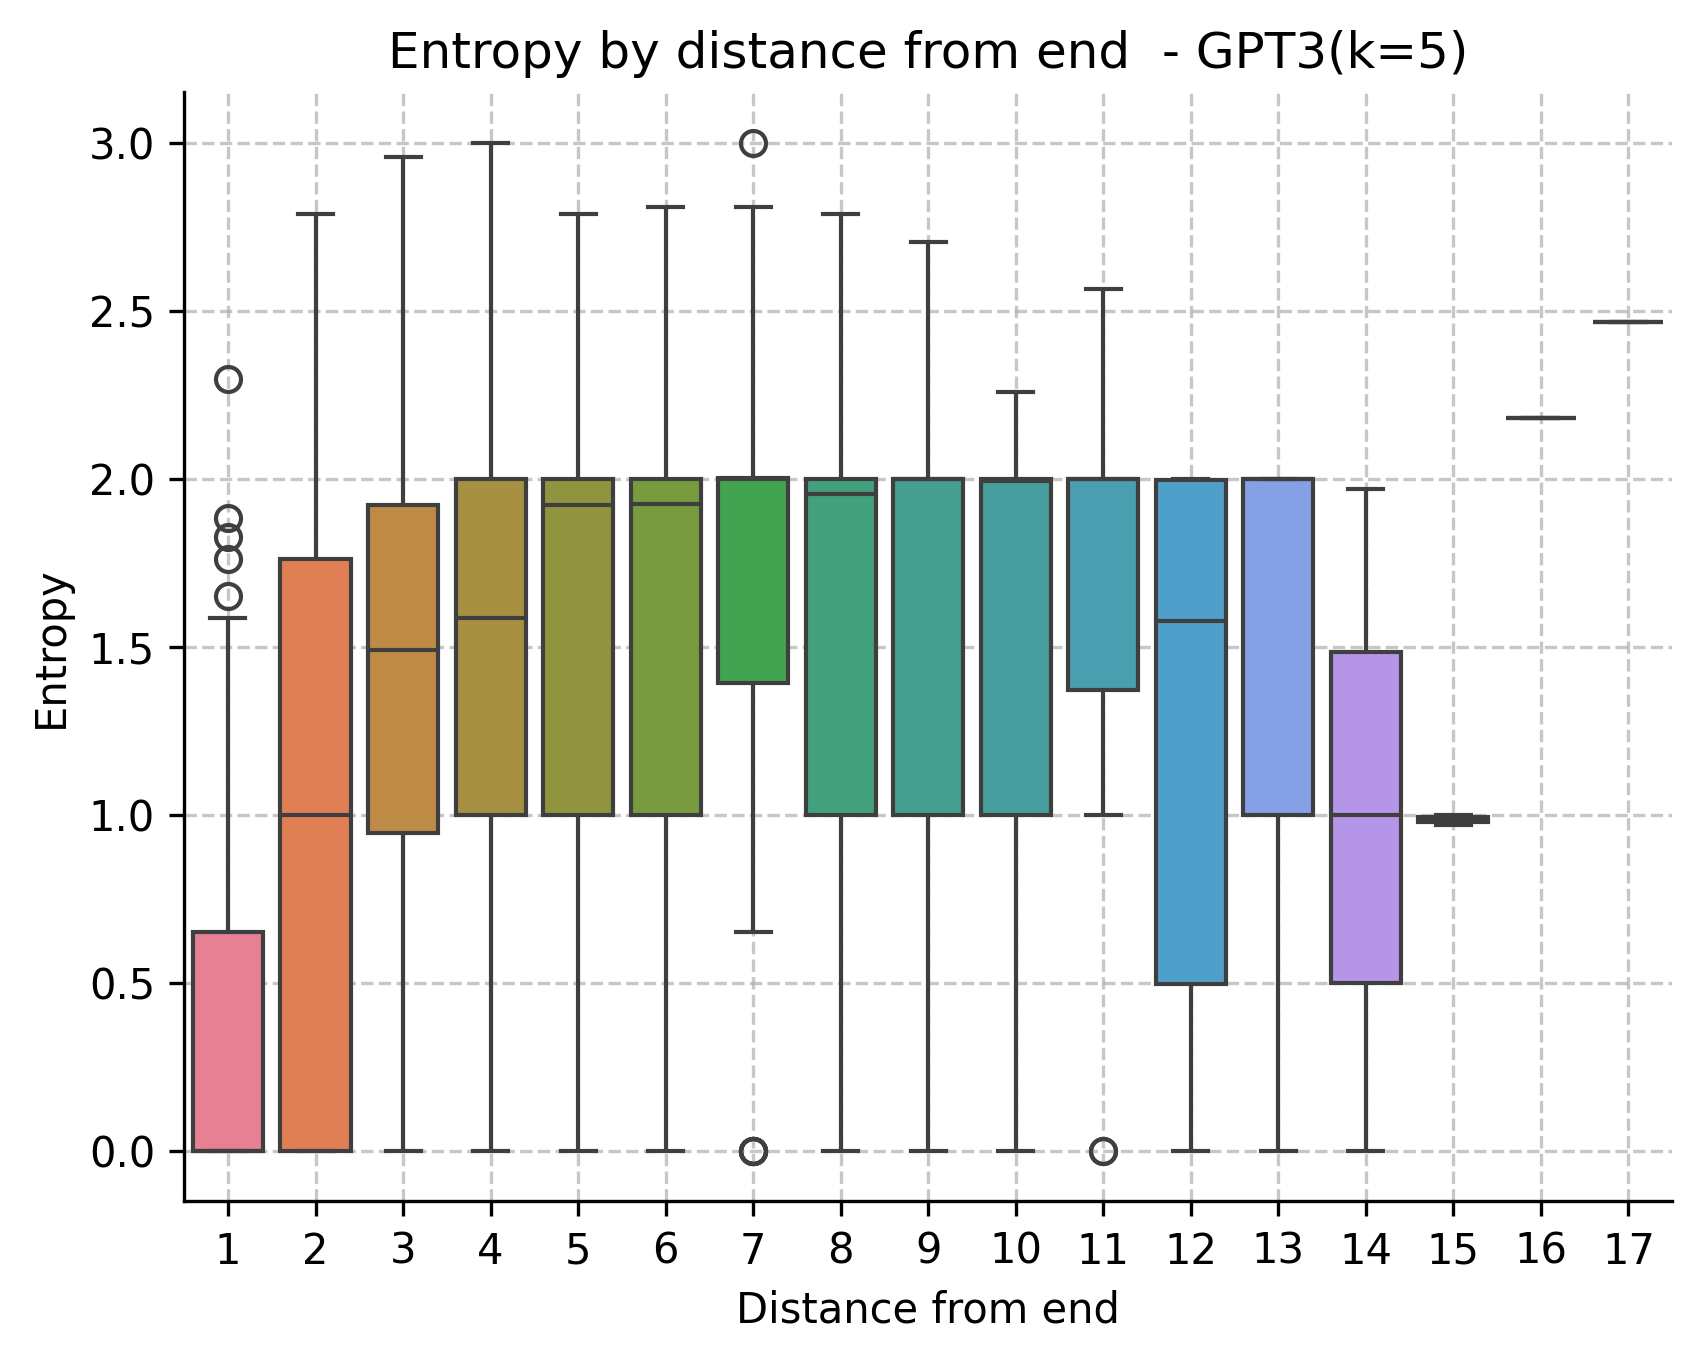

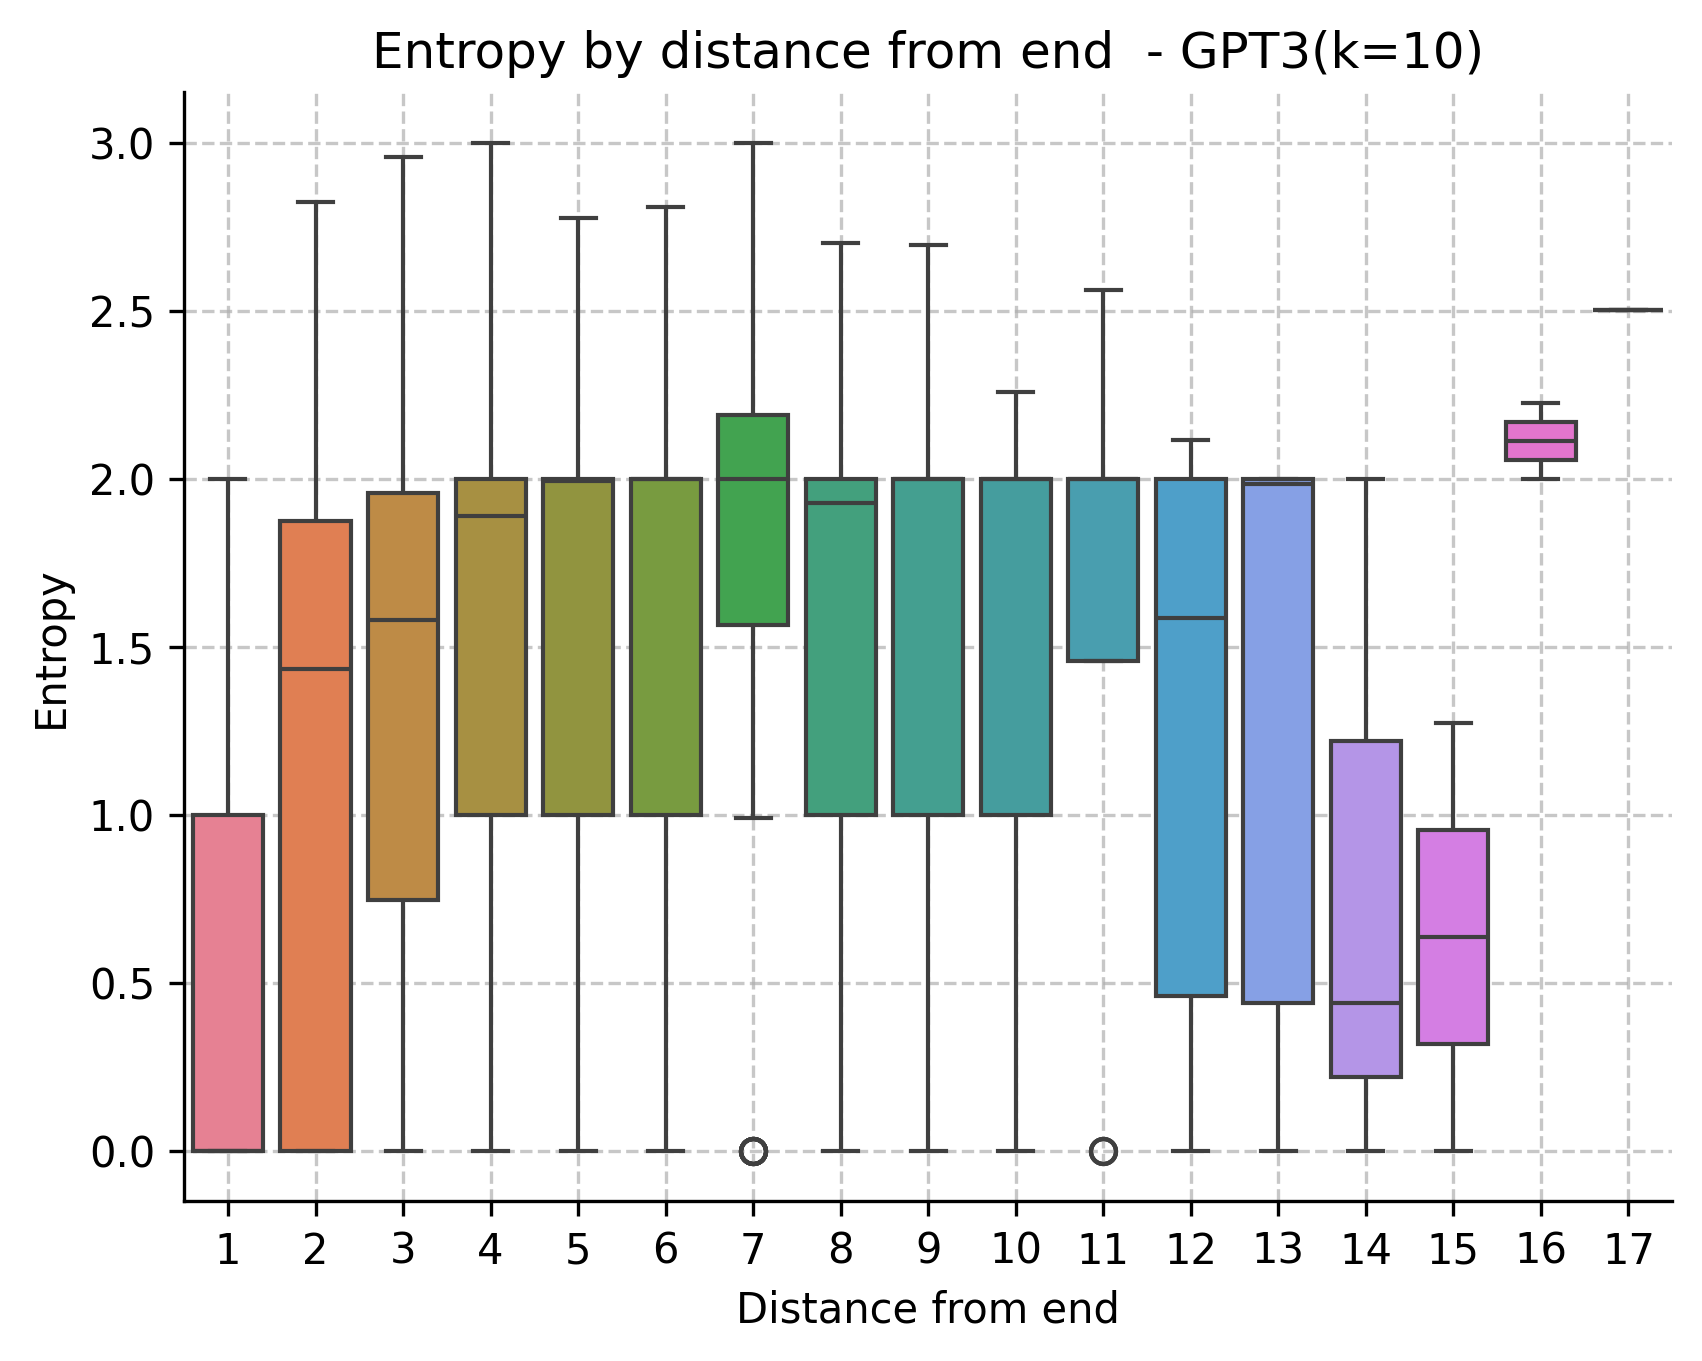

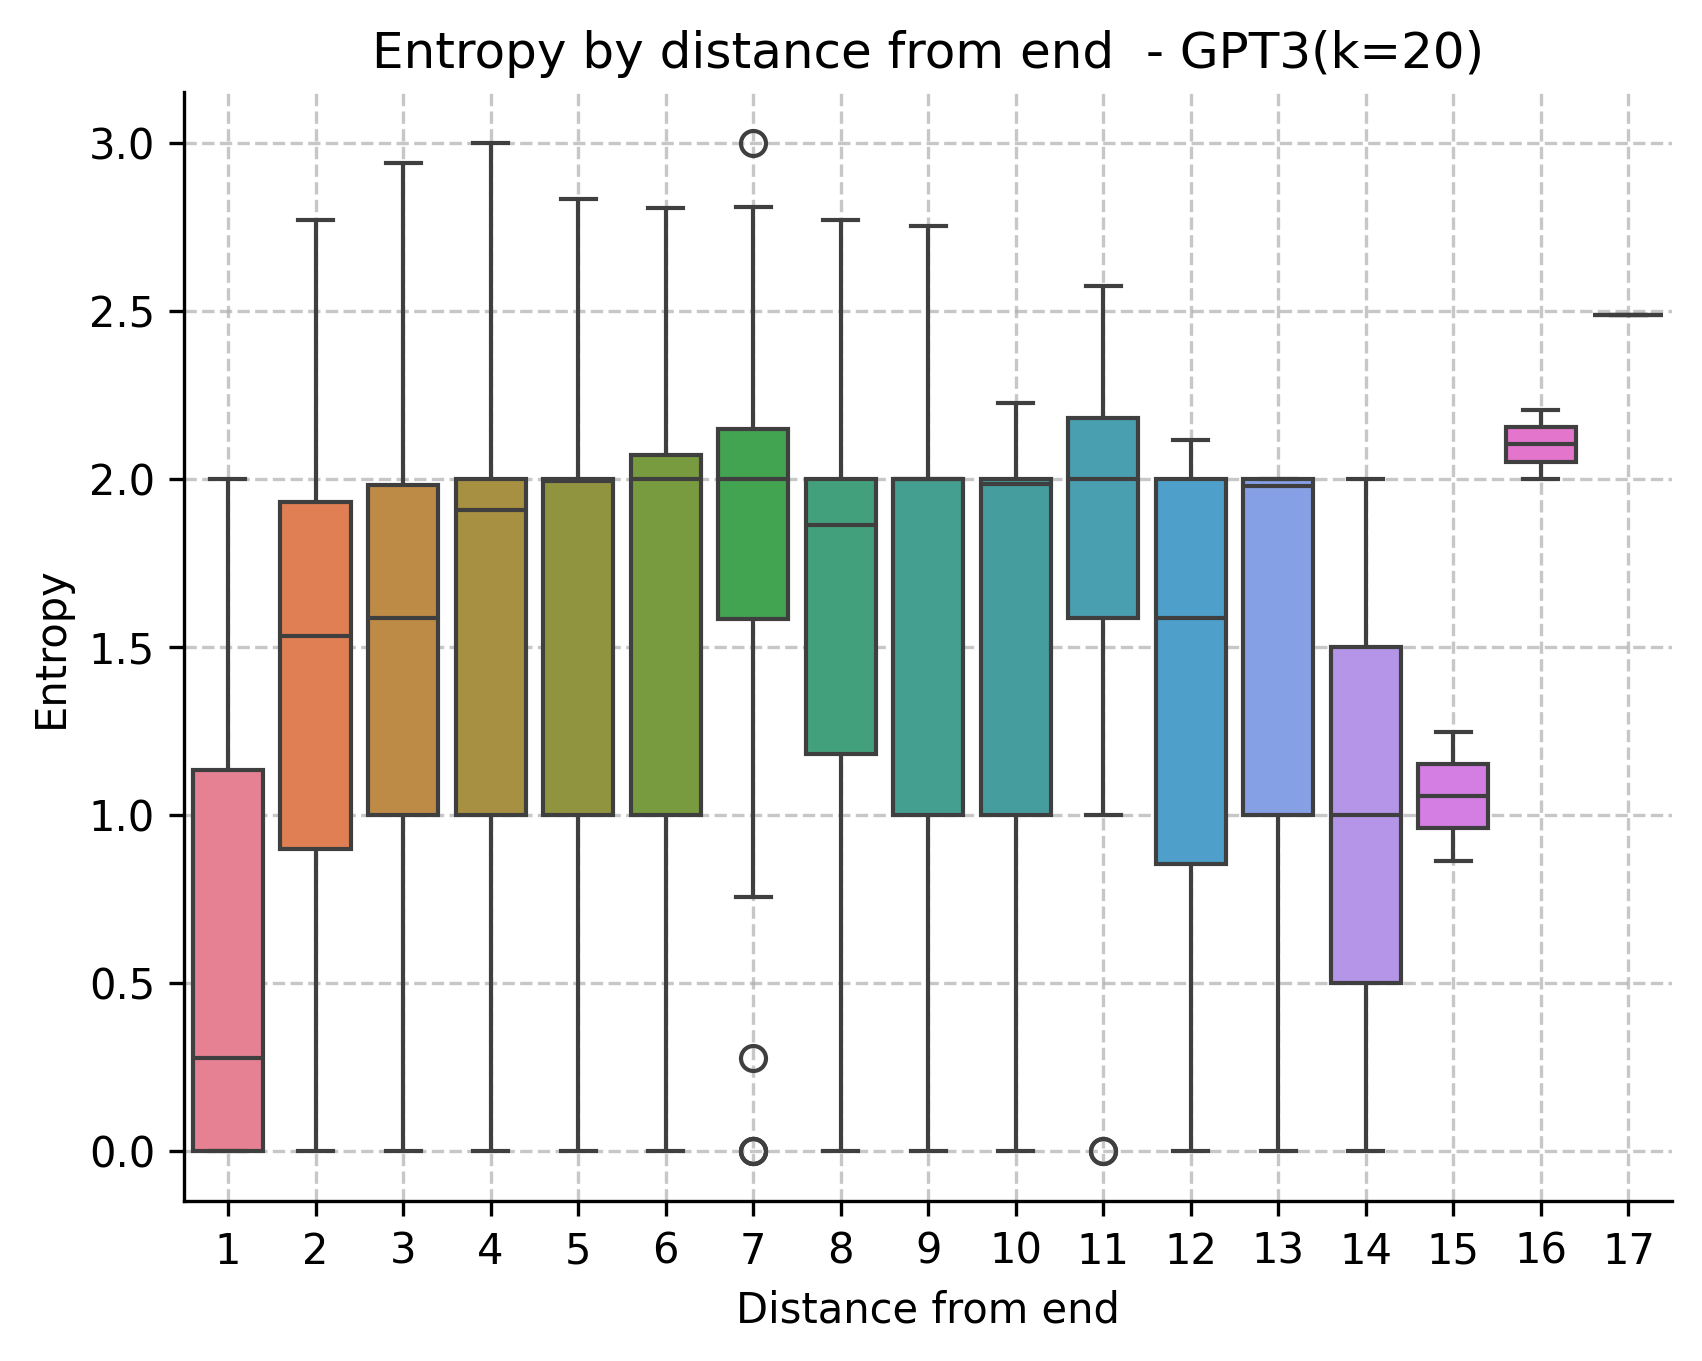

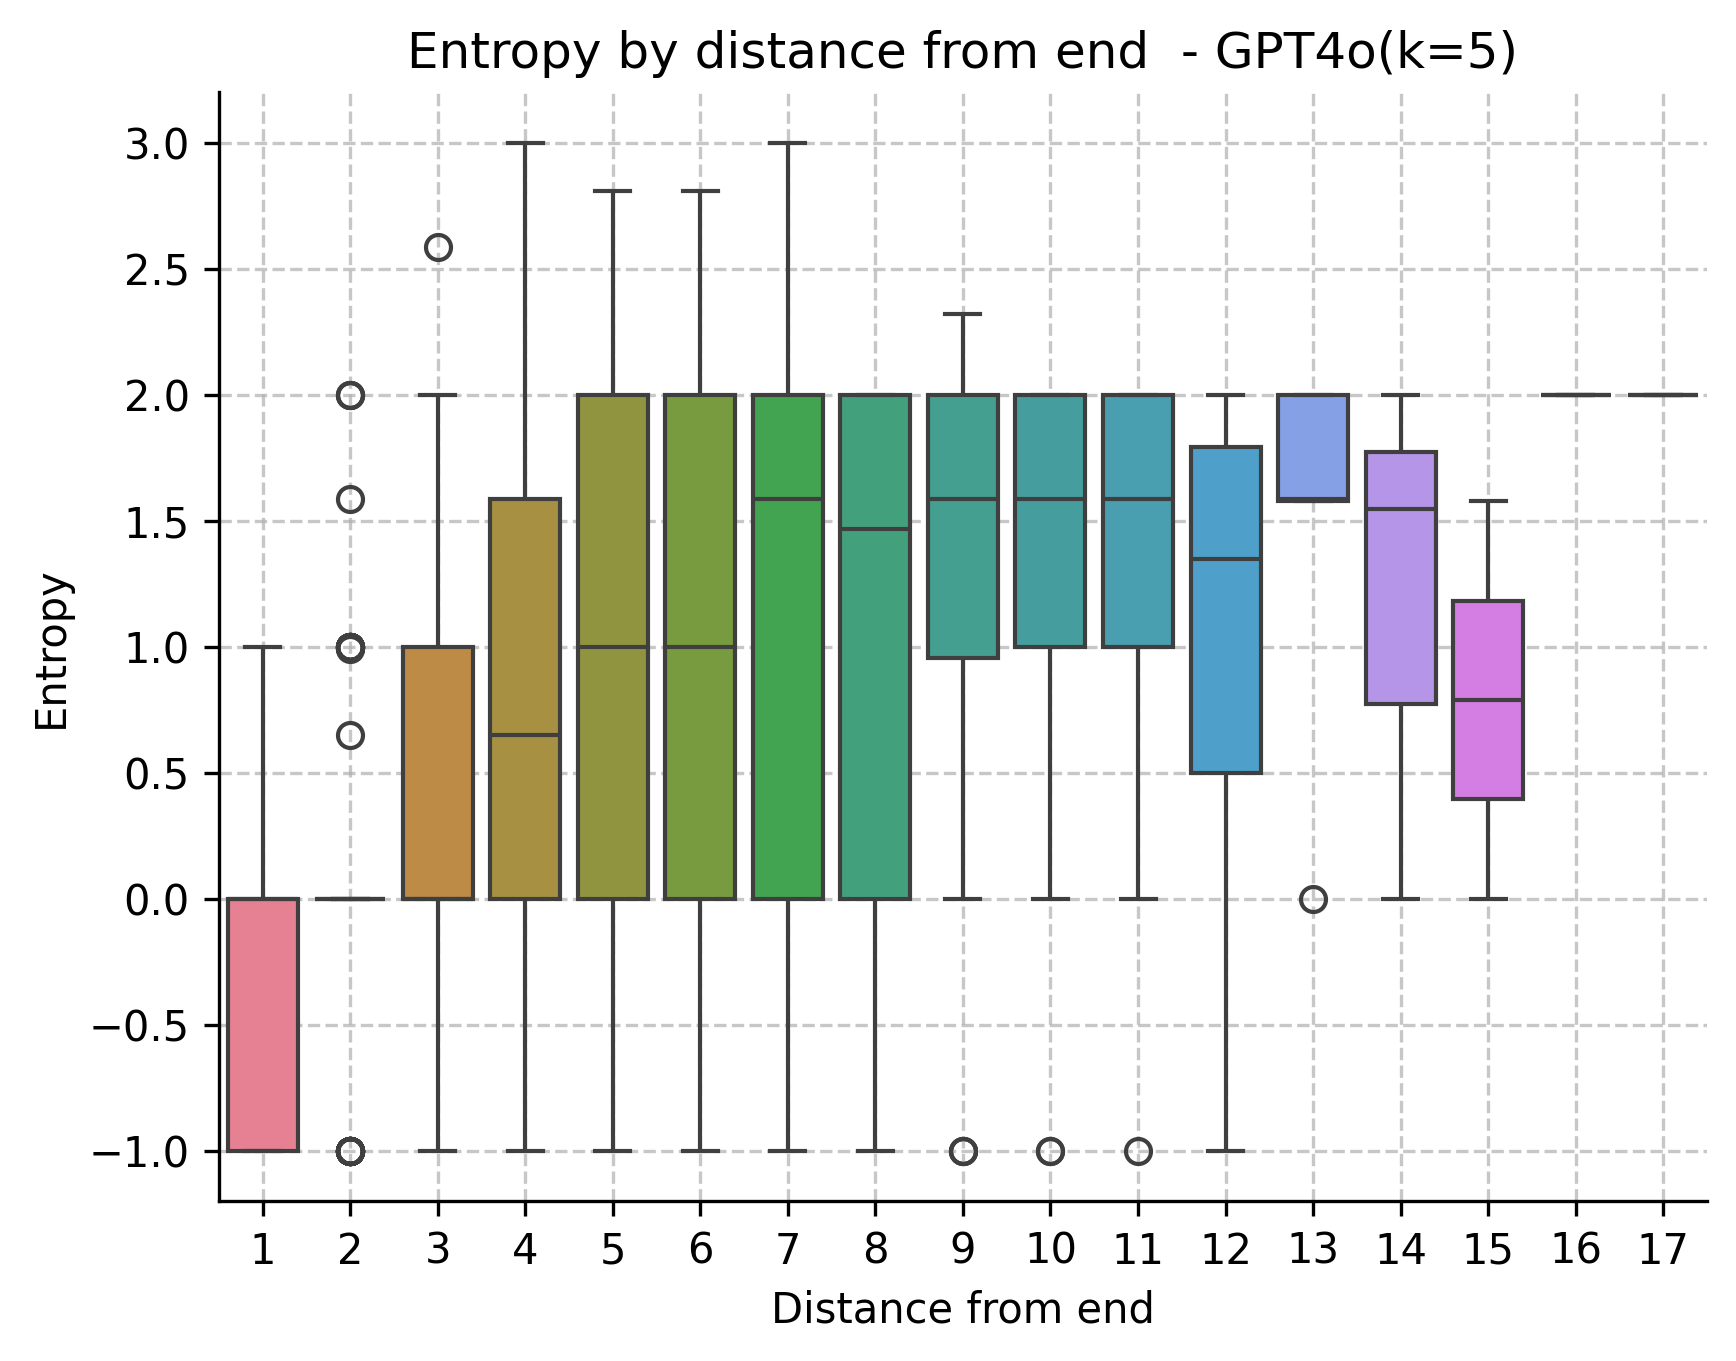

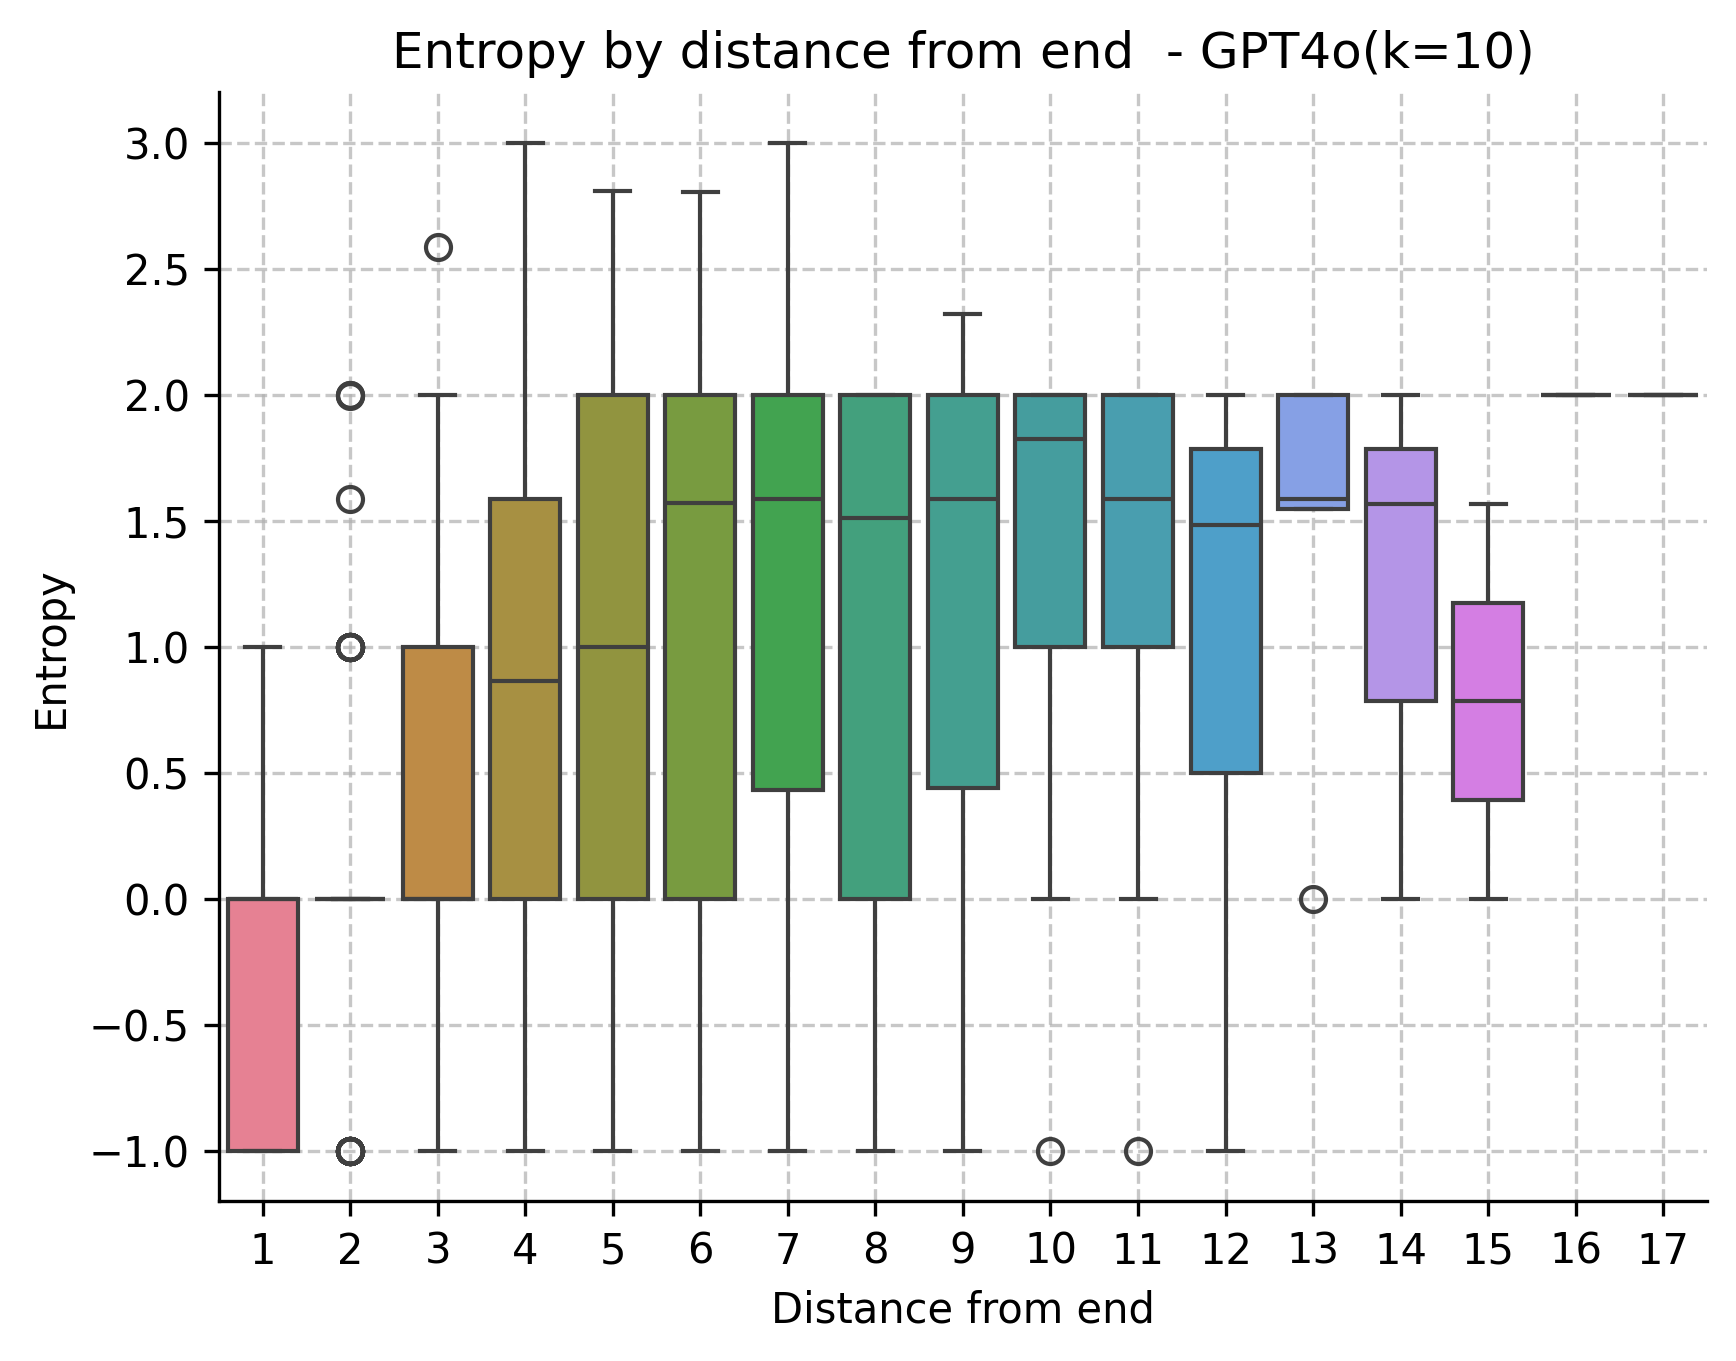

In [10]:
list_entropies = [entropy_gpt3_app1_on3_k5, entropy_gpt3_app1_on3_k10, entropy_gpt3_app1_on3_k20, entropy_gpt3_app1_on4_k5, entropy_gpt3_app1_on4_k10]
labels = ['GPT3(k=5)', 'GPT3(k=10)', 'GPT3(k=20)', 'GPT4o(k=5)', 'GPT4o(k=10)']

for i, entropies in enumerate(list_entropies):
    entropies_by_distances = []
    for _ in range(0, max_dialogue_length_gpt3, 1):
        entropies_by_distances.append([])

    for dialogue_entropy in entropies.values():
        dialogue_length = len(dialogue_entropy)
        for step_index, step_entropy in enumerate(dialogue_entropy):
            distance_from_end = dialogue_length - step_index - 1
            entropies_by_distances[distance_from_end].append(step_entropy)

    # print(entropies_by_distances[0])
    # Creiamo il box plot usando seaborn
    plt.figure(dpi=300)
    sns.boxplot(data=entropies_by_distances)

    # Modifichiamo le etichette dell'asse x per partire da 1
    plt.xlabel('Distance from end')
    plt.ylabel('Entropy')
    plt.title(f'Entropy by distance from end  - {labels[i]}')

    # Impostiamo i tick dell'asse x per partire da 1 invece che da 0
    plt.xticks(ticks=range(len(entropies_by_distances)), labels=range(1, len(entropies_by_distances) + 1))

    # Miglioriamo l'estetica generale del grafico
    sns.despine()  # Rimuove le spine del grafico per un aspetto più pulito
    plt.grid(True, linestyle='--', alpha=0.7)  # Aggiunge una griglia per una migliore leggibilità

    # Mostriamo il grafico
    plt.show()

Ideal entropy grouped from the beginning

In [11]:
entropies_op_by_distances = []
  
for _ in range(0, max_dialogue_length_gpt3, 1):
    entropies_op_by_distances.append([])

for dialogue_entropy in entropies_ideal.values():
    for step_index, step_entropy in enumerate(dialogue_entropy):
        # filter invalid entropy values
        if step_entropy != -1.0:
            entropies_op_by_distances[step_index].append(step_entropy)
      
dic_entropies_op_by_distances_beginnig = {}
for (distance, entropies_by_distance) in enumerate(entropies_op_by_distances):
    std = np.std(entropies_by_distance)
    mean = np.mean(entropies_by_distance)
    dic_entropies_op_by_distances_beginnig[distance] = mean
    # print(distance, std, mean)

Importing grouped entropies from beginning

In [ ]:
stat_entropy_paths_beginning = {
    "stats_app1_gpt4ongpt3_k5_noapo": {"path": "./data/generation/8_mcrae/gpt/entropy/old_entropy/entropy_k_five_gpt4o_statistics_from_dialogue_beginning_apocalypse_cleaned.csv", "stat_key": "std"},
    "stat_entropy_gpt3_app1_on4_k10": {"path": "./data/generation/8_mcrae/gpt/entropy/old_entropyentropy_k_ten_gpt4o_statistics_from_dialogue_beginning_apocalypse_cleaned.csv", "stat_key": "mean"},
    "stat_entropy_gpt3_app2_on4_k5": {"path": "./data/generation/8_mcrae/gpt/entropy/old_entropyentropy(gpt3)_k_five_gpt4o_statistics_from_dialogue_beginning_apocalypse_cleaned.csv", "stat_key": "mean"},
    "stat_entropy_gpt3_app1_on3_k5": {"path": "./data/generation/8_mcrae/gpt/entropy/old_entropy/entropy_k_five_statistics_from_dialogue_beginning_cleaned.csv", "stat_key": "std"},
    "stat_entropy_gpt3_app1_on3_k10": {"path": "./data/generation/8_mcrae/gpt/entropy/old_entropyentropy_k_ten_statistics_from_dialogue_beginning_cleaned.csv", "stat_key": "std"},
    "stat_entropy_gpt3_app1_on3_k20": {"path": "./data/generation/8_mcrae/gpt/entropy/old_entropyentropy_k_twenty_statistics_from_dialogue_beginning_cleaned.csv", "stat_key": "std"},
    "stat_entropy_gpt3_app2_on3_k5": {"path": "./data/generation/8_mcrae/gpt/entropy/old_entropyentropy(gpt3)_k_five_gpt3_statistics_from_dialogue_beginning_apocalypse_cleaned.csv", "stat_key": "mean"}
}

# Funzione per calcolare la statistica media
def load_and_calculate_statistic(file_path, key):
    with open(file_path, 'r', newline='') as file:
        reader = csv.DictReader(file, delimiter=",")
        return get_mean(reader, key=key)

In [ ]:
# Dizionario per memorizzare i risultati
stat_entropy_results_beginning = {}

# Caricamento e calcolo delle statistiche
for name, info in stat_entropy_paths_beginning.items():
    stat_entropy_results_beginning[name] = load_and_calculate_statistic(info["path"], key=info["stat_key"])

print(stat_entropy_results_beginning["stat_entropy_gpt3_app1_on4_k5"])
print(stat_entropy_results_beginning["stat_entropy_gpt3_app1_on3_k10"])

NameError: name 'stat_entropy_gpt3_app1_on3_k5_apocalypse_cleaned_beginning' is not defined

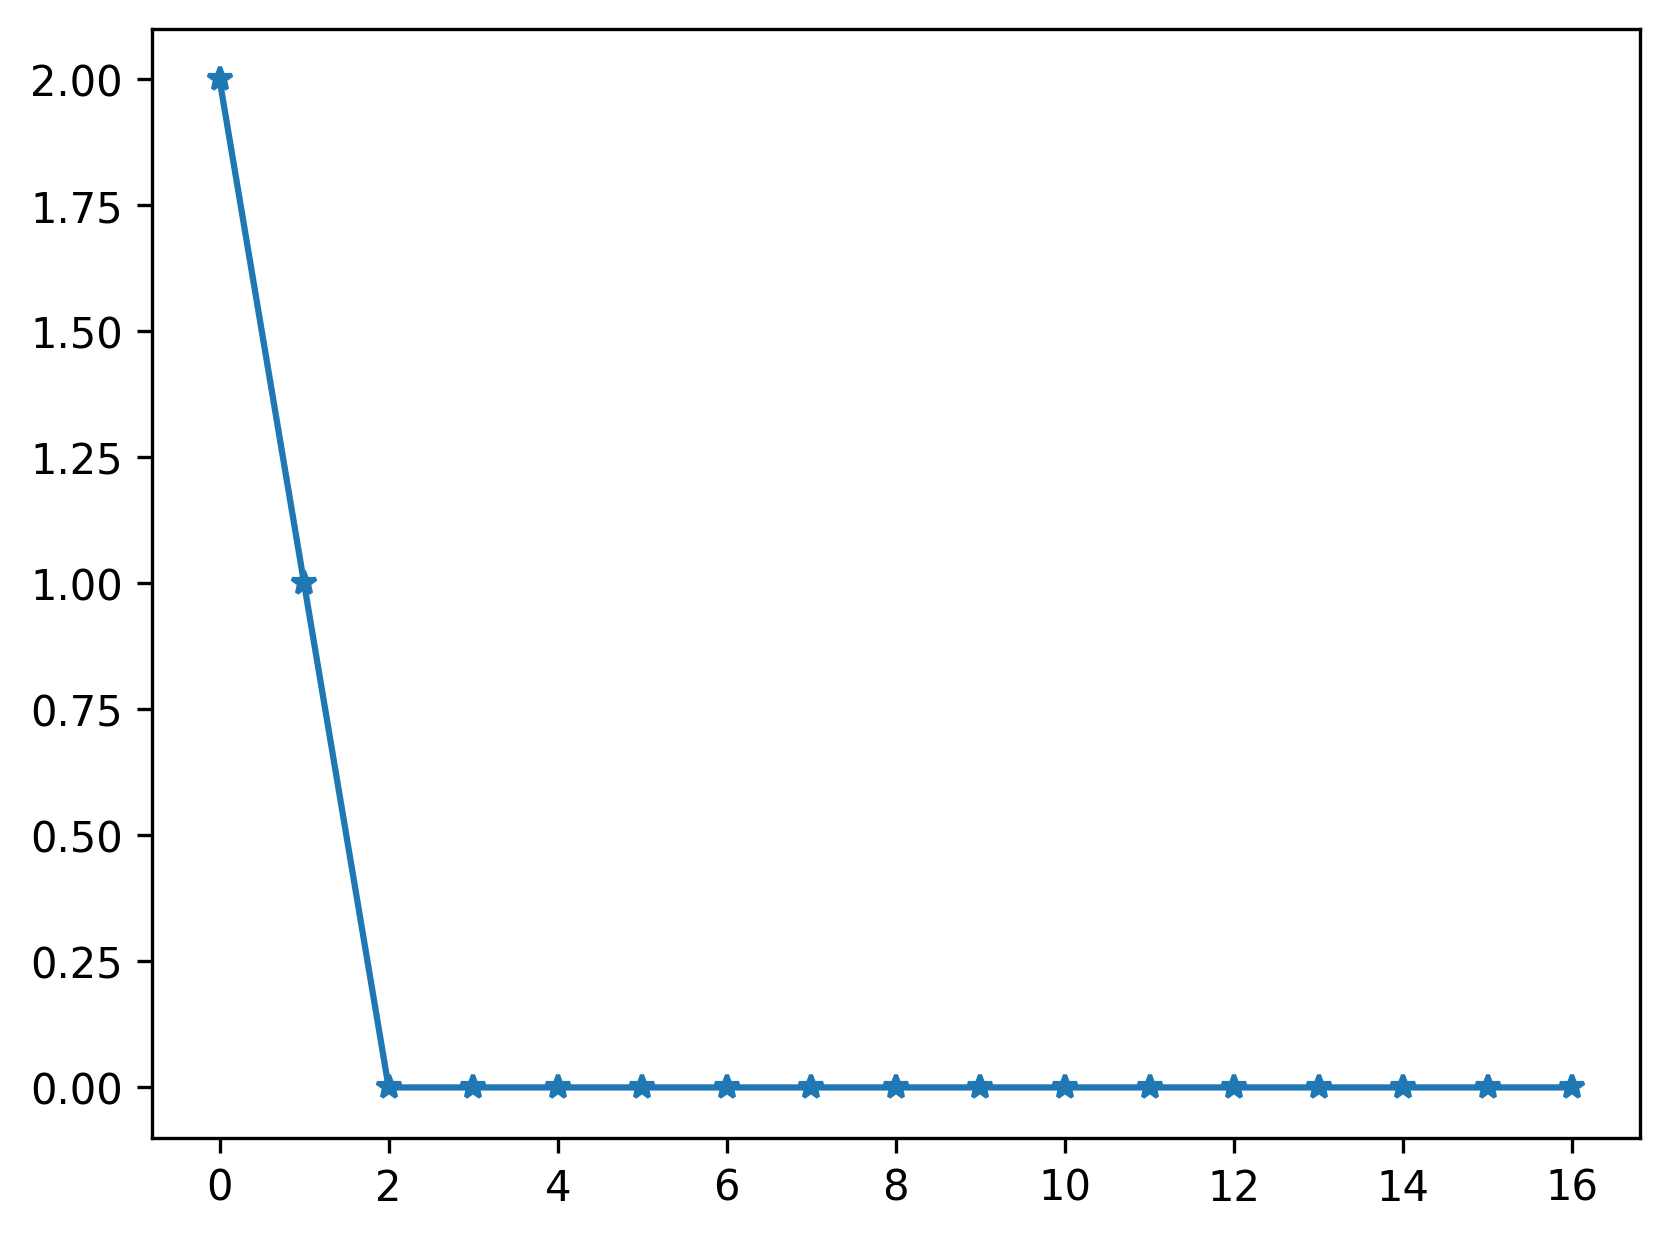

In [12]:
# print(dic_entropies_op_by_distances_beginnig)
plt.figure(dpi=300)
plt.plot(dic_entropies_op_by_distances_beginnig.values(),  marker = '*')
plt.plot(stat_entropy_gpt3_app1_on3_k5_apocalypse_cleaned_beginning,  marker = 'o')
plt.plot(stat_entropy_gpt3_app1_on4_k5_apocalypse_cleaned_beginning,  marker = 's')\
plt.plot(stat_entropy_gpt3_app2_on3_k5_apocalypse_cleaned_beginning,  marker = 'o', linestyle='dashed')
plt.plot(stat_entropy_gpt3_app2_on4_k5_apocalypse_cleaned_beginning,  marker = 's', linestyle='dashed')
plt.xlabel('Step of dialogue')
plt.ylabel('Entropy')
plt.title('Entropy on GPT3 dialogues (k=5)')
plt.legend(['Ideal Entropy', 'GPT3 - singular approach', 'GPT4o - singular approach', 'GPT3 - simultaneous approach', 'GPT4o - simultaneous approach'])

Standard deviation of the step entropies

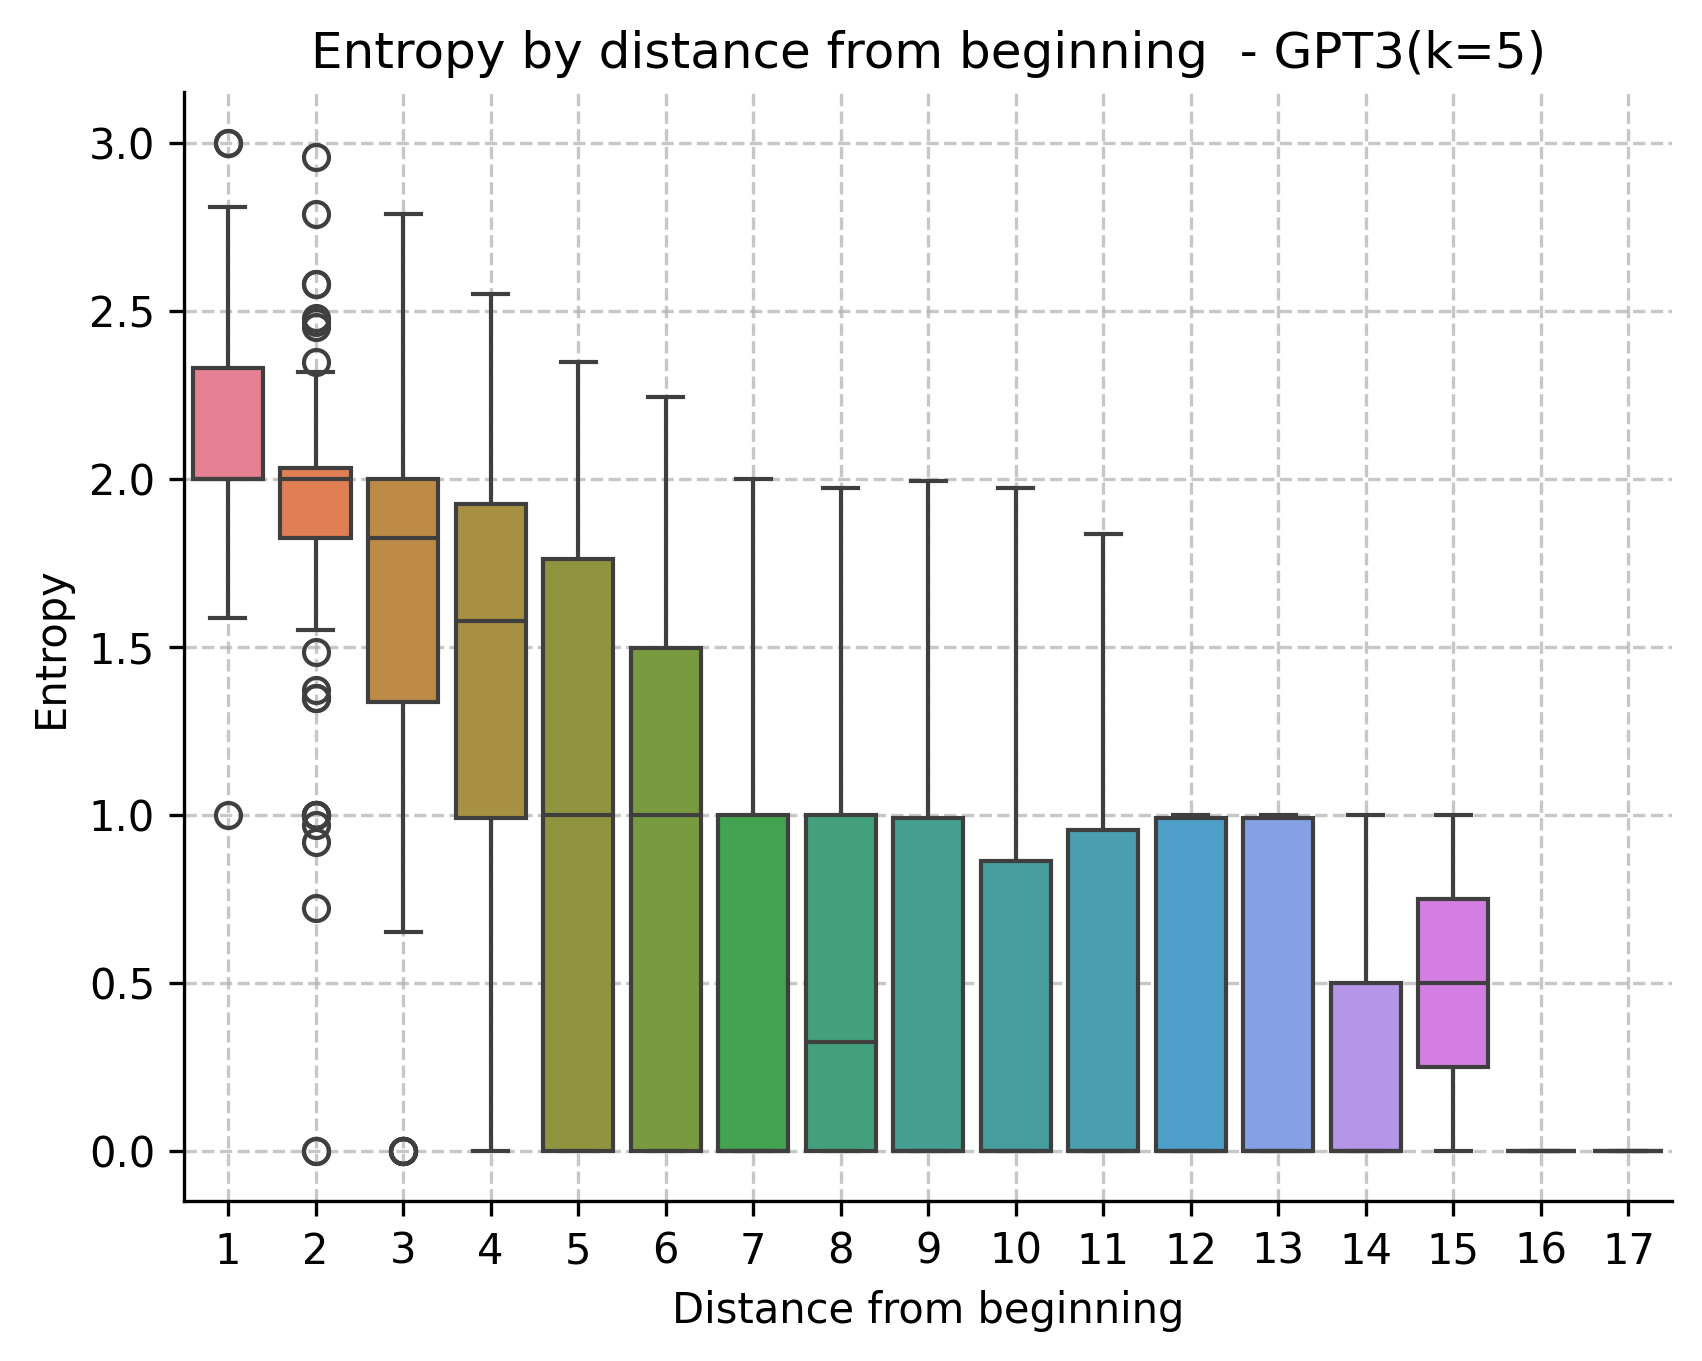

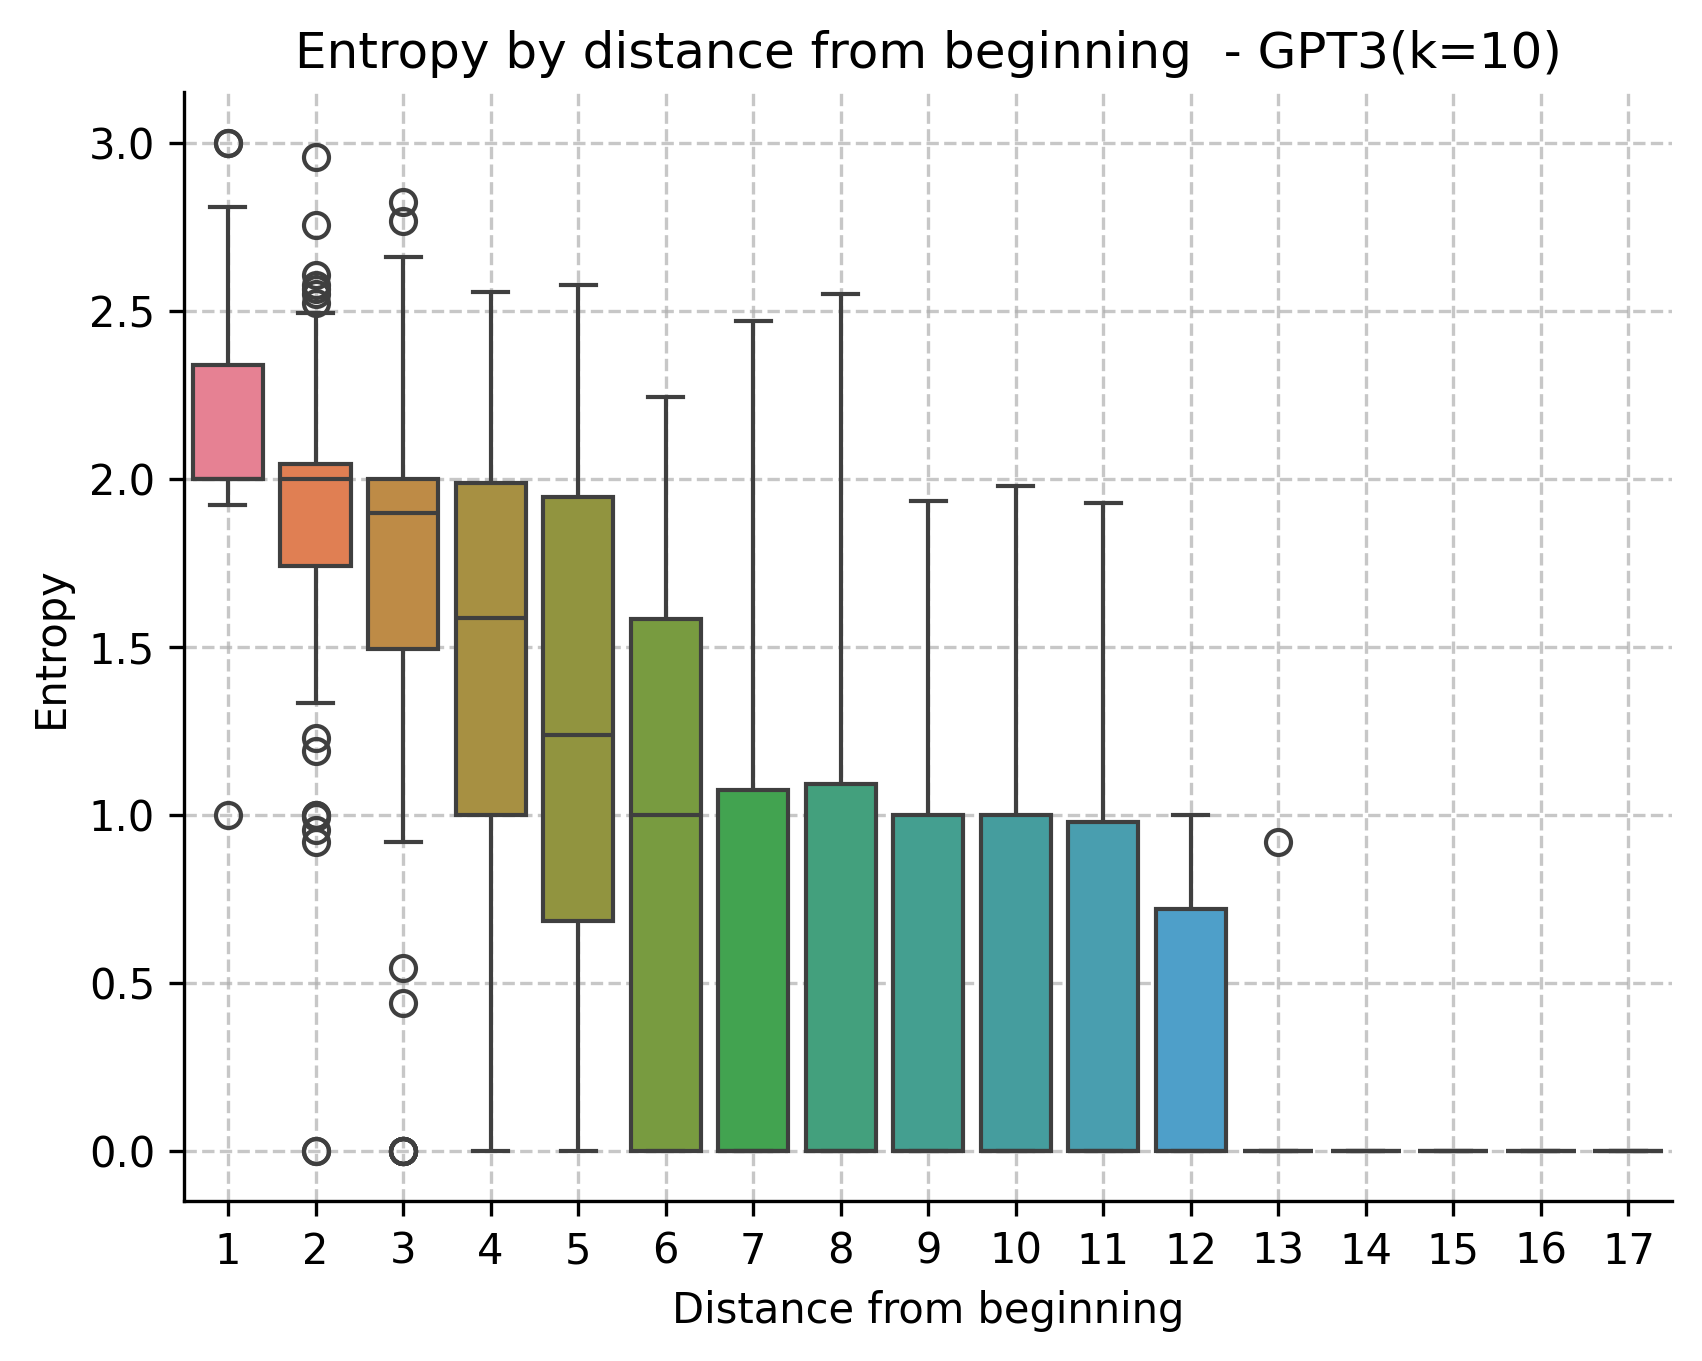

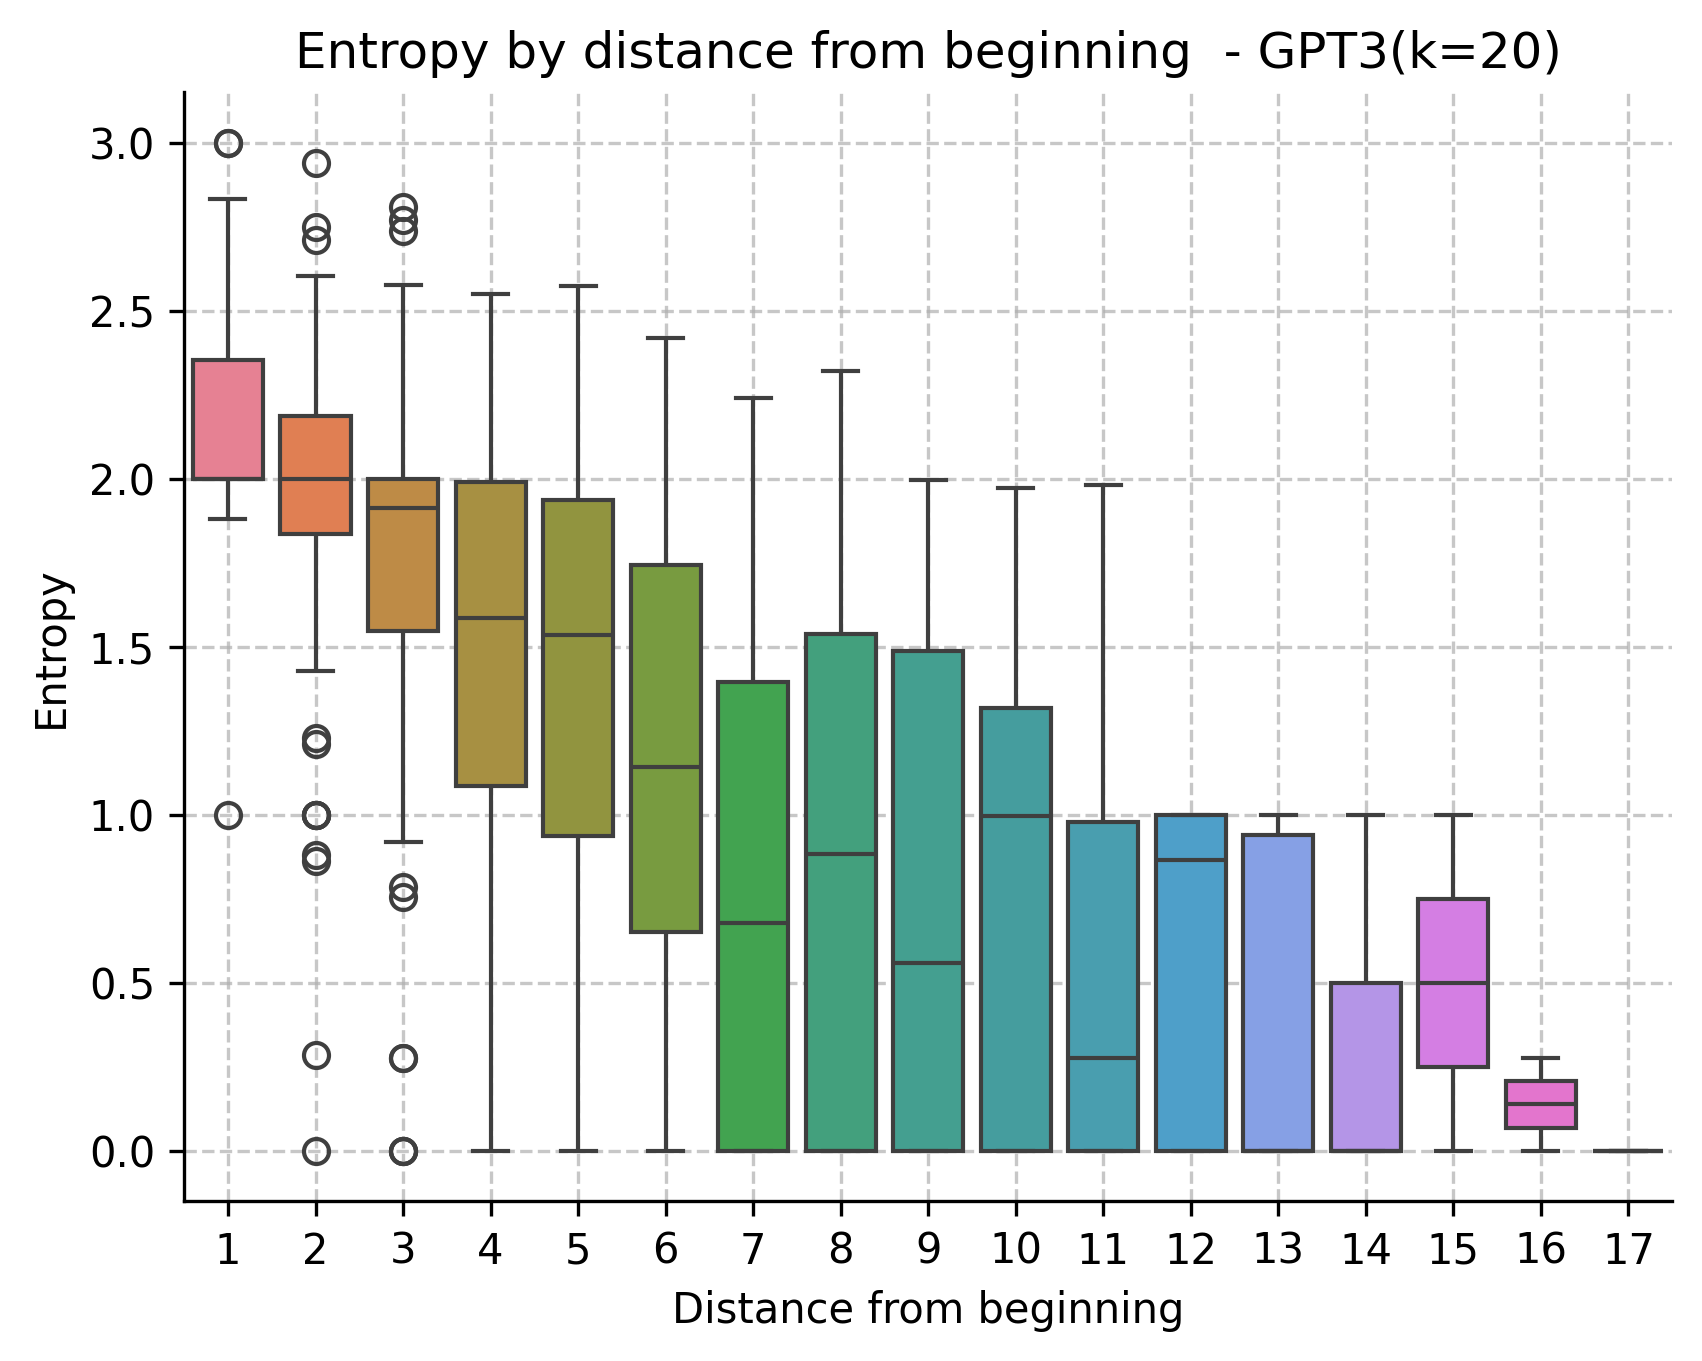

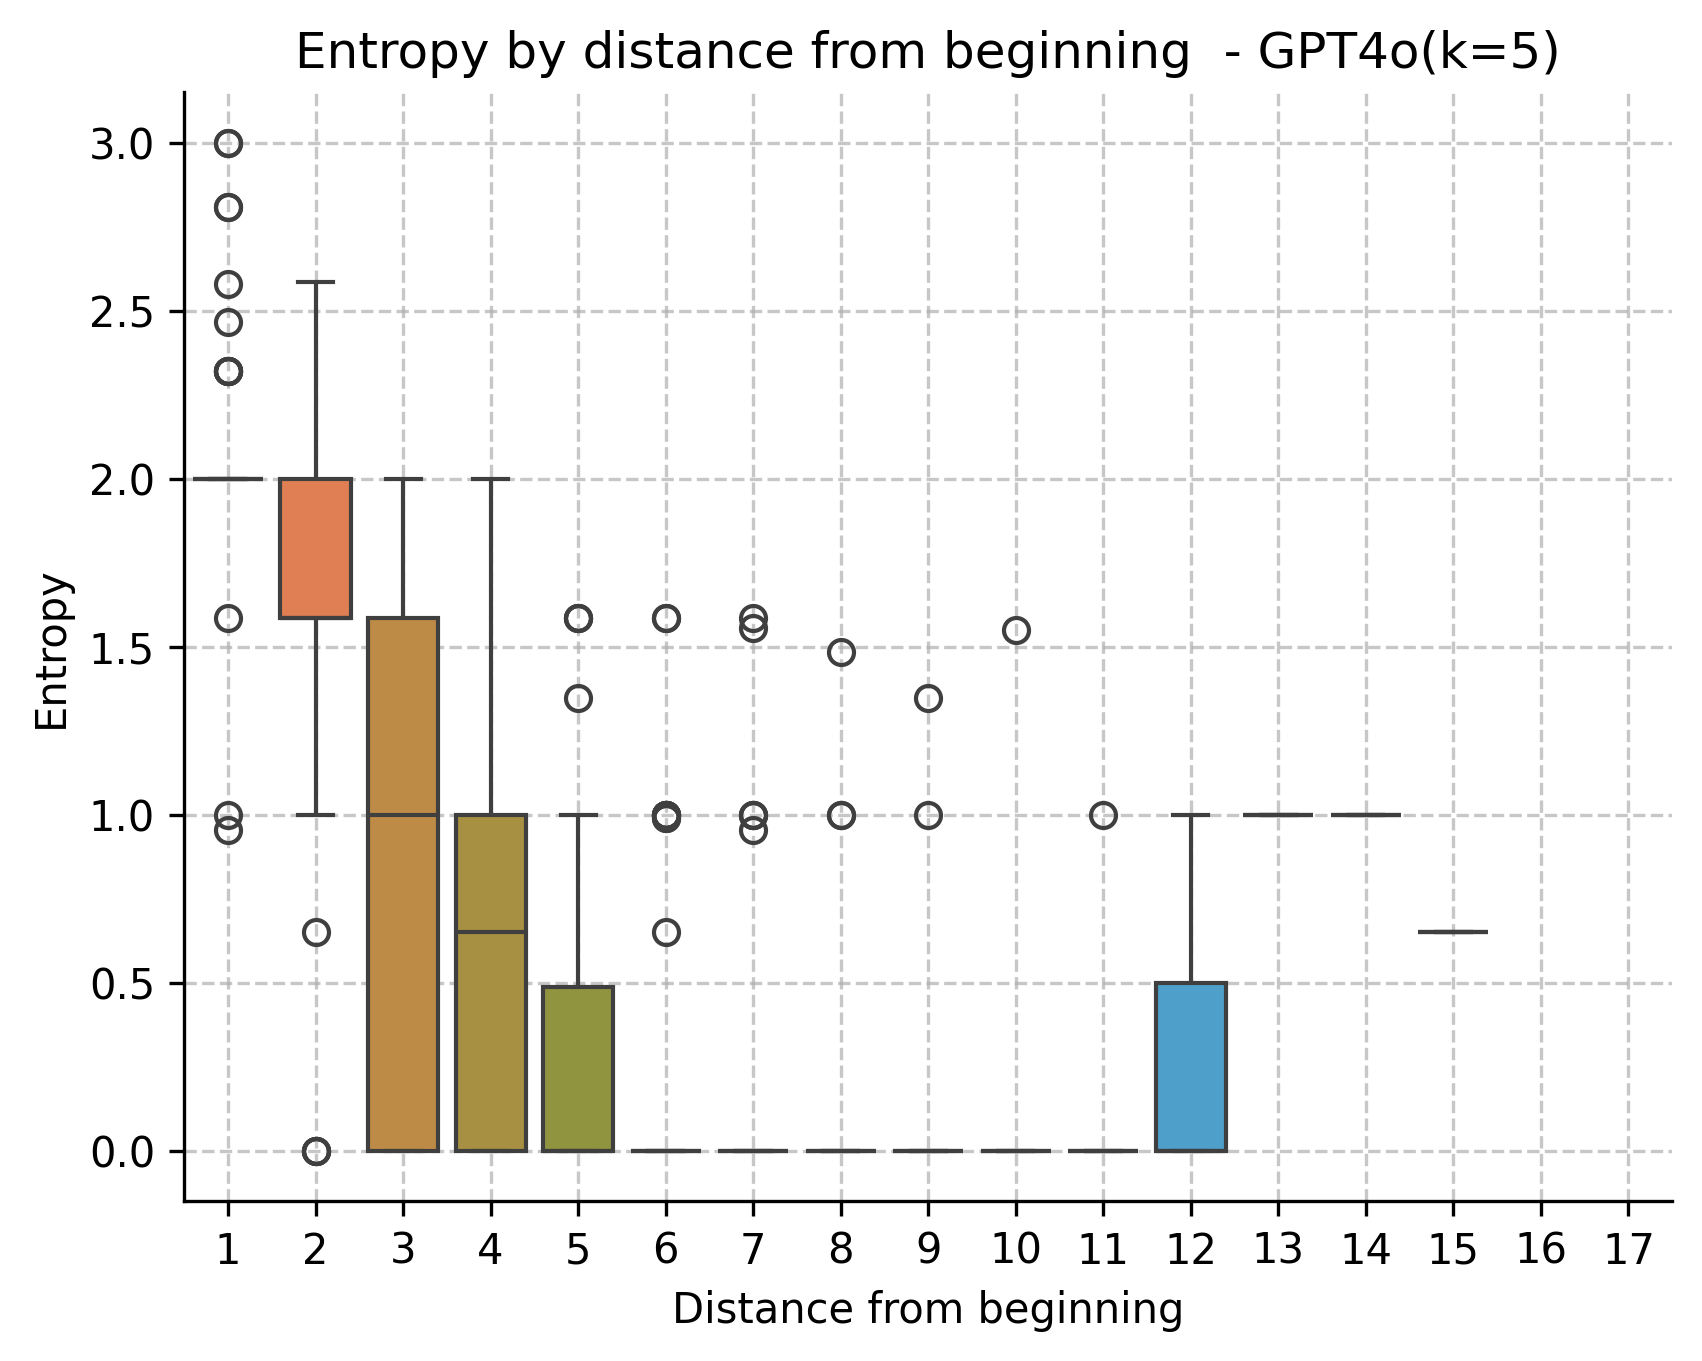

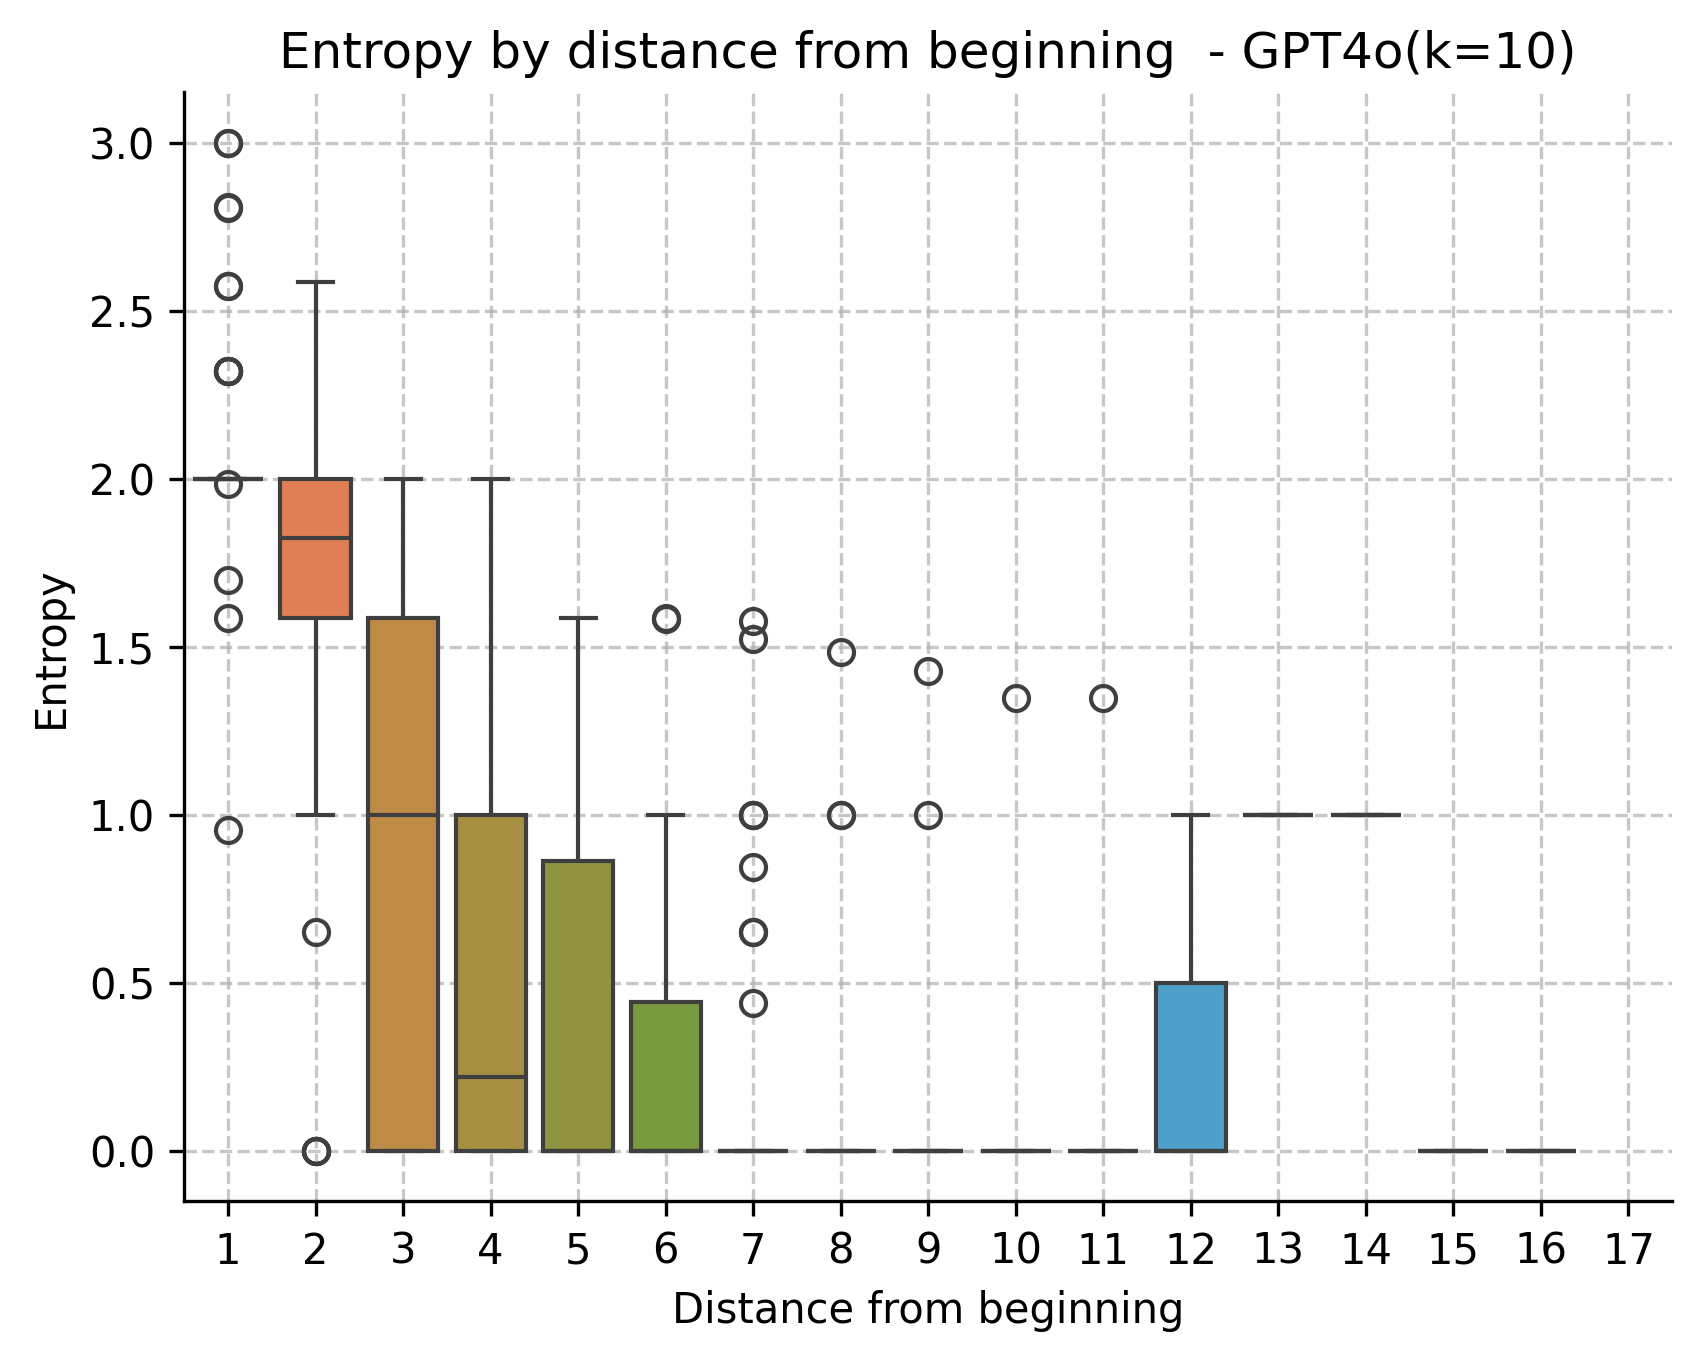

In [13]:
list_entropies = [entropy_gpt3_app1_on3_k5, entropy_gpt3_app1_on3_k10, entropy_gpt3_app1_on3_k20, entropy_gpt3_app1_on4_k5, entropy_gpt3_app1_on4_k10]
labels = ['GPT3(k=5)', 'GPT3(k=10)', 'GPT3(k=20)', 'GPT4o(k=5)', 'GPT4o(k=10)']

for i, entropies in enumerate(list_entropies):
    entropies_by_distances = []
    for _ in range(0, max_dialogue_length_gpt3, 1):
        entropies_by_distances.append([])

    for dialogue_entropy in entropies.values():
        for step_index, step_entropy in enumerate(dialogue_entropy):
            # filter invalid entropy values
            if step_entropy != -1.0:
                entropies_by_distances[step_index].append(step_entropy)

    # print(entropies_by_distances[0])
    # Creiamo il box plot usando seaborn
    plt.figure(dpi=300)
    sns.boxplot(data=entropies_by_distances)

    # Modifichiamo le etichette dell'asse x per partire da 1
    plt.xlabel('Distance from beginning')
    plt.ylabel('Entropy')
    plt.title(f'Entropy by distance from beginning  - {labels[i]}')

    # Impostiamo i tick dell'asse x per partire da 1 invece che da 0
    plt.xticks(ticks=range(len(entropies_by_distances)), labels=range(1, len(entropies_by_distances) + 1))

    # Miglioriamo l'estetica generale del grafico
    sns.despine()  # Rimuove le spine del grafico per un aspetto più pulito
    plt.grid(True, linestyle='--', alpha=0.7)  # Aggiunge una griglia per una migliore leggibilità

    # Mostriamo il grafico
    plt.show()


Counter({7: 23, 5: 12, 6: 10, 4: 8, 8: 7, 9: 7, 11: 6, 10: 4, 3: 3, 13: 2, 12: 2, 14: 1, 17: 1, 16: 1})


Text(0.5, 1.0, 'Number of dialogues by length GPT3')

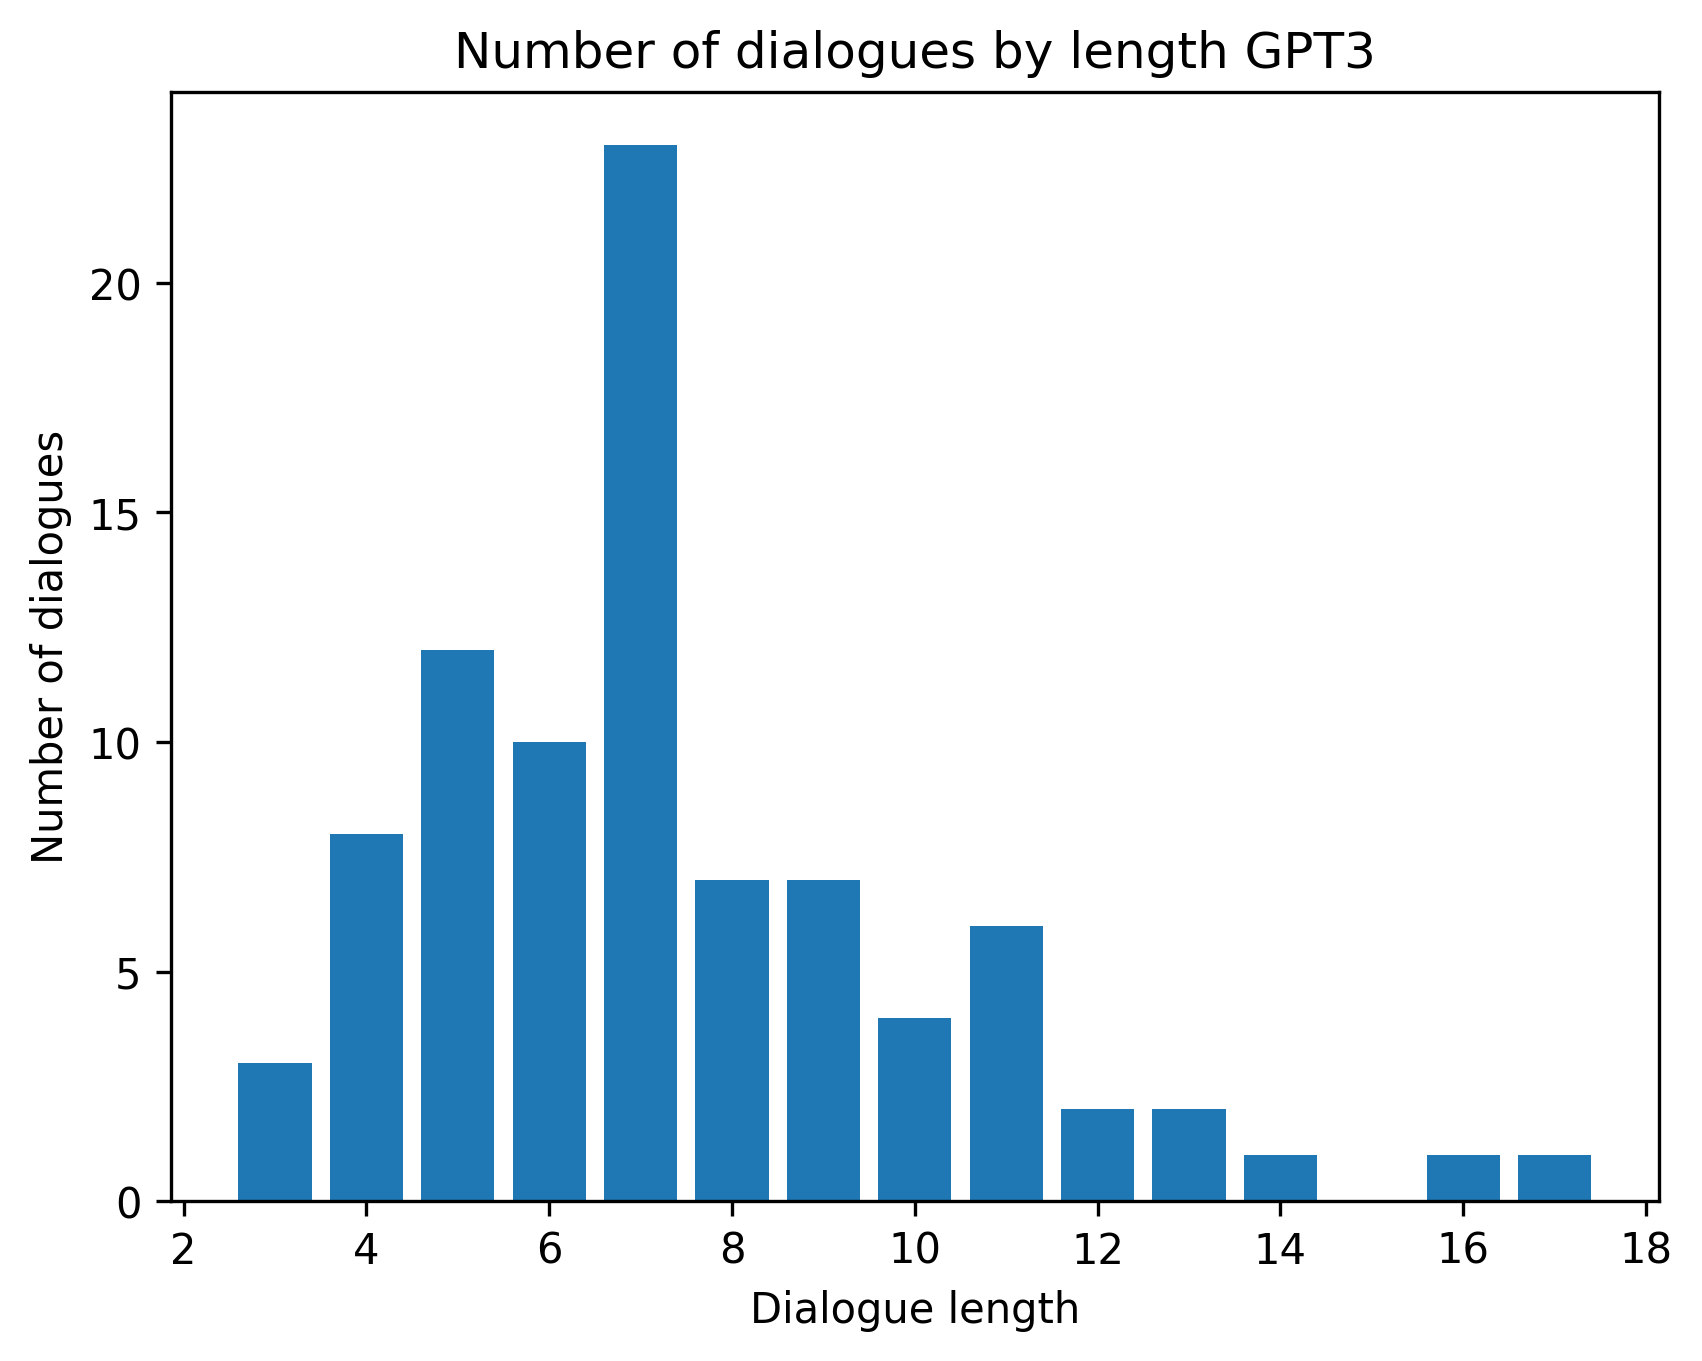

In [21]:
dialogue_lengths = [len(dialogue["intra_dialogues"]) for dialogue in grouped_dialogues['app1_gpt3ongpt3_k5']]
counter = Counter(dialogue_lengths)
print(counter)

# display counter in a bar plot
plt.figure(dpi=300)
plt.bar(counter.keys(), counter.values())
plt.xlabel('Dialogue length')
plt.ylabel('Number of dialogues')
plt.title('Number of dialogues by length GPT3')

### Bayesian apocalypse

In [22]:
def apocalypse_by_length_app1(grouped_data, max_dialogue_length):
  apocalypse_dist_by_length = []
  apocalypse_dist_by_length_norm = []
  counter = []
  for _ in range(0, max_dialogue_length, 1):
    apocalypse_dist_by_length.append(0)
    counter.append(0)
    apocalypse_dist_by_length_norm.append(0)
  
  for dialogue in grouped_data:
    dialogue_id = dialogue["dialogue_id"]
    intra_dialogues = dialogue["intra_dialogues"]
    for step in intra_dialogues:
      dist = list(step['p_distribuition'].values())
      if dist == [0, 0, 0, 0, 0, 0, 0, 0]:
        apocalypse_dist_by_length[len(intra_dialogues)-1] += 1
      counter[len(intra_dialogues)-1] += 1
  
  for i in range(len(apocalypse_dist_by_length)):
    if counter[i] != 0:
      apocalypse_dist_by_length_norm[i] = apocalypse_dist_by_length[i] / counter[i]
  # print(apocalypse_dist_by_length)
  
  return apocalypse_dist_by_length, apocalypse_dist_by_length_norm

In [23]:
def apocalypse_by_length_app2(grouped_data, max_dialogue_length):
    apocalypse_dist_by_length = []
    apocalypse_dist_by_length_norm = []
    counter = []
    for _ in range(0, max_dialogue_length, 1):
        apocalypse_dist_by_length.append(0)
        counter.append(0)
        apocalypse_dist_by_length_norm.append(0)

    for dialogue in grouped_data:
        dialogue_id = dialogue["dialogue_id"]
        intra_dialogues = dialogue["intra_dialogues"]
        for step in intra_dialogues:
            candidates = list(step['p_distribuition'].keys())
            if 'None' in candidates and len(candidates) == 1:
                apocalypse_dist_by_length[len(intra_dialogues)-1] += 1
            counter[len(intra_dialogues)-1] += 1
    
    for i in range(len(apocalypse_dist_by_length)):
        if counter[i] != 0:
            apocalypse_dist_by_length_norm[i] = apocalypse_dist_by_length[i] / counter[i]
    # print(apocalypse_dist_by_length)
    
    return apocalypse_dist_by_length, apocalypse_dist_by_length_norm 

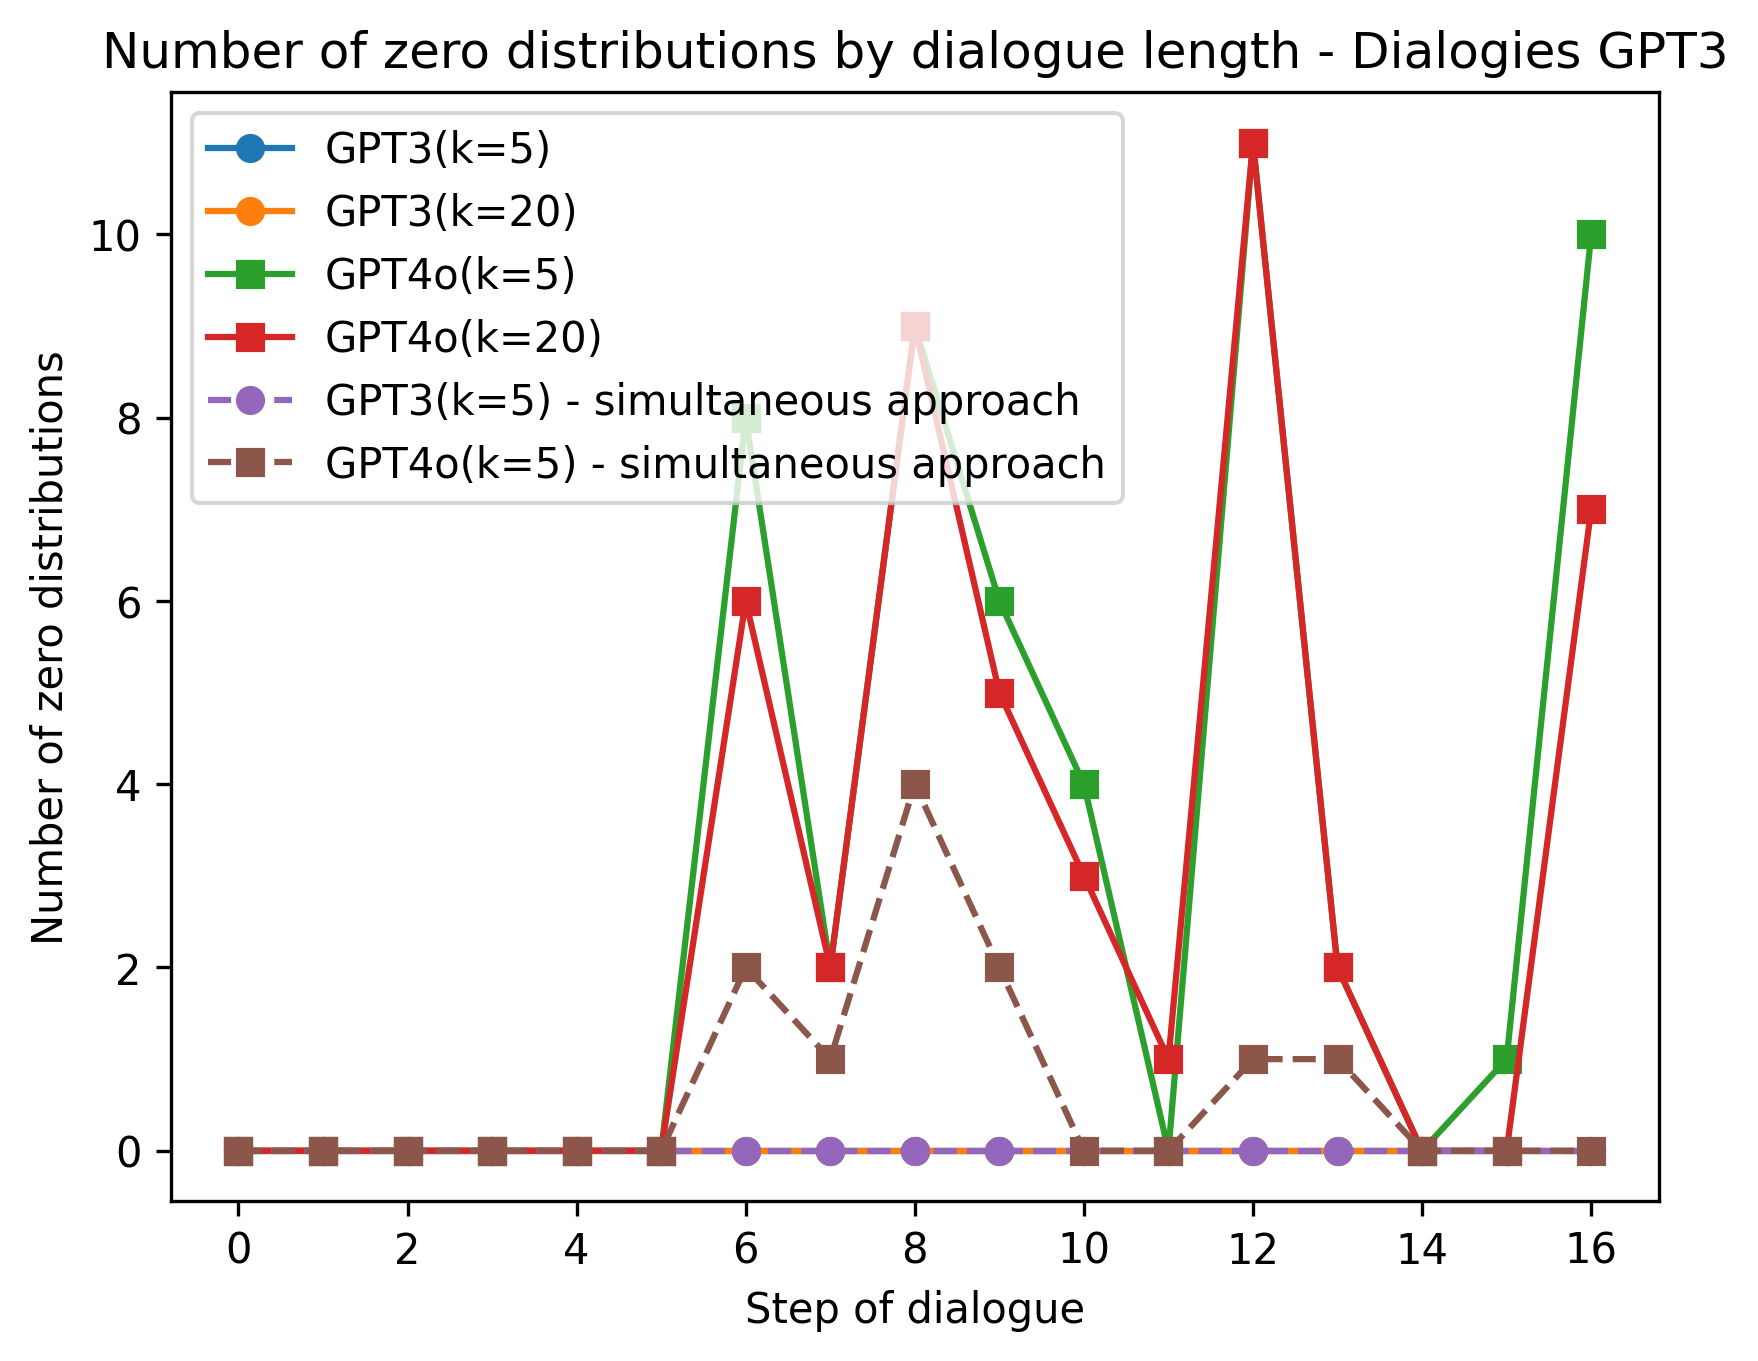

In [ ]:
apo_app1_gpt3ongpt3_k5, norm_apo_app1_gpt3ongpt3_k5 = apocalypse_by_length_app1(grouped_dialogues['app1_gpt3ongpt3_k5'], max_dialogue_length_gpt3)
apo_app1_gpt3ongpt3_k10, norm_apo_app1_gpt3ongpt3_k10 = apocalypse_by_length_app1(grouped_dialogues['app1_gpt3ongpt3_k10'], max_dialogue_length_gpt3)
apo_app1_gpt3ongpt3_k20, norm_apo_app1_gpt3ongpt3_k20 = apocalypse_by_length_app1(grouped_dialogues['app1_gpt3ongpt3_k20'], max_dialogue_length_gpt3)
apo_app1_gpt4ongpt3_k5, norm_apo_app1_gpt4ongpt3_k5 = apocalypse_by_length_app1(grouped_dialogues['app1_gpt4ongpt3_k5'], max_dialogue_length_gpt3)
apo_app1_gpt4ongpt3_k10, norm_apo_app1_gpt4ongpt3_k10 = apocalypse_by_length_app1(grouped_dialogues['app1_gpt4ongpt3_k10'], max_dialogue_length_gpt3)
apo_app1_gpt4ongpt3_k20, norm_apo_app1_gpt4ongpt3_k20 = apocalypse_by_length_app1(grouped_dialogues['app1_gpt4ongpt3_k20'], max_dialogue_length_gpt3)

apo_app2_gpt3ongpt3_k5, norm_apo_app2_gpt3ongpt3_k5 = apocalypse_by_length_app2(grouped_dialogues['app2_gpt3ongpt3_k5'], max_dialogue_length_gpt3)
apo_app2_gpt4ongpt3_k5, norm_apo_app2_gpt4ongpt3_k5 = apocalypse_by_length_app2(grouped_dialogues['app2_gpt4ongpt3_k5'], max_dialogue_length_gpt3)

plt.figure(dpi=300)
plt.plot(apo_app1_gpt3ongpt3_k5, marker = 'o')
plt.plot(apo_app1_gpt3ongpt3_k20, marker = 'o')
plt.plot(apo_app1_gpt4ongpt3_k5, marker = 's')
# plt.plot(apo_app1_gpt4ongpt3_k10, marker = 's')
plt.plot(apo_app1_gpt4ongpt3_k20, marker = 's')
plt.plot(apo_app2_gpt3ongpt3_k5, marker = 'o', linestyle='dashed')
plt.plot(apo_app2_gpt4ongpt3_k5, marker = 's', linestyle='dashed')
plt.xlabel('Step of dialogue')
plt.ylabel('Number of zero distributions')
plt.title('Number of zero distributions by dialogue length - Dialogies GPT3')
plt.legend(['GPT3(k=5)', 'GPT3(k=20)', 'GPT4o(k=5)', 'GPT4o(k=20)',  'GPT3(k=5) - simultaneous approach', 'GPT4o(k=5) - simultaneous approach'])
plt.show()

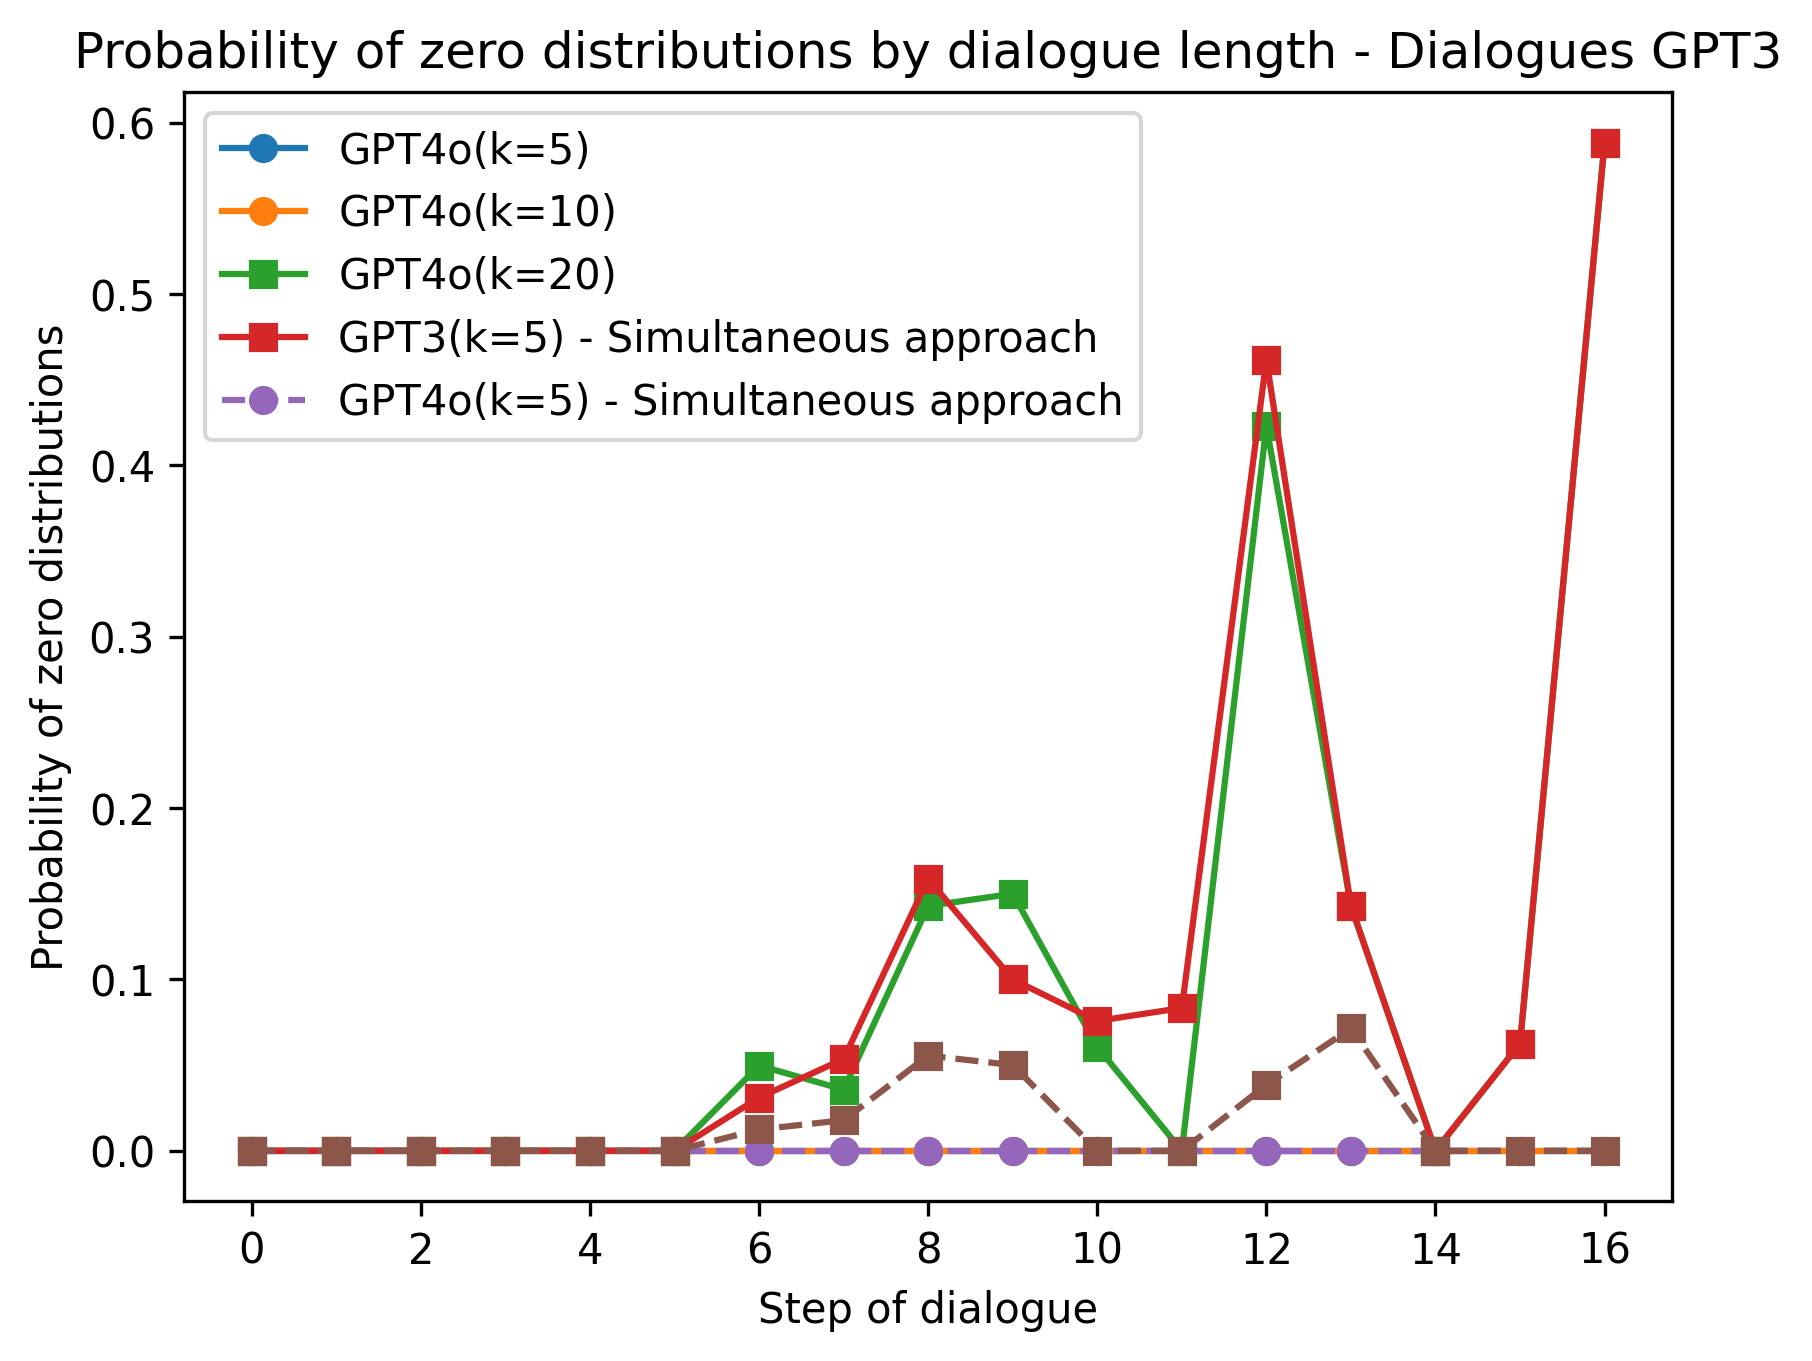

In [86]:
plt.figure(dpi=300)
plt.plot(norm_apo_app1_gpt3ongpt3_k5, marker = 'o')
plt.plot(norm_apo_app1_gpt3ongpt3_k20, marker = 'o')
plt.plot(norm_apo_app1_gpt4ongpt3_k5, marker = 's')
# plt.plot(norm_apo_app1_gpt4ongpt3_k10, marker = 's')
plt.plot(norm_apo_app1_gpt4ongpt3_k20, marker = 's')
plt.plot(norm_apo_app2_gpt3ongpt3_k5, marker = 'o', linestyle='dashed')
plt.plot(norm_apo_app2_gpt4ongpt3_k5, marker = 's', linestyle='dashed')
plt.xlabel('Step of dialogue')
plt.ylabel('Probability of zero distributions')
plt.title('Probability of zero distributions by dialogue length - Dialogues GPT3')
plt.legend(['GPT4o(k=5)', 'GPT4o(k=10)', 'GPT4o(k=20)', 'GPT3(k=5) - Simultaneous approach', 'GPT4o(k=5) - Simultaneous approach'])
plt.show()

### Resurected

In [87]:
def compute_resurrected_items_p_sum(grouped_data):
  p_summatory = 0
  counter = 0
  for dialogue_id, dialogue in enumerate(grouped_data):
    #print("DIALOGUE: , ", dialogue["dialogue_id"])
    intra_dialogues = dialogue["intra_dialogues"]
    for i in range(0, len(dialogue["intra_dialogues"])):
      resurrected_items = []
      resurrected_p = 0
      
      if(i != 0):
        current_distr = intra_dialogues[i]["p_distribuition"]
        previous_distr = intra_dialogues[i-1]["p_distribuition"]
        
        # finding resurrected items
        for item in list(current_distr.keys()):
          if(previous_distr[item] == 0 and current_distr[item] > previous_distr[item]):
            resurrected_items.append(item)
        
        for item in resurrected_items:
          resurrected_p += current_distr[item]
          
        p_summatory += resurrected_p
        counter += 1
        
      grouped_data[dialogue_id]["intra_dialogues"][i]["resurrected_items"] = resurrected_items
      grouped_data[dialogue_id]["intra_dialogues"][i]["resurrected_items_p"] = resurrected_p
  
  resurrected_p_average = p_summatory / counter
  
  return grouped_data, resurrected_p_average

In [88]:
five_analyzed_data, five_r_p_average = compute_resurrected_items_p_sum(grouped_dialogues['app1_gpt3ongpt3_k5'])
ten_analyzed_data, ten_r_p_average = compute_resurrected_items_p_sum(grouped_dialogues['app1_gpt3ongpt3_k10'])
twenty_analyzed_data, twenty_r_p_average = compute_resurrected_items_p_sum(grouped_dialogues['app1_gpt3ongpt3_k20'])
five_gpt4o_analyzed_data, five_gpt4o_r_p_average = compute_resurrected_items_p_sum(grouped_dialogues['app1_gpt4ongpt3_k5'])
ten_gpt4o_analyzed_data, ten_gpt4o_r_p_average = compute_resurrected_items_p_sum(grouped_dialogues['app1_gpt4ongpt3_k10'])
twenty_gpt4o_analyzed_data, twenty_gpt4o_r_p_average = compute_resurrected_items_p_sum(grouped_dialogues['app1_gpt4ongpt3_k20'])

print("Resurrected avg GPT3 (k=5, k=10, k=20): ", five_r_p_average, ten_r_p_average, twenty_r_p_average)
print("Resurrected avg GPT4o (k=5, k=10, k=20): ", five_gpt4o_r_p_average, ten_gpt4o_r_p_average, twenty_gpt4o_r_p_average)

Resurrected avg GPT3 (k=5, k=10, k=20):  0.11246965888689413 0.09104739676840211 0.07166732495511678
Resurrected avg GPT4o (k=5, k=10, k=20):  0.046403590664272895 0.05322728904847397 0.03986876122082587


In [89]:
def resurected_items_length_app1(grouped_data, max_dialogue_length):
  resurected_items_by_length = []
  resurected_items_by_length_norm = []
  counter = []
  for _ in range(0, max_dialogue_length, 1):
    resurected_items_by_length.append(0)
    resurected_items_by_length_norm.append(0)
    counter.append(0)
  
  for dialogue in grouped_data:
    dialogue_id = dialogue["dialogue_id"]
    intra_dialogues = dialogue["intra_dialogues"]
    for step in intra_dialogues:
      resurected_items_by_length[len(intra_dialogues)-1] += len(step['resurrected_items'])
      resurected_items_by_length_norm[len(intra_dialogues)-1] += step['resurrected_items_p']
      counter[len(intra_dialogues)-1] += 1
  
  for i in range(len(resurected_items_by_length_norm)):
    if counter[i] != 0:
      resurected_items_by_length_norm[i] = resurected_items_by_length_norm[i] / counter[i]

  return resurected_items_by_length, resurected_items_by_length_norm

In [90]:
def resurected_items_length_app2(grouped_data, max_dialogue_length):
    resurected_items_by_length = []
    resurected_items_by_lengt_norm = []
    counter = []
    for _ in range(0, max_dialogue_length, 1):
        resurected_items_by_length.append(0)
        resurected_items_by_lengt_norm.append(0)
        counter.append(0)

    for dialogue_id, dialogue in enumerate(grouped_data):
        intra_dialogues = dialogue["intra_dialogues"]
        for step in range(0, len(dialogue["intra_dialogues"])):
            if step != 0:
                current_candidates = list(intra_dialogues[step]['p_distribuition'].keys())
                privious_candidates = list(intra_dialogues[step-1]['p_distribuition'].keys())
                item_resurrected = [item for item in current_candidates if item not in privious_candidates]
                if item_resurrected != []:
                    resurected_items_by_length[step] += len(item_resurrected)
                    for item in item_resurrected:
                        resurected_items_by_lengt_norm[step] += intra_dialogues[step]['p_distribuition'][item]
                    counter[step] += 1
                    
    for i in range(len(resurected_items_by_lengt_norm)):
        if counter[i] != 0:
            resurected_items_by_lengt_norm[i] = resurected_items_by_lengt_norm[i] / counter[i]

    return resurected_items_by_length, resurected_items_by_lengt_norm

In [91]:
resurected_gpt3_app1_on3_k5, resurected_norm_gpt3_app1_on3_k5 = resurected_items_length_app1(five_analyzed_data, max_dialogue_length_gpt3)
resurected_gpt3_app1_on3_k10, resurected_norm_gpt3_app1_on3_k10 = resurected_items_length_app1(ten_analyzed_data, max_dialogue_length_gpt3)
resurected_gpt3_app1_on3_k20, resurected_norm_gpt3_app1_on3_k20= resurected_items_length_app1(twenty_analyzed_data, max_dialogue_length_gpt3)
resurected_gpt3_app1_on4_k5, resurected_norm_gpt3_app1_on4_k5= resurected_items_length_app1(five_gpt4o_analyzed_data, max_dialogue_length_gpt3)
resurected_gpt3_app1_on4_k10, resurected_norm_gpt3_app1_on4_k10 = resurected_items_length_app1(ten_gpt4o_analyzed_data, max_dialogue_length_gpt3)
resurected_gpt3_app1_on4_k20, resurected_norm_gpt3_app1_on4_k20 = resurected_items_length_app1(twenty_gpt4o_analyzed_data, max_dialogue_length_gpt3)

resurected_gpt3_app2_on3_k5, resurected_norm_gpt3_app2_on3_k5 = resurected_items_length_app2(grouped_dialogues['app2_gpt3ongpt3_k5'], max_dialogue_length_gpt3)
resurected_gpt3_app2_on4_k5, resurected_norm_gpt3_app2_on4_k5 = resurected_items_length_app2(grouped_dialogues['app2_gpt4ongpt3_k5'], max_dialogue_length_gpt3)

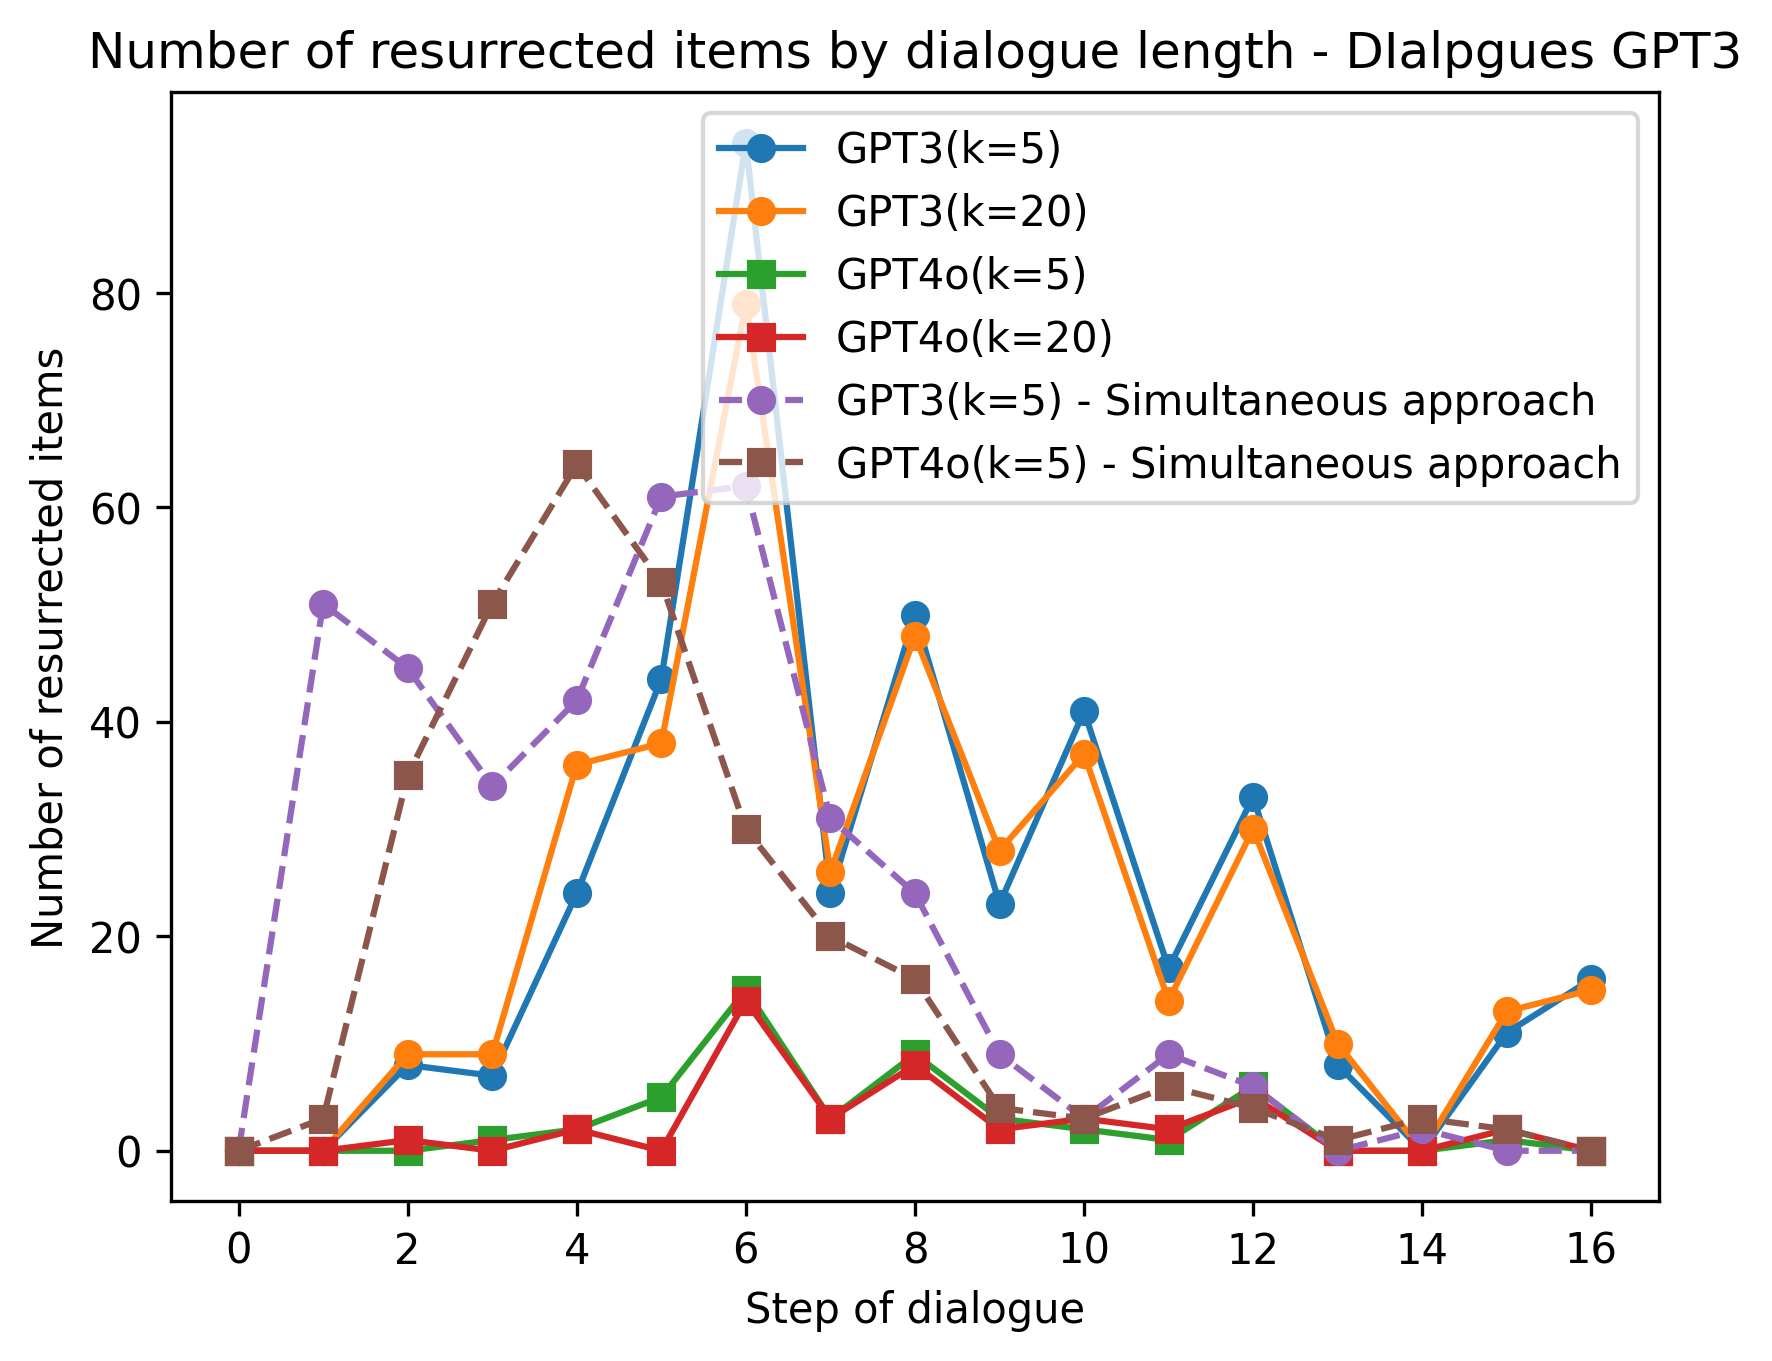

In [92]:
plt.figure(dpi=300)
plt.plot(resurected_gpt3_app1_on3_k5, marker = 'o')
# plt.plot(resurected_gpt3_app1_on3_k10, marker = 'o')
plt.plot(resurected_gpt3_app1_on3_k20, marker = 'o')
plt.plot(resurected_gpt3_app1_on4_k5, marker = 's')
# plt.plot(resurected_gpt3_app1_on4_k10, marker = 's')
plt.plot(resurected_gpt3_app1_on4_k20, marker = 's')

plt.plot(resurected_gpt3_app2_on3_k5, marker = 'o', linestyle='dashed')
plt.plot(resurected_gpt3_app2_on4_k5, marker = 's', linestyle='dashed')
plt.xlabel('Step of dialogue')
plt.ylabel('Number of resurrected items')
plt.title('Number of resurrected items by dialogue length - DIalpgues GPT3')
plt.legend(['GPT3(k=5)', 'GPT3(k=20)', 'GPT4o(k=5)', 'GPT4o(k=20)', 'GPT3(k=5) - Simultaneous approach', 'GPT4o(k=5) - Simultaneous approach'])
plt.show()

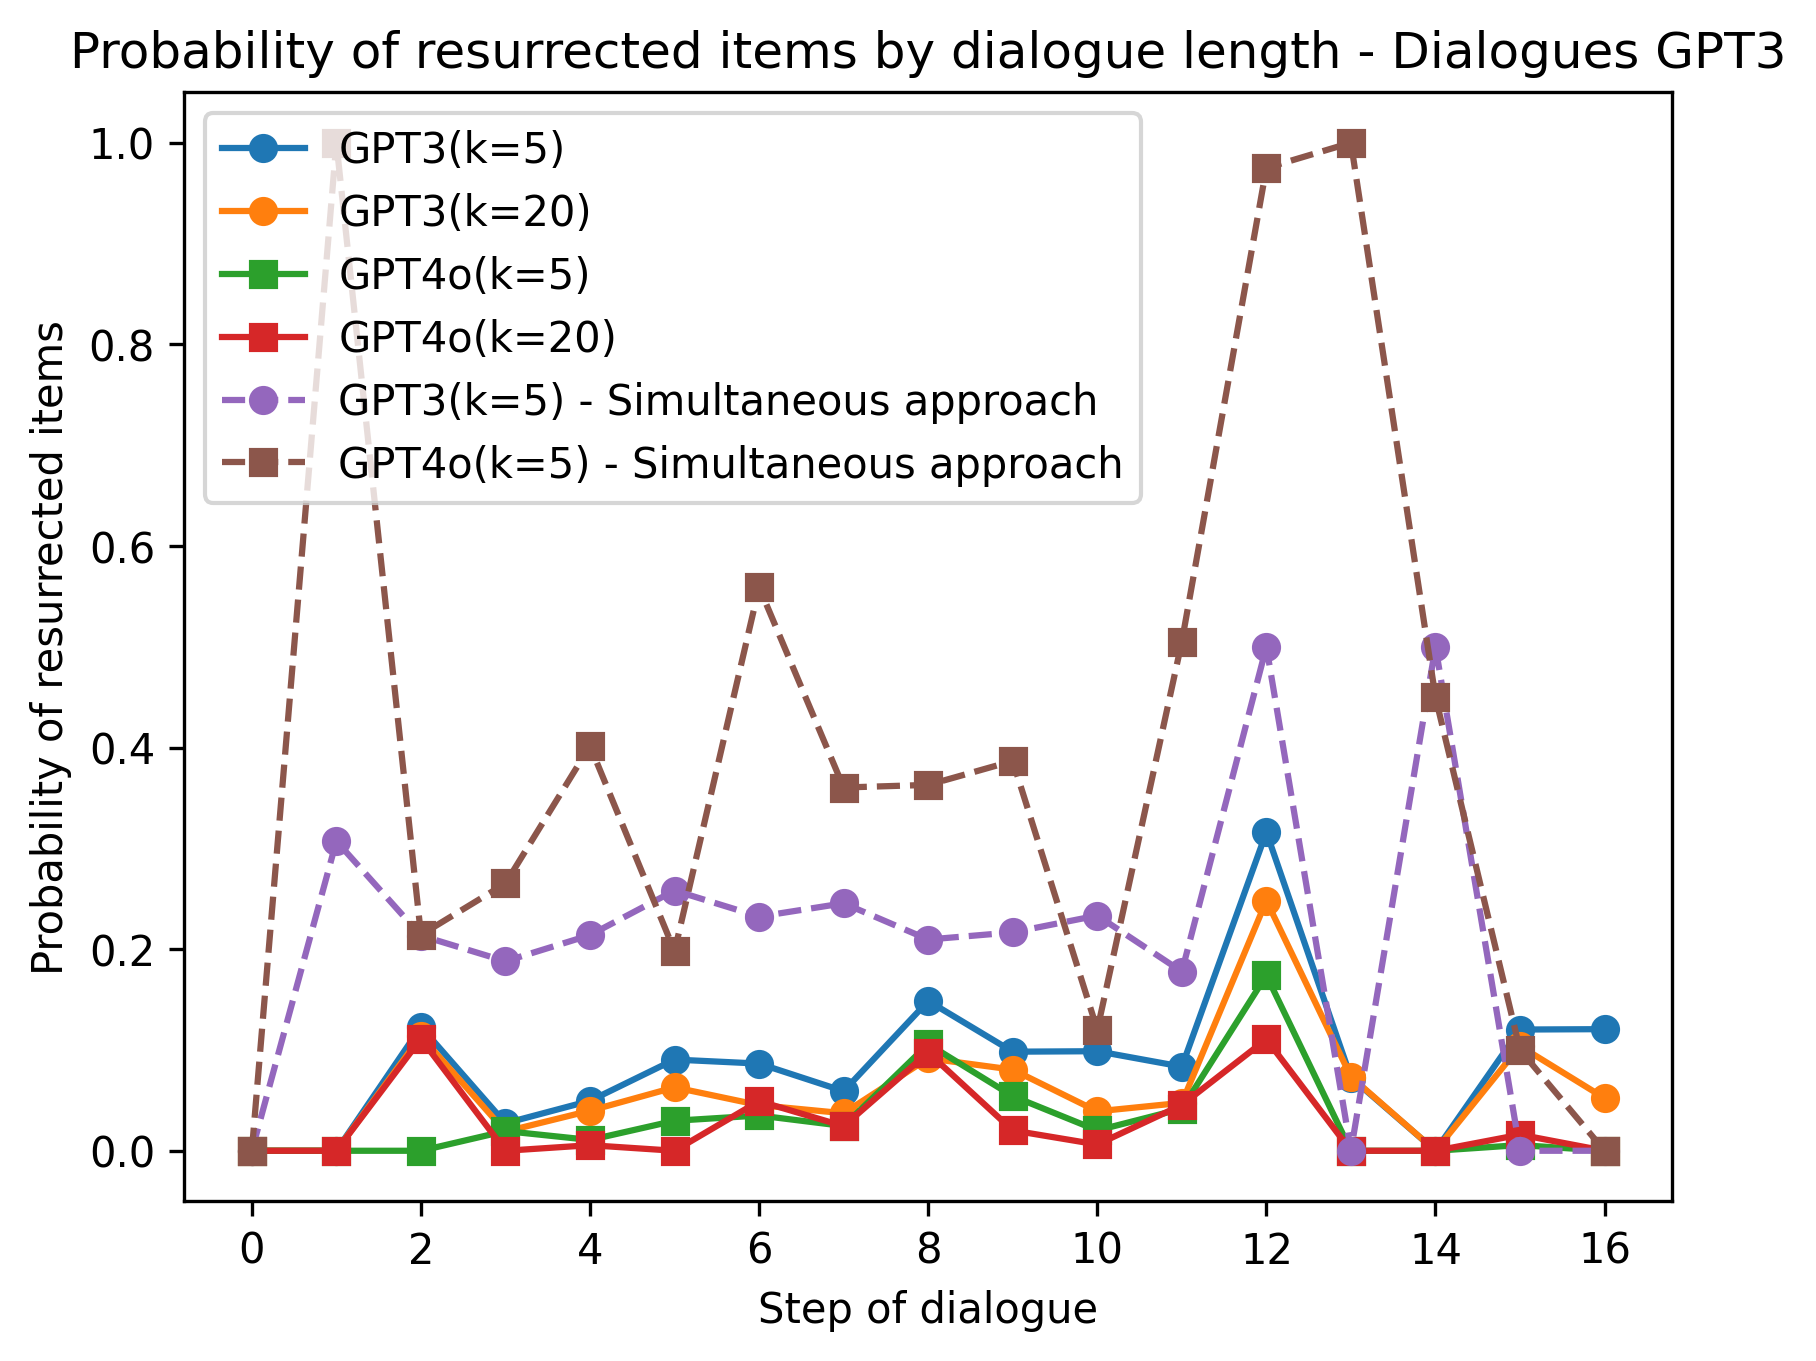

In [93]:
plt.figure(dpi=300)
plt.plot(resurected_norm_gpt3_app1_on3_k5, marker = 'o')
# plt.plot(resurected_norm_gpt3_app1_on3_k10, marker = 'o')
plt.plot(resurected_norm_gpt3_app1_on3_k20, marker = 'o')
plt.plot(resurected_norm_gpt3_app1_on4_k5, marker = 's')
# plt.plot(resurected_norm_gpt3_app1_on4_k10, marker = 's')
plt.plot(resurected_norm_gpt3_app1_on4_k20, marker = 's')
plt.plot(resurected_norm_gpt3_app2_on3_k5, marker = 'o', linestyle='dashed')
plt.plot(resurected_norm_gpt3_app2_on4_k5, marker = 's', linestyle='dashed')
plt.xlabel('Step of dialogue')
plt.ylabel('Probability of resurrected items')
plt.title('Probability of resurrected items by dialogue length - Dialogues GPT3')
plt.legend(['GPT3(k=5)', 'GPT3(k=20)', 'GPT4o(k=5)', 'GPT4o(k=20)', 'GPT3(k=5) - Simultaneous approach', 'GPT4o(k=5) - Simultaneous approach'])
plt.show()

## Dialogues generated by GPT4o

In [106]:
entropy_gpt4_app2_on3_k5_data_path = "./data/generation/8_mcrae/gpt/entropy/old_entropy/sbs_entropy(gpt4o)_k_five_gpt3_sim_app.csv"
entropy_gpt4_app2_on4_k5_data_path = "./data/generation/8_mcrae/gpt/entropy/old_entropy/sbs_entropy(gpt4o)_k_five_gpt4o_sim_app.csv"
entropy_gpt4_app1_on3_k5_data_path = "./data/generation/8_mcrae/gpt/entropy/old_entropy/entropy_gpt4o_app1_on3_k5_apocalypse_cleaned.csv"
entropy_gpt4_app1_on4_k5_data_path = "./data/generation/8_mcrae/gpt/entropy/old_entropy/sbs_entropy(gpt4o)_k_five_gpt4o.csv"

entropy_gpt4_app2_on3_k5_rf = open(entropy_gpt4_app2_on3_k5_data_path, 'r', newline='')
entropy_gpt4_app2_on4_k5_rf = open(entropy_gpt4_app2_on4_k5_data_path, 'r', newline='')
entropy_gpt4_app1_on3_k5_rf = open(entropy_gpt4_app1_on3_k5_data_path, 'r', newline='')
entropy_gpt4_app1_on4_k5_rf = open(entropy_gpt4_app1_on4_k5_data_path, 'r', newline='')

entropy_gpt4_app2_on3_k5_reader = csv.DictReader(entropy_gpt4_app2_on3_k5_rf, delimiter=",")
entropy_gpt4_app2_on4_k5_reader = csv.DictReader(entropy_gpt4_app2_on4_k5_rf, delimiter=",")
entropy_gpt4_app1_on3_k5_reader = csv.DictReader(entropy_gpt4_app1_on3_k5_rf, delimiter=",")
entropy_gpt4_app1_on4_k5_reader = csv.DictReader(entropy_gpt4_app1_on4_k5_rf, delimiter=",")

entropy_gpt4_app2_on3_k5, max_dialogue_length_gpt4o = group_entropies_by_dialogue_id(entropy_gpt4_app2_on3_k5_reader)
entropy_gpt4_app2_on4_k5, _ = group_entropies_by_dialogue_id(entropy_gpt4_app2_on4_k5_reader)
entropy_gpt4_app1_on3_k5, _ = group_entropies_by_dialogue_id(entropy_gpt4_app1_on3_k5_reader)
entropy_gpt4_app1_on4_k5, _ = group_entropies_by_dialogue_id(entropy_gpt4_app1_on4_k5_reader)

entropy_gpt4_app2_on3_k5_rf.close()
entropy_gpt4_app2_on4_k5_rf.close()
entropy_gpt4_app1_on3_k5_rf.close()
entropy_gpt4_app1_on4_k5_rf.close()

In [99]:
dialogues_data_paths = {
    "app1_gpt3ongpt4o_k5": "./data/generation/8_mcrae/gpt/dialogues/app1_gpt3ongpt4o_k5.csv",
    "app1_gpt4ongpt4o_k5": "./data/generation/8_mcrae/gpt/dialogues/app1_gpt4ongpt4o_k5.csv",
    "app2_gpt3ongpt4o_k5": "./data/generation/8_mcrae/gpt/dialogues/app2_gpt3ongpt4o_k5.csv",
    "app2_gpt4ongpt4o_k5": "./data/generation/8_mcrae/gpt/dialogues/app2_gpt4ongpt4o_k5.csv"
}

# Funzione per caricare e raggruppare i dati per ID dialogo
def load_and_group_data_by_dialogue(file_path):
    with open(file_path, 'r', newline='') as file:
        reader = csv.DictReader(file, delimiter=",")
        return group_sbs_data_by_dialogue_id(reader)

In [101]:
dialogues_data_gpt4o = {}

# Caricamento e raggruppamento dei dati
for name, path in dialogues_data_paths.items():
    dialogues_data_gpt4o[name] = load_and_group_data_by_dialogue(path)

# Esempio di accesso ai dati
print(dialogues_data_gpt4o["app1_gpt3ongpt4o_k5"])

[{'dialogue_id': 0, 'intra_dialogues': [{'intra_dialogue_id': 0, 'p_distribuition': {'elk': 0.25, 'chicken': 0.0, 'robin': 0.0, 'starling': 0.0, 'fox': 0.25, 'partridge': 0.0, 'hamster': 0.25, 'buffalo': 0.25}, 'target': 'fox', 'question': 'Is the item you are thinking of a bird?', 'answer': 'No.'}, {'intra_dialogue_id': 1, 'p_distribuition': {'elk': 0.2381, 'chicken': 0.0476, 'robin': 0.0, 'starling': 0.0, 'fox': 0.2381, 'partridge': 0.0, 'hamster': 0.2381, 'buffalo': 0.2381}, 'target': 'fox', 'question': 'Is the item you are thinking of a mammal?', 'answer': 'Yes.'}, {'intra_dialogue_id': 2, 'p_distribuition': {'elk': 0.25, 'chicken': 0.0, 'robin': 0.0, 'starling': 0.0, 'fox': 0.25, 'partridge': 0.0, 'hamster': 0.25, 'buffalo': 0.25}, 'target': 'fox', 'question': 'Is the item you are thinking of a large mammal?', 'answer': 'No.'}, {'intra_dialogue_id': 3, 'p_distribuition': {'elk': 0.1579, 'chicken': 0.0, 'robin': 0.0, 'starling': 0.0, 'fox': 0.2105, 'partridge': 0.1579, 'hamster': 0

In [103]:
entropies_optimal_gpt4o = {'dialogue_id': [], 'intra_dialogue_id': [], 'entropy_op': []}
for dialogue_id, dialogue in enumerate(dialogues_data_gpt4o["app1_gpt3ongpt4o_k5"]):
    intra_dialogues = dialogue["intra_dialogues"]
    total_steps = len(intra_dialogues)
    initial_num_candidates = 8
    num_candidates = initial_num_candidates
    for i in range(total_steps):
        # num_candidates = max(1, initial_num_candidates - i * (initial_num_candidates - 1) // (total_steps - 1))
        num_candidates = max(1, int(num_candidates / 2))
        
        optimal_distribution = np.zeros(8)
        for j in range(0, num_candidates):
            optimal_distribution[j] = 1 / num_candidates
        entropy_opt = sp.stats.entropy(optimal_distribution, base=2)
        entropies_optimal_gpt4o['dialogue_id'].append(dialogue_id)
        entropies_optimal_gpt4o['intra_dialogue_id'].append(i)
        entropies_optimal_gpt4o['entropy_op'].append(entropy_opt)
        # print(f"Step {i}, Entropy: {entropy_opt}, num_candidate: {num_candidates}")
       

In [45]:
current_dialogue_id = -1
max_length = 0
entropies_ideal = {}

for i in range(len(entropies_optimal_gpt4o['dialogue_id'])):
    dialogue_id = entropies_optimal_gpt4o['dialogue_id'][i]
    if(dialogue_id != ''):
      dialogue_id = int(dialogue_id)
      intra_dialogue_id = int(entropies_optimal_gpt4o['intra_dialogue_id'][i])

      if(dialogue_id != current_dialogue_id):
        entropies_ideal[dialogue_id] = []
        current_dialogue_id = dialogue_id
      
      entropies_ideal[dialogue_id].append(entropies_optimal_gpt4o['entropy_op'][i])
      
      if(intra_dialogue_id > max_length):
        max_length = intra_dialogue_id
# print(entropies_ideal)
# print(max_length+1)

In [46]:
def entropy_from_end(entropies_val):   
    entropies_op_by_distances = []

    for _ in range(0, max_dialogue_length_gpt4o, 1):
        entropies_op_by_distances.append([])

    for dialogue_entropy in entropies_val.values():
        dialogue_length = len(dialogue_entropy)
        for step_index, step_entropy in enumerate(dialogue_entropy):
            distance_from_end = dialogue_length - step_index - 1
            entropies_op_by_distances[distance_from_end].append(step_entropy)

    dic_entropies_op_by_distances_end = {}
    for (distance, entropies_by_distance) in enumerate(entropies_op_by_distances):
        std = np.std(entropies_by_distance)
        mean = np.mean(entropies_by_distance)
        dic_entropies_op_by_distances_end[distance+1] = mean
        print(distance, std, mean)

    return dic_entropies_op_by_distances_end

dic_entropies_op_by_distances_end = entropy_from_end(entropies_ideal)

0 0.181462720712174 0.03409090909090909
1 0.4873132191452629 0.2159090909090909
2 0.7371505975444961 0.611764705882353
3 0.8328702416980527 1.0277777777777777
4 0.8317881073786517 1.2173913043478262
5 0.7894706383956841 1.2916666666666667
6 0.924211375534118 1.25
7 0.6324555320336759 1.0
8 0.8660254037844386 1.5
9 0.0 0.0
10 0.0 1.0
11 0.0 2.0


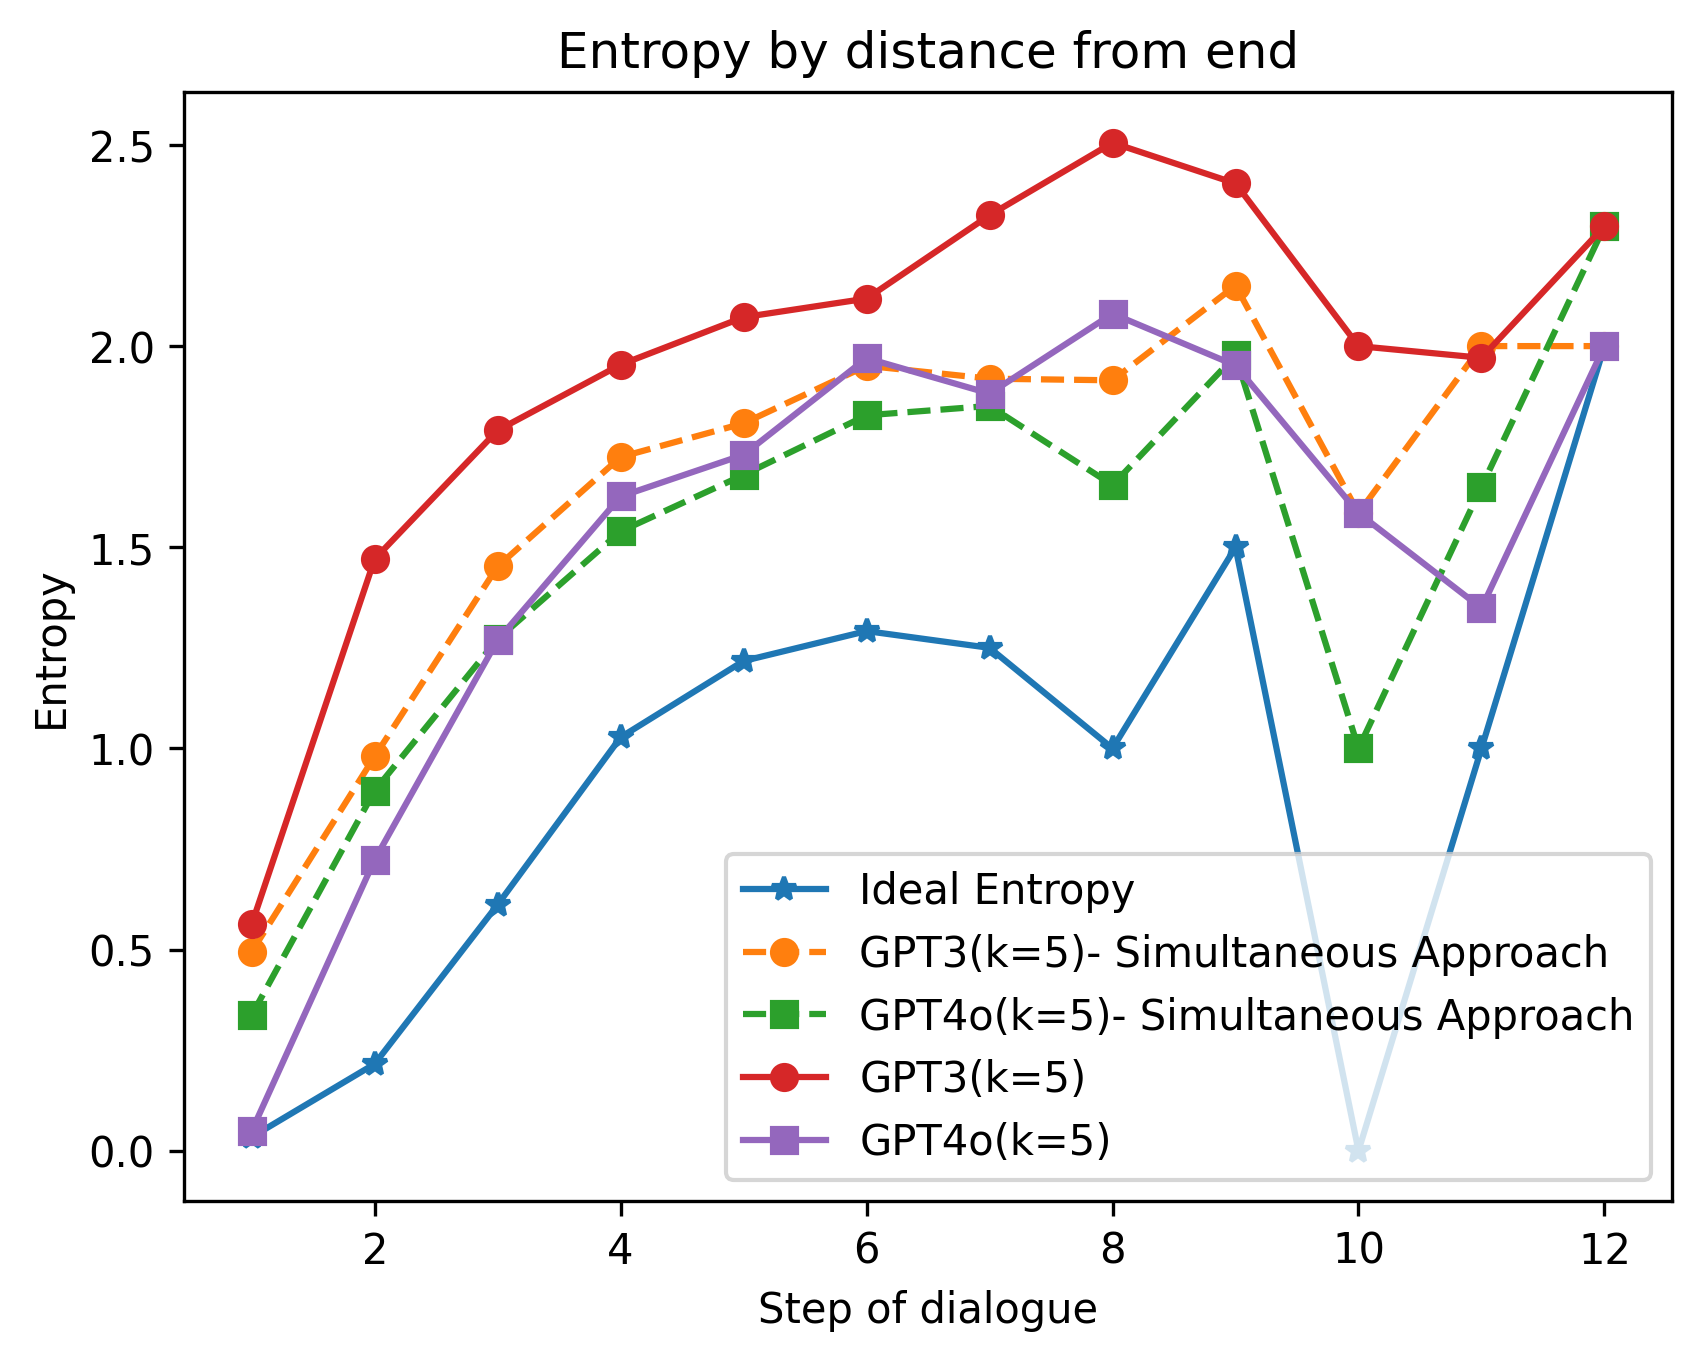

In [47]:
stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_end_path = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt3_statistics_from_dialogue_end_sim_app_apocalypse_cleaned.csv"
stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_end_path = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt4o_statistics_from_dialogue_end_sim_app_apocalypse_cleaned.csv"
stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_end_path = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt4o_statistics_from_dialogue_end_apocalypse_cleaned.csv"
stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_end_path = "./data/generation/8_mcrae/statistics_entropy_gpt4o_app1_on3_k5_apocalypse_cleaned_end.csv"

stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_end_rf = open(stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_end_path, 'r', newline='')
stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_end_rf = open(stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_end_path, 'r', newline='')
stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_end_rf = open(stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_end_path, 'r', newline='')
stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_end_rf = open(stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_end_path, 'r', newline='')

stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_end_reader = csv.DictReader(stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_end_rf, delimiter=",")
stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_end_reader = csv.DictReader(stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_end_rf, delimiter=",")
stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_end_reader = csv.DictReader(stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_end_rf, delimiter=",")
stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_end_reader = csv.DictReader(stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_end_rf, delimiter=",")

stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_end = get_mean(stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_end_reader, key='mean')
stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_end = get_mean(stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_end_reader, key='mean')
stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_end = get_mean(stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_end_reader, key='mean')
stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_end = get_mean(stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_end_reader, key='mean')

x_values = range(1, max_dialogue_length_gpt4o + 1)

plt.figure(dpi=300)
plt.plot(x_values, dic_entropies_op_by_distances_end.values(),  marker = '*')
plt.plot(x_values, stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_end,  marker = 'o', linestyle='dashed')
plt.plot(x_values, stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_end,  marker = 's', linestyle='dashed')
plt.plot(x_values, stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_end,  marker = 'o')
plt.plot(x_values, stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_end,  marker = 's')
plt.xlabel('Step of dialogue')
plt.ylabel('Entropy')
plt.title('Entropy by distance from end')
plt.legend(['Ideal Entropy', 'GPT3(k=5)- Simultaneous Approach', 'GPT4o(k=5)- Simultaneous Approach', 'GPT3(k=5)' ,'GPT4o(k=5)'])

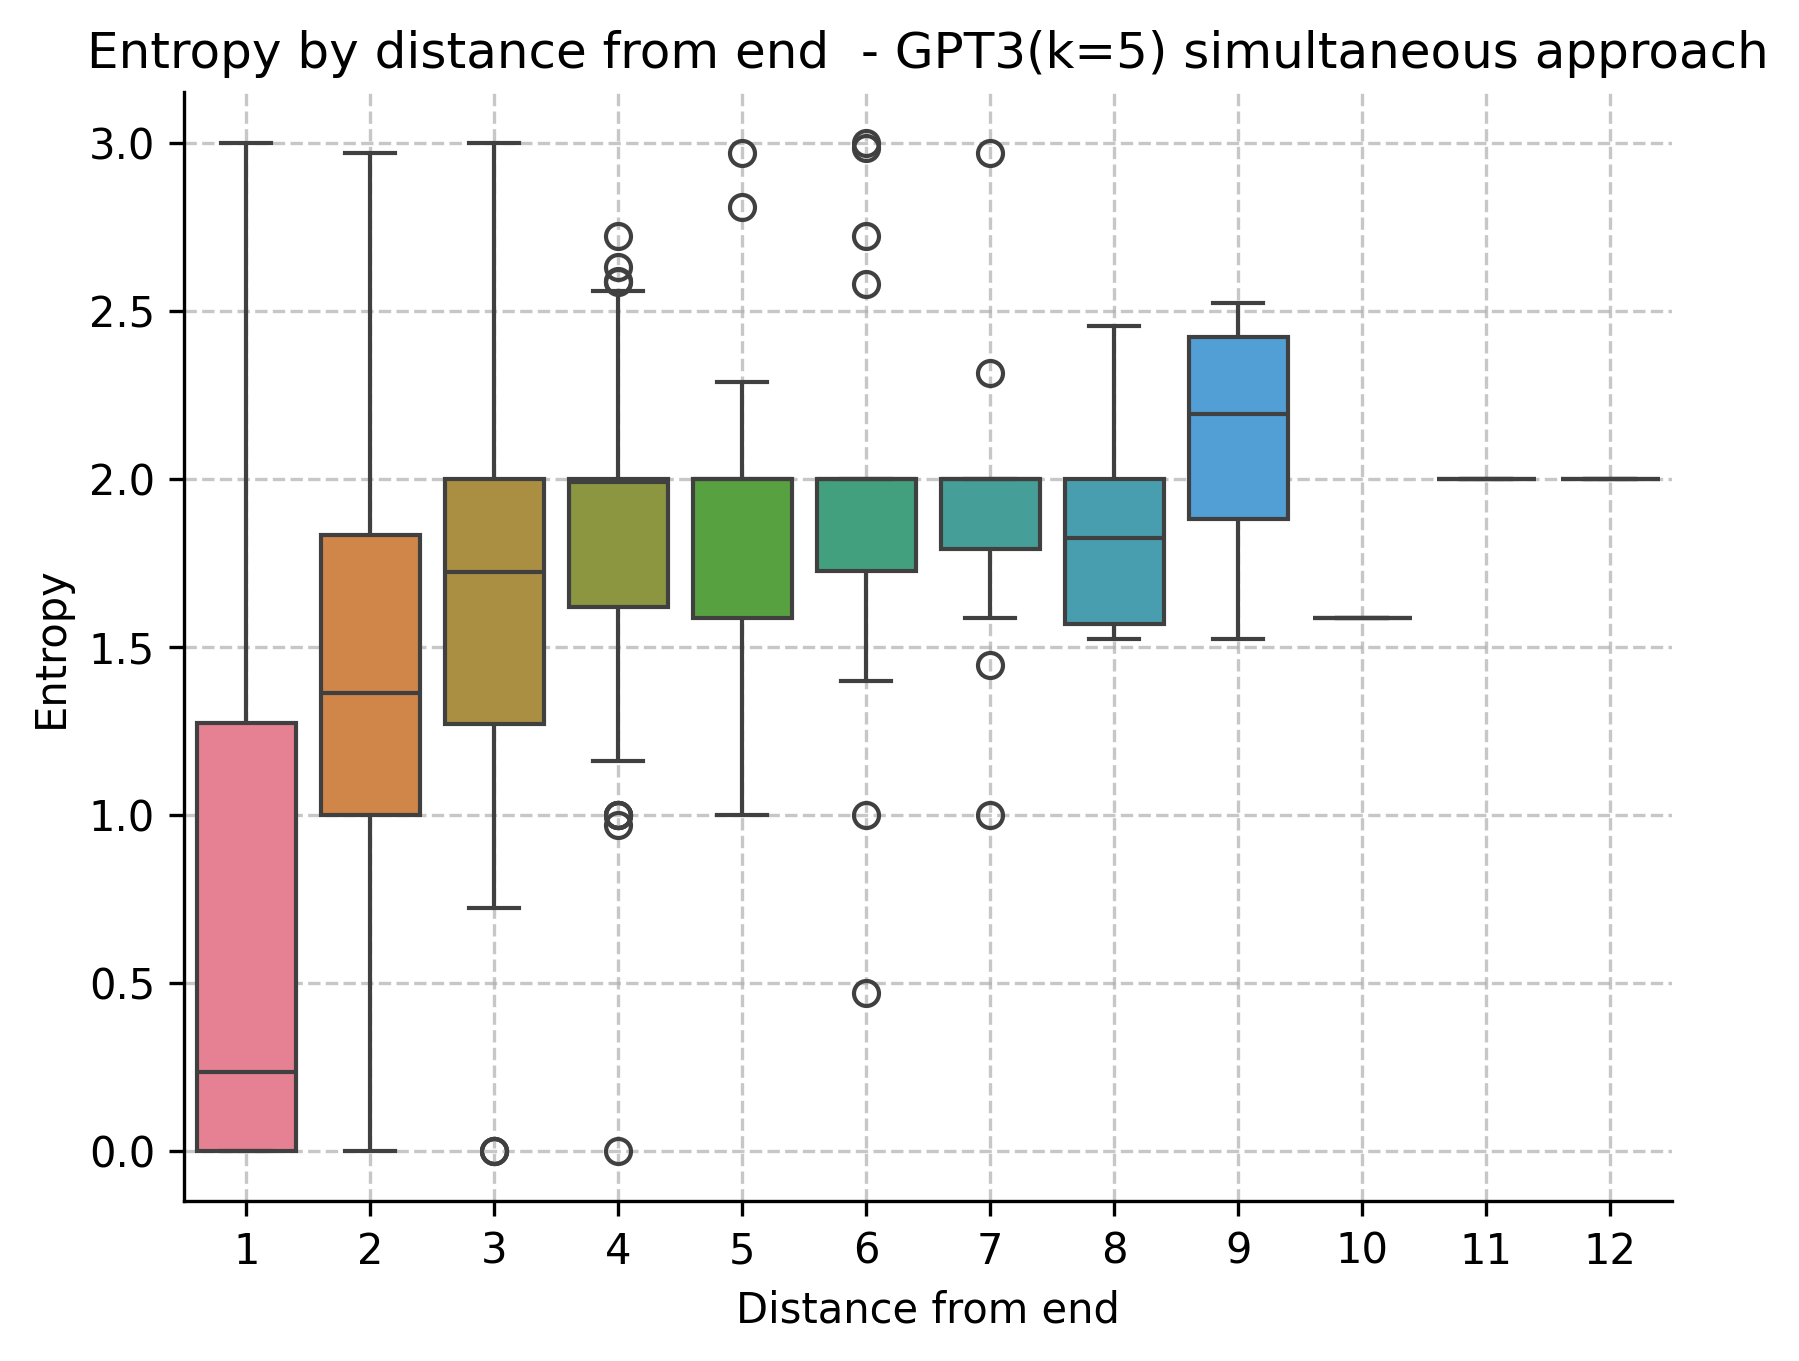

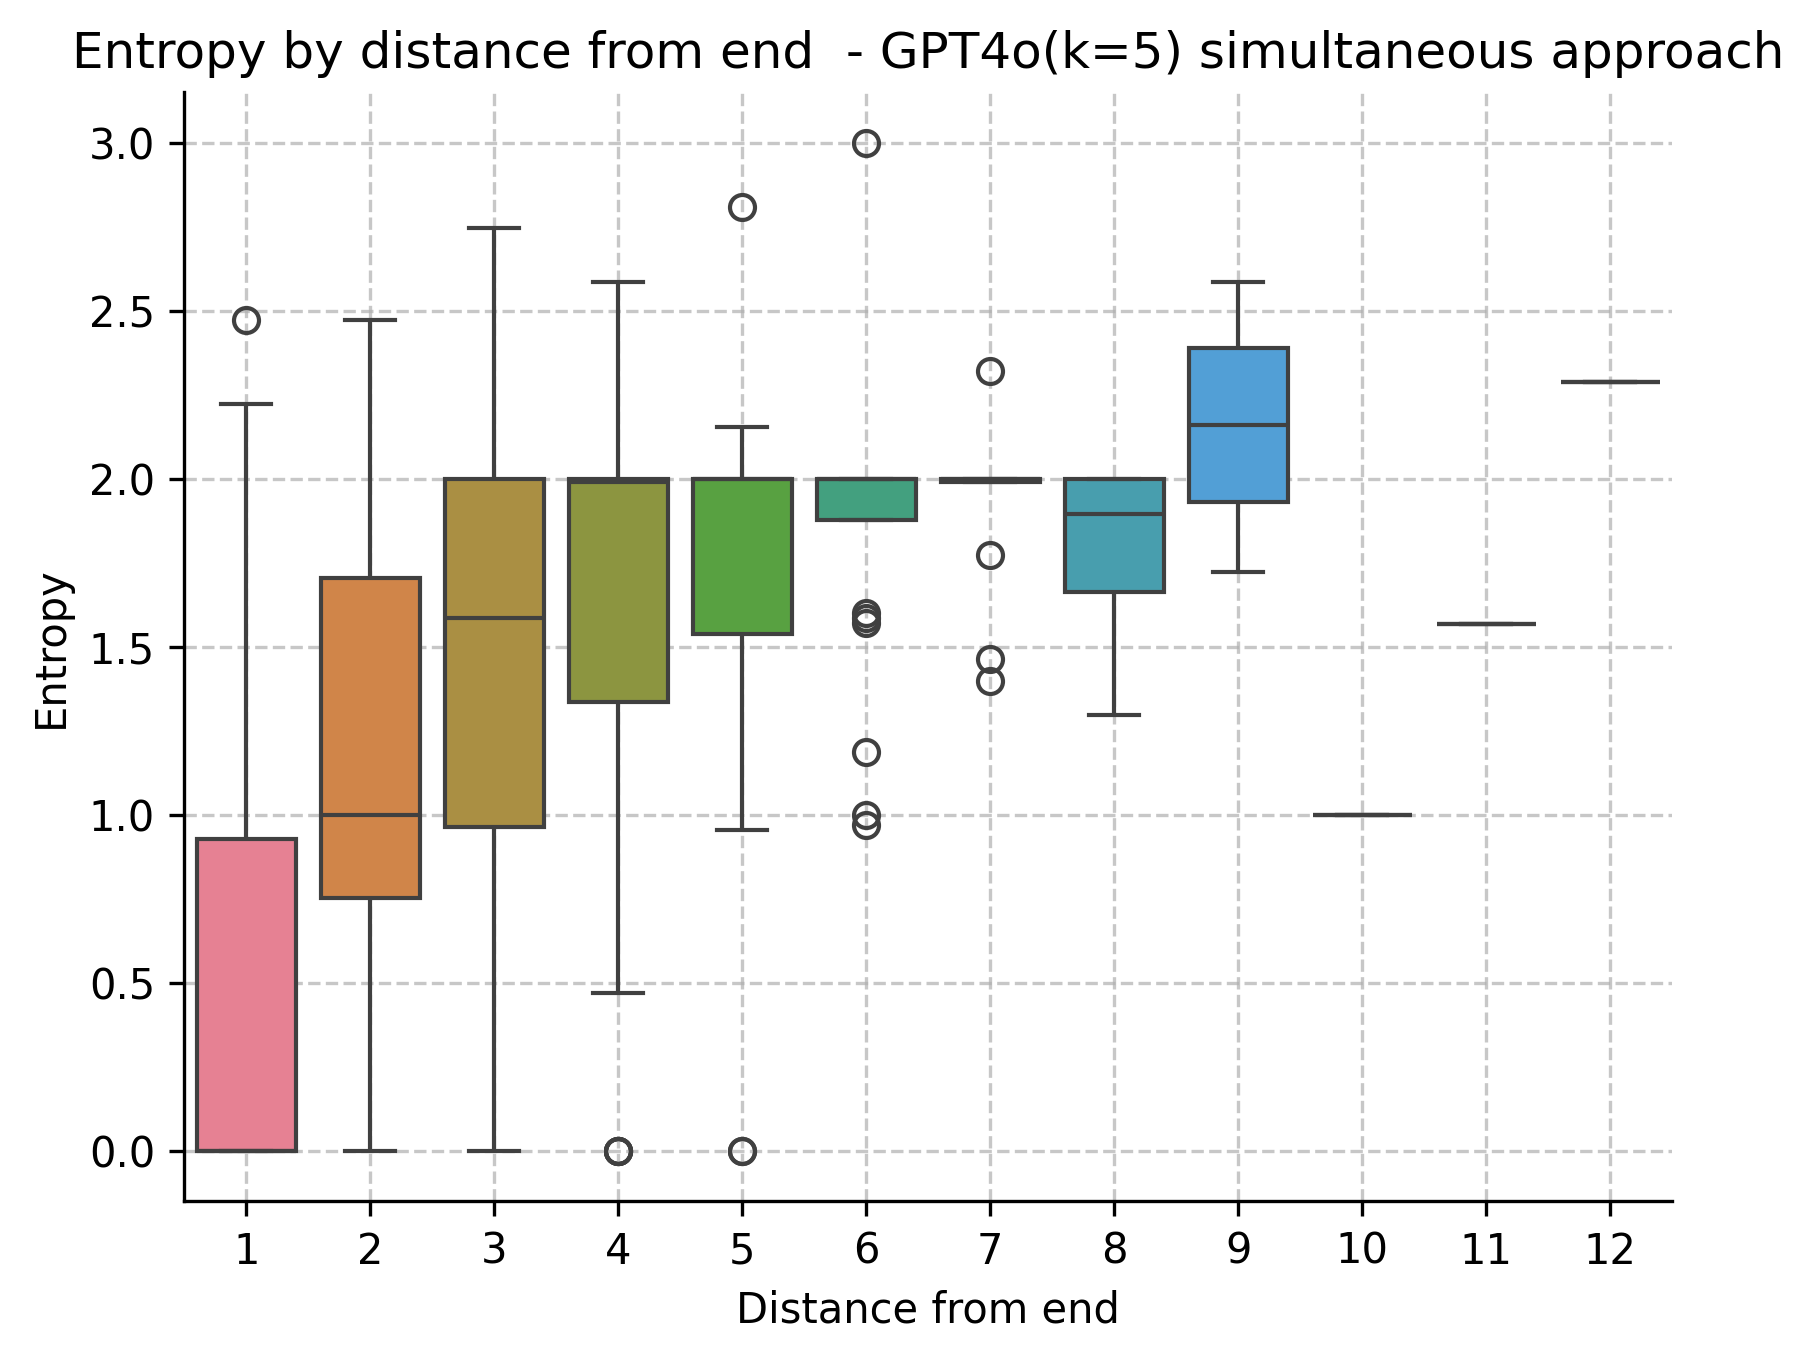

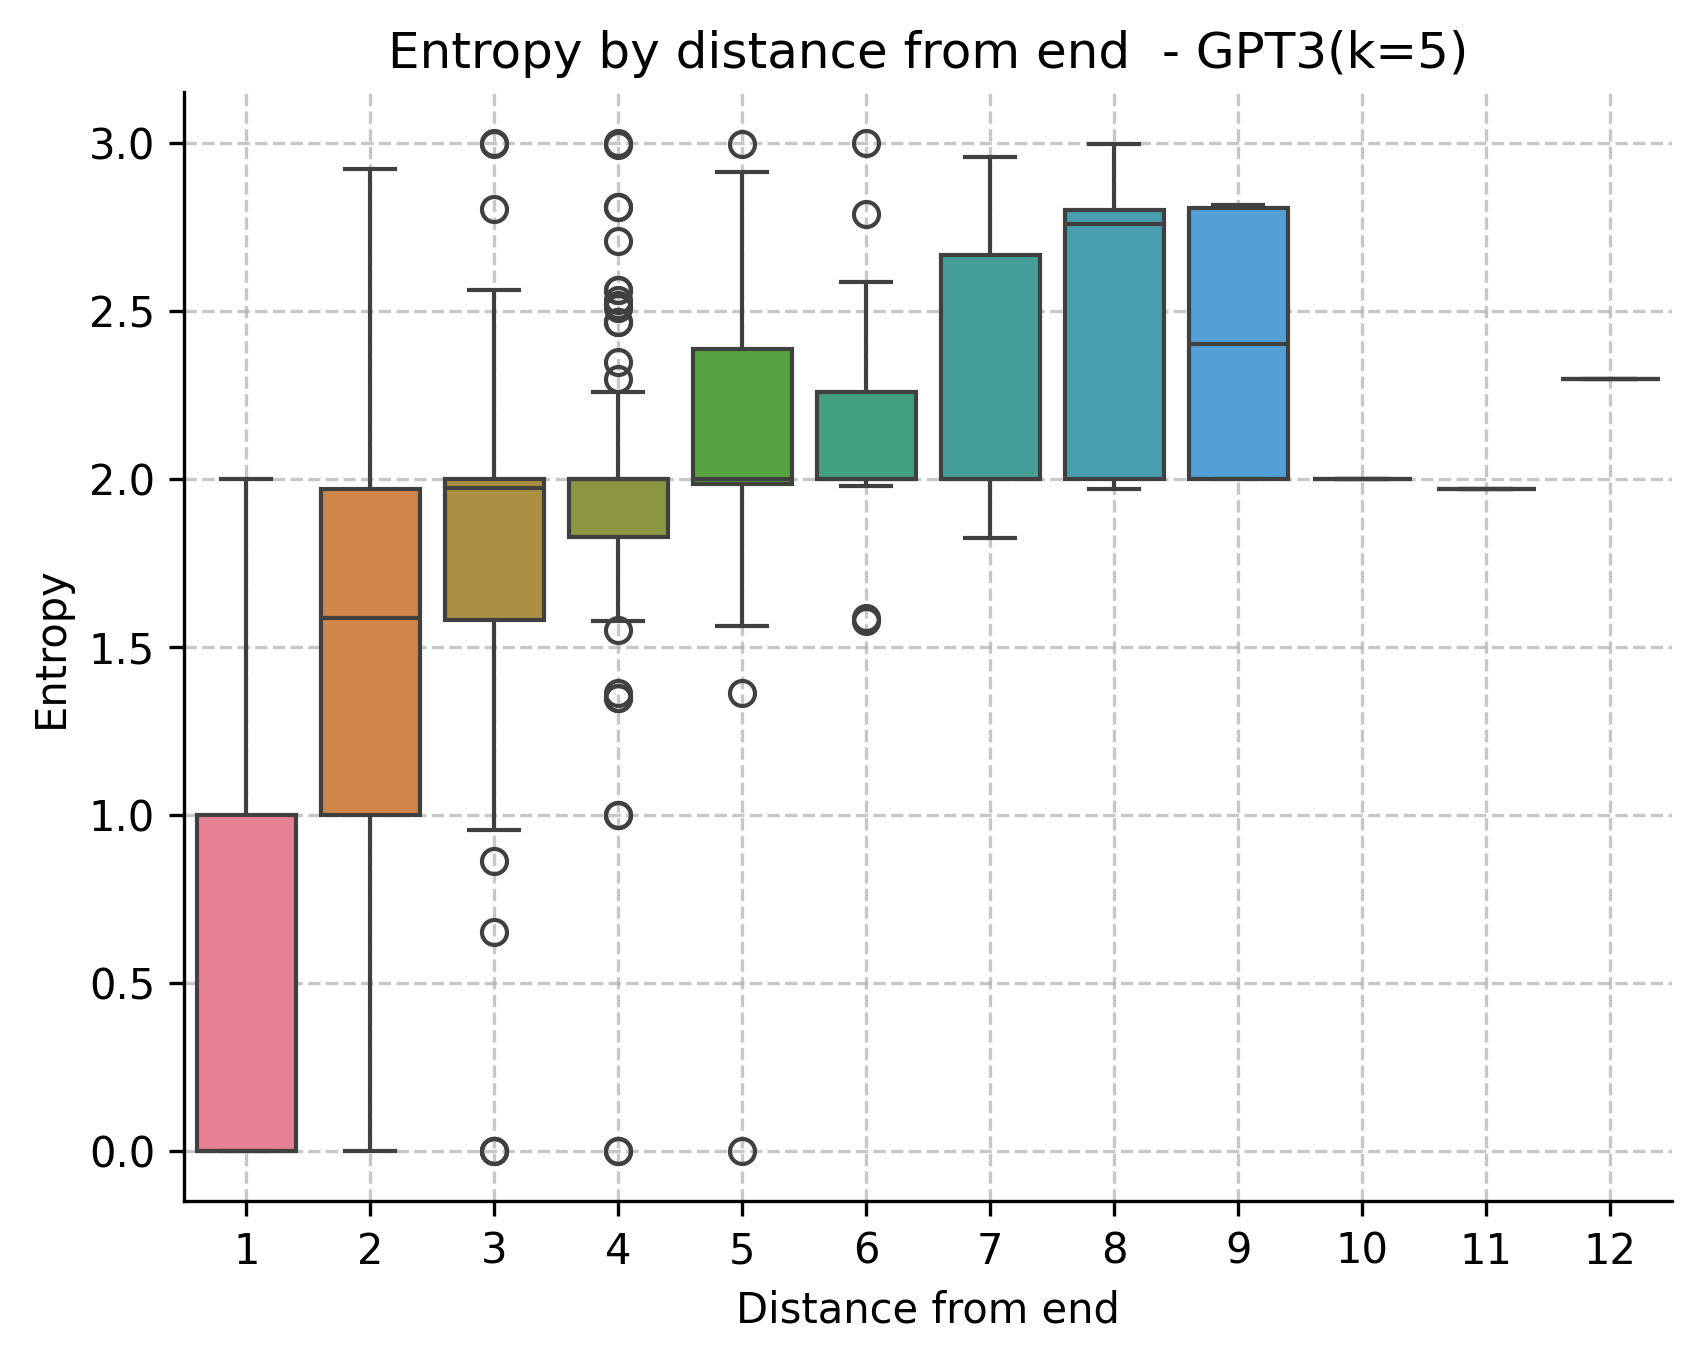

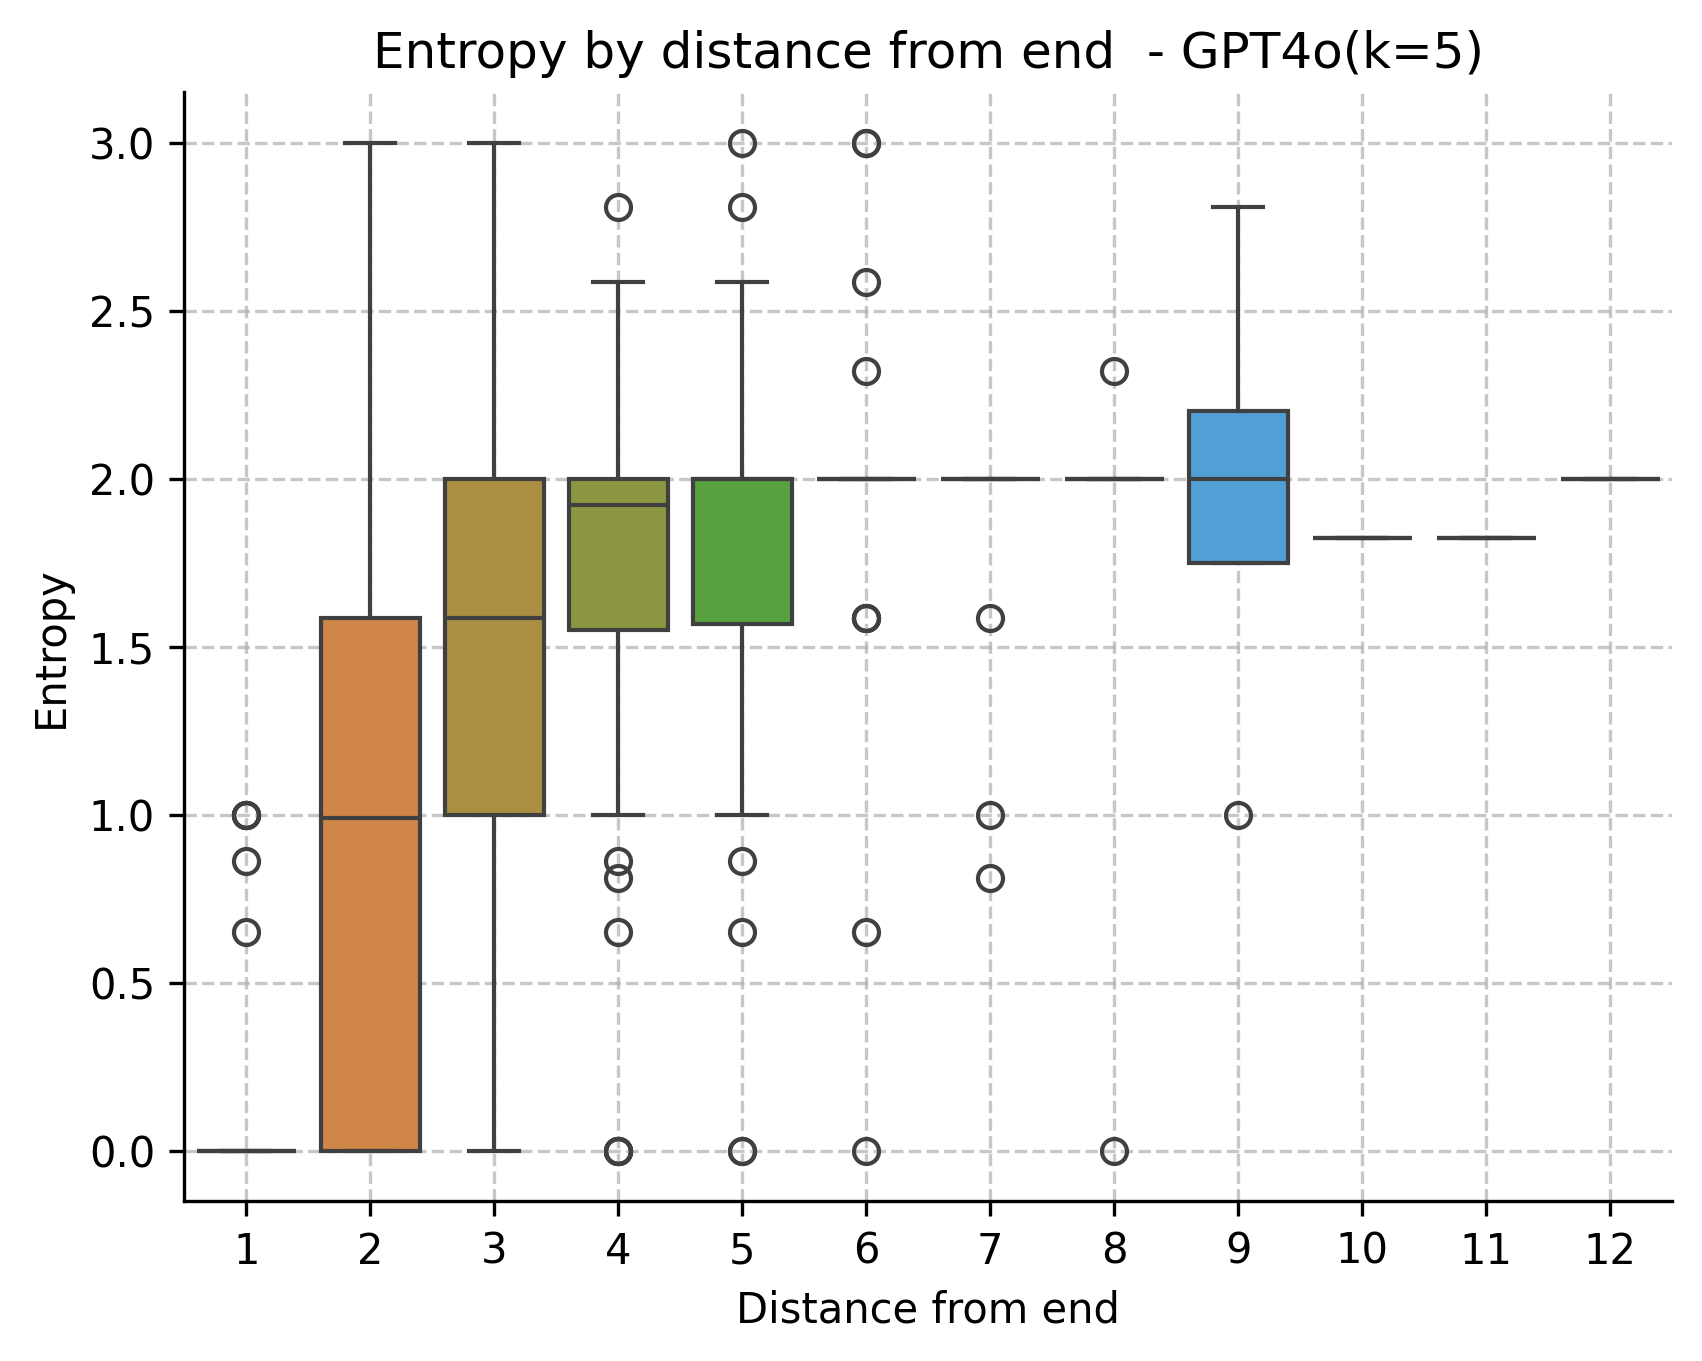

In [48]:
list_entropies = [entropy_gpt4_app2_on3_k5, entropy_gpt4_app2_on4_k5, entropy_gpt4_app1_on3_k5, entropy_gpt4_app1_on4_k5]

labels = ['GPT3(k=5) simultaneous approach', 'GPT4o(k=5) simultaneous approach', 'GPT3(k=5)', 'GPT4o(k=5)']
for i, entropies in enumerate(list_entropies):
    entropies_by_distances = []
    for _ in range(0, max_dialogue_length_gpt4o, 1):
        entropies_by_distances.append([])

    for dialogue_entropy in entropies.values():
        dialogue_length = len(dialogue_entropy)
        for step_index, step_entropy in enumerate(dialogue_entropy):
            distance_from_end = dialogue_length - step_index - 1
            entropies_by_distances[distance_from_end].append(step_entropy)

    # print(entropies_by_distances[0])
    # Creiamo il box plot usando seaborn
    plt.figure(dpi=300)
    sns.boxplot(data=entropies_by_distances)

    # Modifichiamo le etichette dell'asse x per partire da 1
    plt.xlabel('Distance from end')
    plt.ylabel('Entropy')
    plt.title(f'Entropy by distance from end  - {labels[i]}')

    # Impostiamo i tick dell'asse x per partire da 1 invece che da 0
    plt.xticks(ticks=range(len(entropies_by_distances)), labels=range(1, len(entropies_by_distances) + 1))

    # Miglioriamo l'estetica generale del grafico
    sns.despine()  # Rimuove le spine del grafico per un aspetto più pulito
    plt.grid(True, linestyle='--', alpha=0.7)  # Aggiunge una griglia per una migliore leggibilità

    # Mostriamo il grafico
    plt.show()

In [49]:
entropies_op_by_distances = []
  
for _ in range(0, max_dialogue_length_gpt4o, 1):
    entropies_op_by_distances.append([])

for dialogue_entropy in entropies_ideal.values():
    for step_index, step_entropy in enumerate(dialogue_entropy):
        # filter invalid entropy values
        if step_entropy != -1.0:
            entropies_op_by_distances[step_index].append(step_entropy)
      
dic_entropies_op_by_distances_beginnig = {}
for (distance, entropies_by_distance) in enumerate(entropies_op_by_distances):
    std = np.std(entropies_by_distance)
    mean = np.mean(entropies_by_distance)
    dic_entropies_op_by_distances_beginnig[distance] = mean
    print(distance, std, mean)

0 0.0 2.0
1 0.0 1.0
2 0.0 0.0
3 0.0 0.0
4 0.0 0.0
5 0.0 0.0
6 0.0 0.0
7 0.0 0.0
8 0.0 0.0
9 0.0 0.0
10 0.0 0.0
11 0.0 0.0


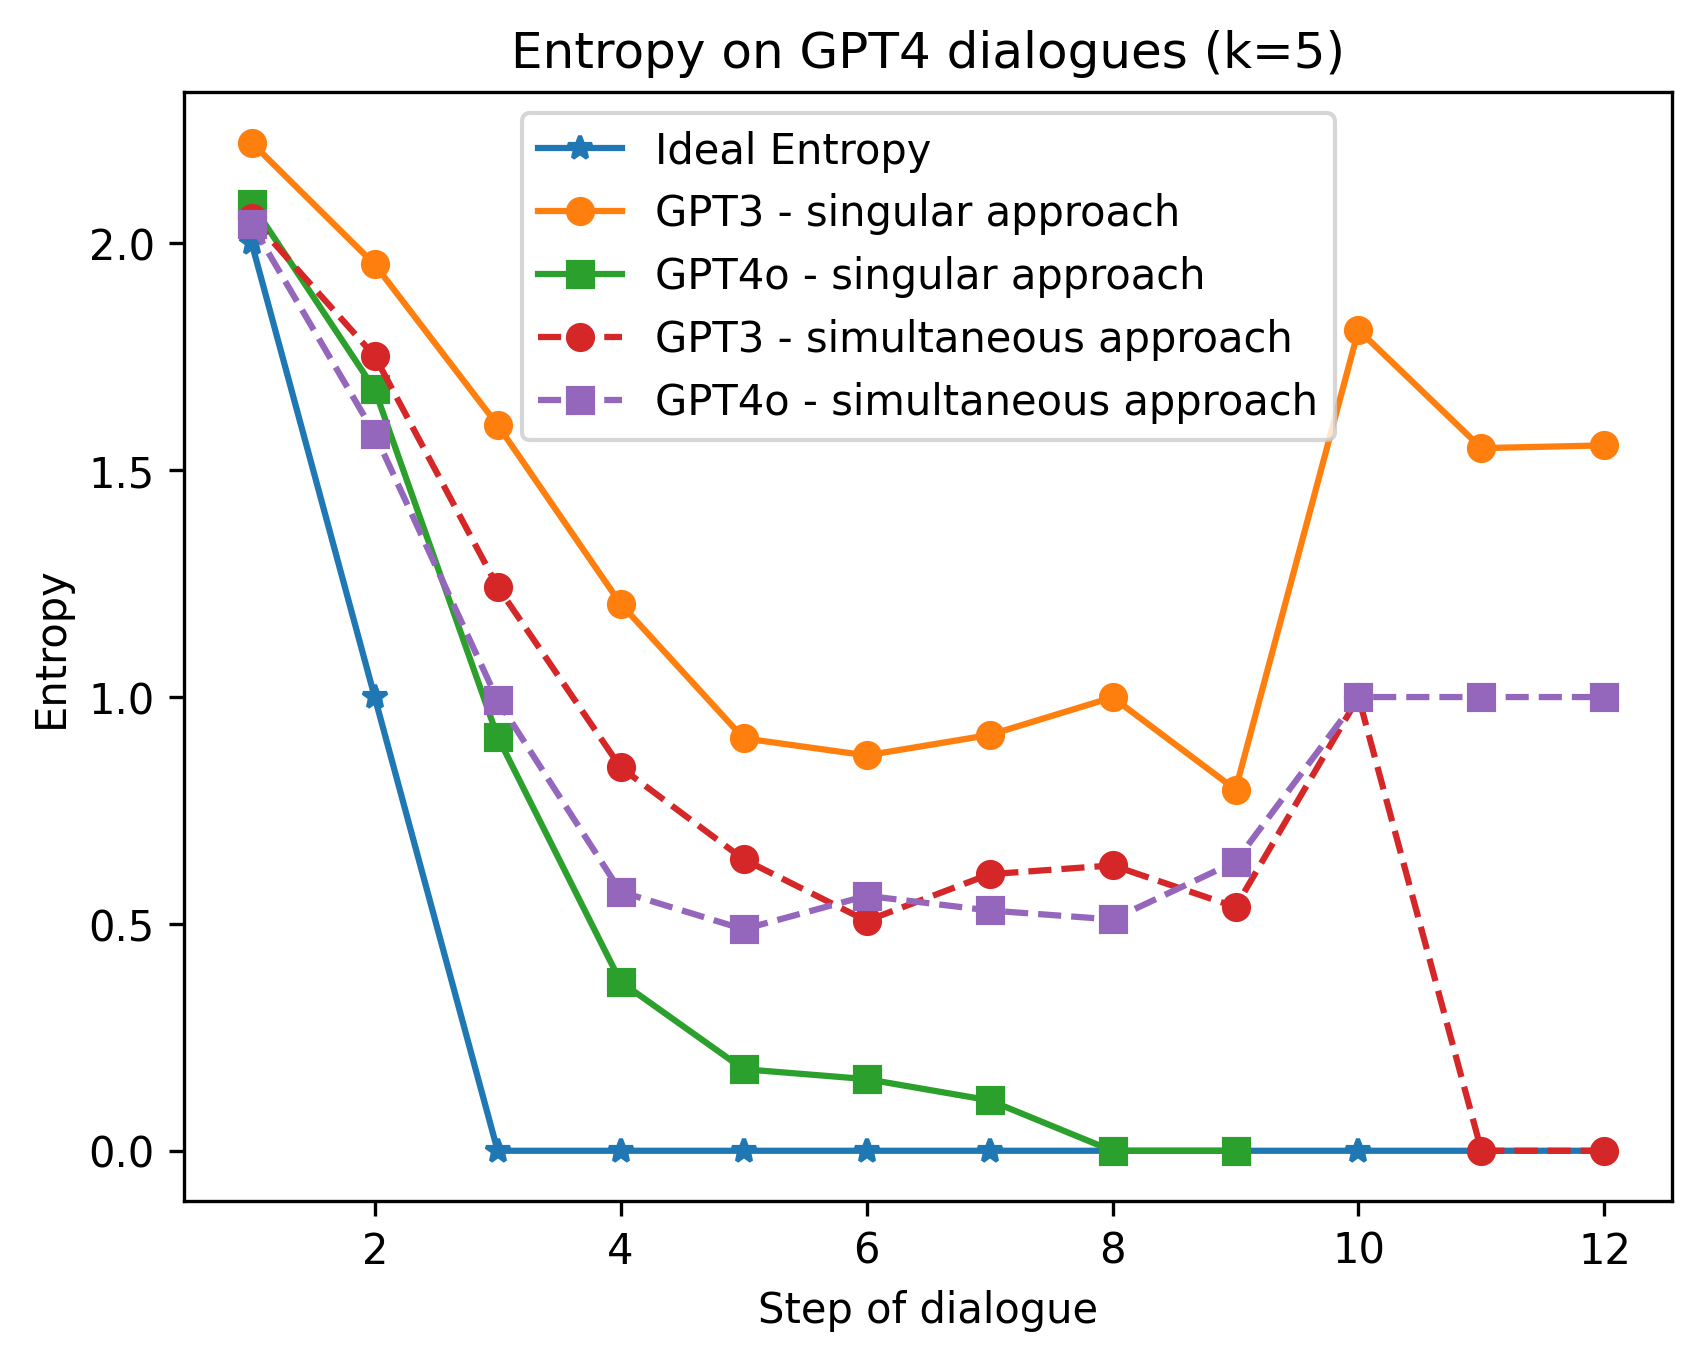

In [52]:
stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_beginning_path = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt4o_statistics_from_dialogue_beginning_sim_app_apocalypse_cleaned.csv"
stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_beginning_path = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt3_statistics_from_dialogue_beginning_sim_app_apocalypse_cleaned.csv"
stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_beginning_path = "./data/generation/8_mcrae/statistics_entropy_gpt4o_app1_on3_k5_apocalypse_cleaned_beginning.csv"
stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_beginning_path = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt4o_statistics_from_dialogue_beginning_apocalypse_cleaned.csv"

stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_beginning_rf = open(stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_beginning_path, 'r', newline='')
stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_beginning_rf = open(stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_beginning_path, 'r', newline='')
stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_beginning_rf = open(stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_beginning_path, 'r', newline='')
stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_beginning_rf = open(stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_beginning_path, 'r', newline='')

stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_beginning_reader = csv.DictReader(stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_beginning_rf, delimiter=",")
stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_beginning_reader = csv.DictReader(stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_beginning_rf, delimiter=",")
stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_beginning_reader = csv.DictReader(stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_beginning_rf, delimiter=",")
stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_beginning_reader = csv.DictReader(stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_beginning_rf, delimiter=",")

stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_beginning = get_mean(stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_beginning_reader, key='mean')
stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_beginning = get_mean(stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_beginning_reader, key='mean')
stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_beginning = get_mean(stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_beginning_reader, key='mean')
stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_beginning = get_mean(stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_beginning_reader, key='mean')

stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_beginning_rf.close()
stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_beginning_rf.close()
stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_beginning_rf.close()
stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_beginning_rf.close()

x_values = range(1, max_dialogue_length_gpt4o + 1)

plt.figure(dpi=300)
plt.plot(x_values, dic_entropies_op_by_distances_beginnig.values(),  marker = '*')
plt.plot(x_values, stat_entropy_gpt4_app1_on3_k5_apocalypse_cleaned_beginning,  marker = 'o')
plt.plot(x_values, stat_entropy_gpt4_app1_on4_k5_apocalypse_cleaned_beginning,  marker = 's')
plt.plot(x_values, stat_entropy_gpt4_app2_on3_k5_apocalypse_cleaned_beginning,  marker = 'o', linestyle='dashed')
plt.plot(x_values, stat_entropy_gpt4_app2_on4_k5_apocalypse_cleaned_beginning,  marker = 's', linestyle='dashed')
plt.xlabel('Step of dialogue')
plt.ylabel('Entropy')
plt.title('Entropy on GPT4 dialogues (k=5)')
plt.legend(['Ideal Entropy', 'GPT3 - singular approach', 'GPT4o - singular approach', 'GPT3 - simultaneous approach', 'GPT4o - simultaneous approach'])

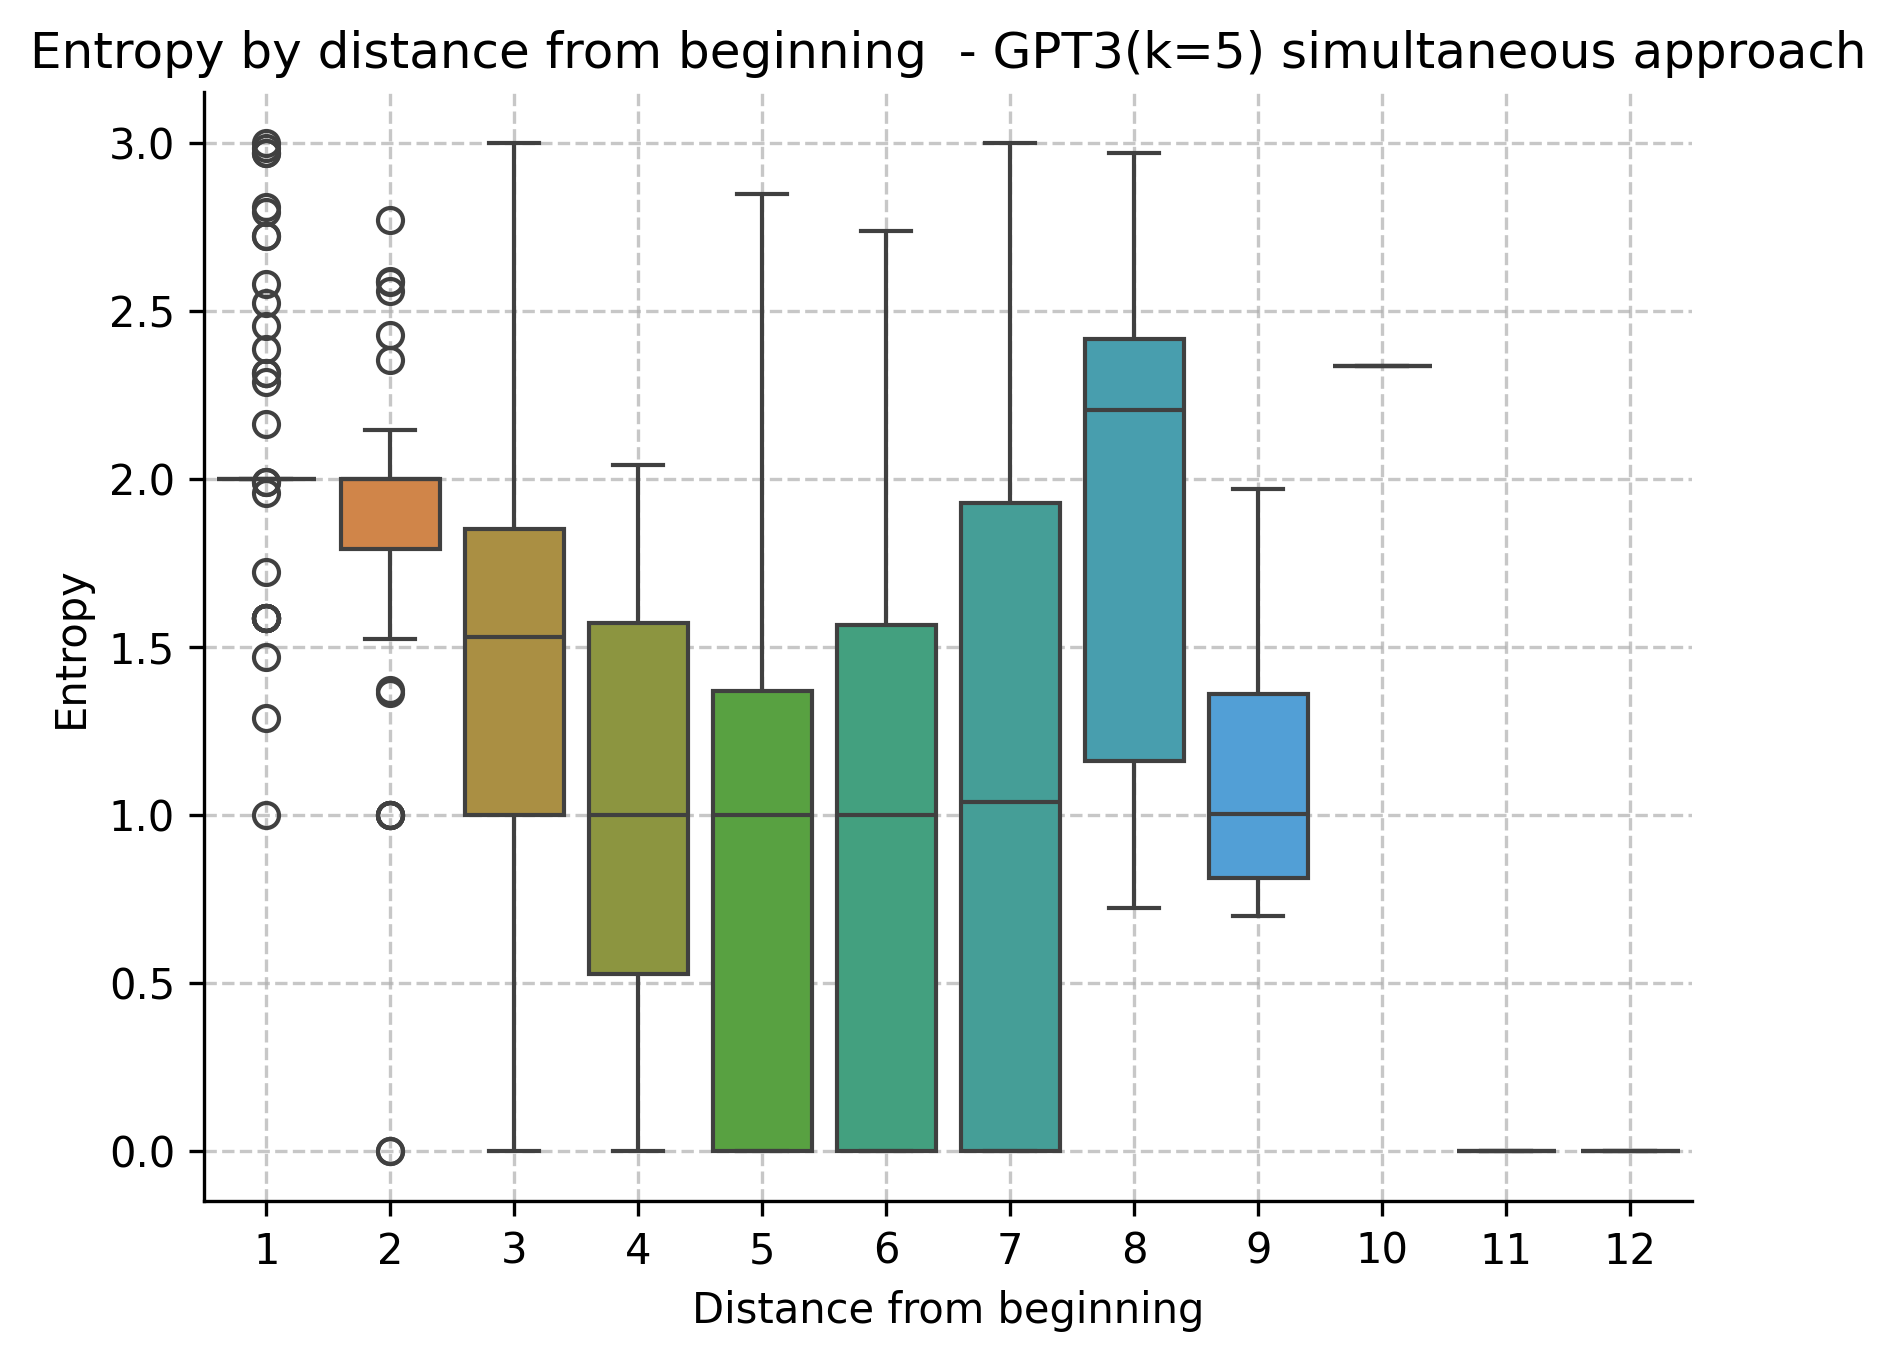

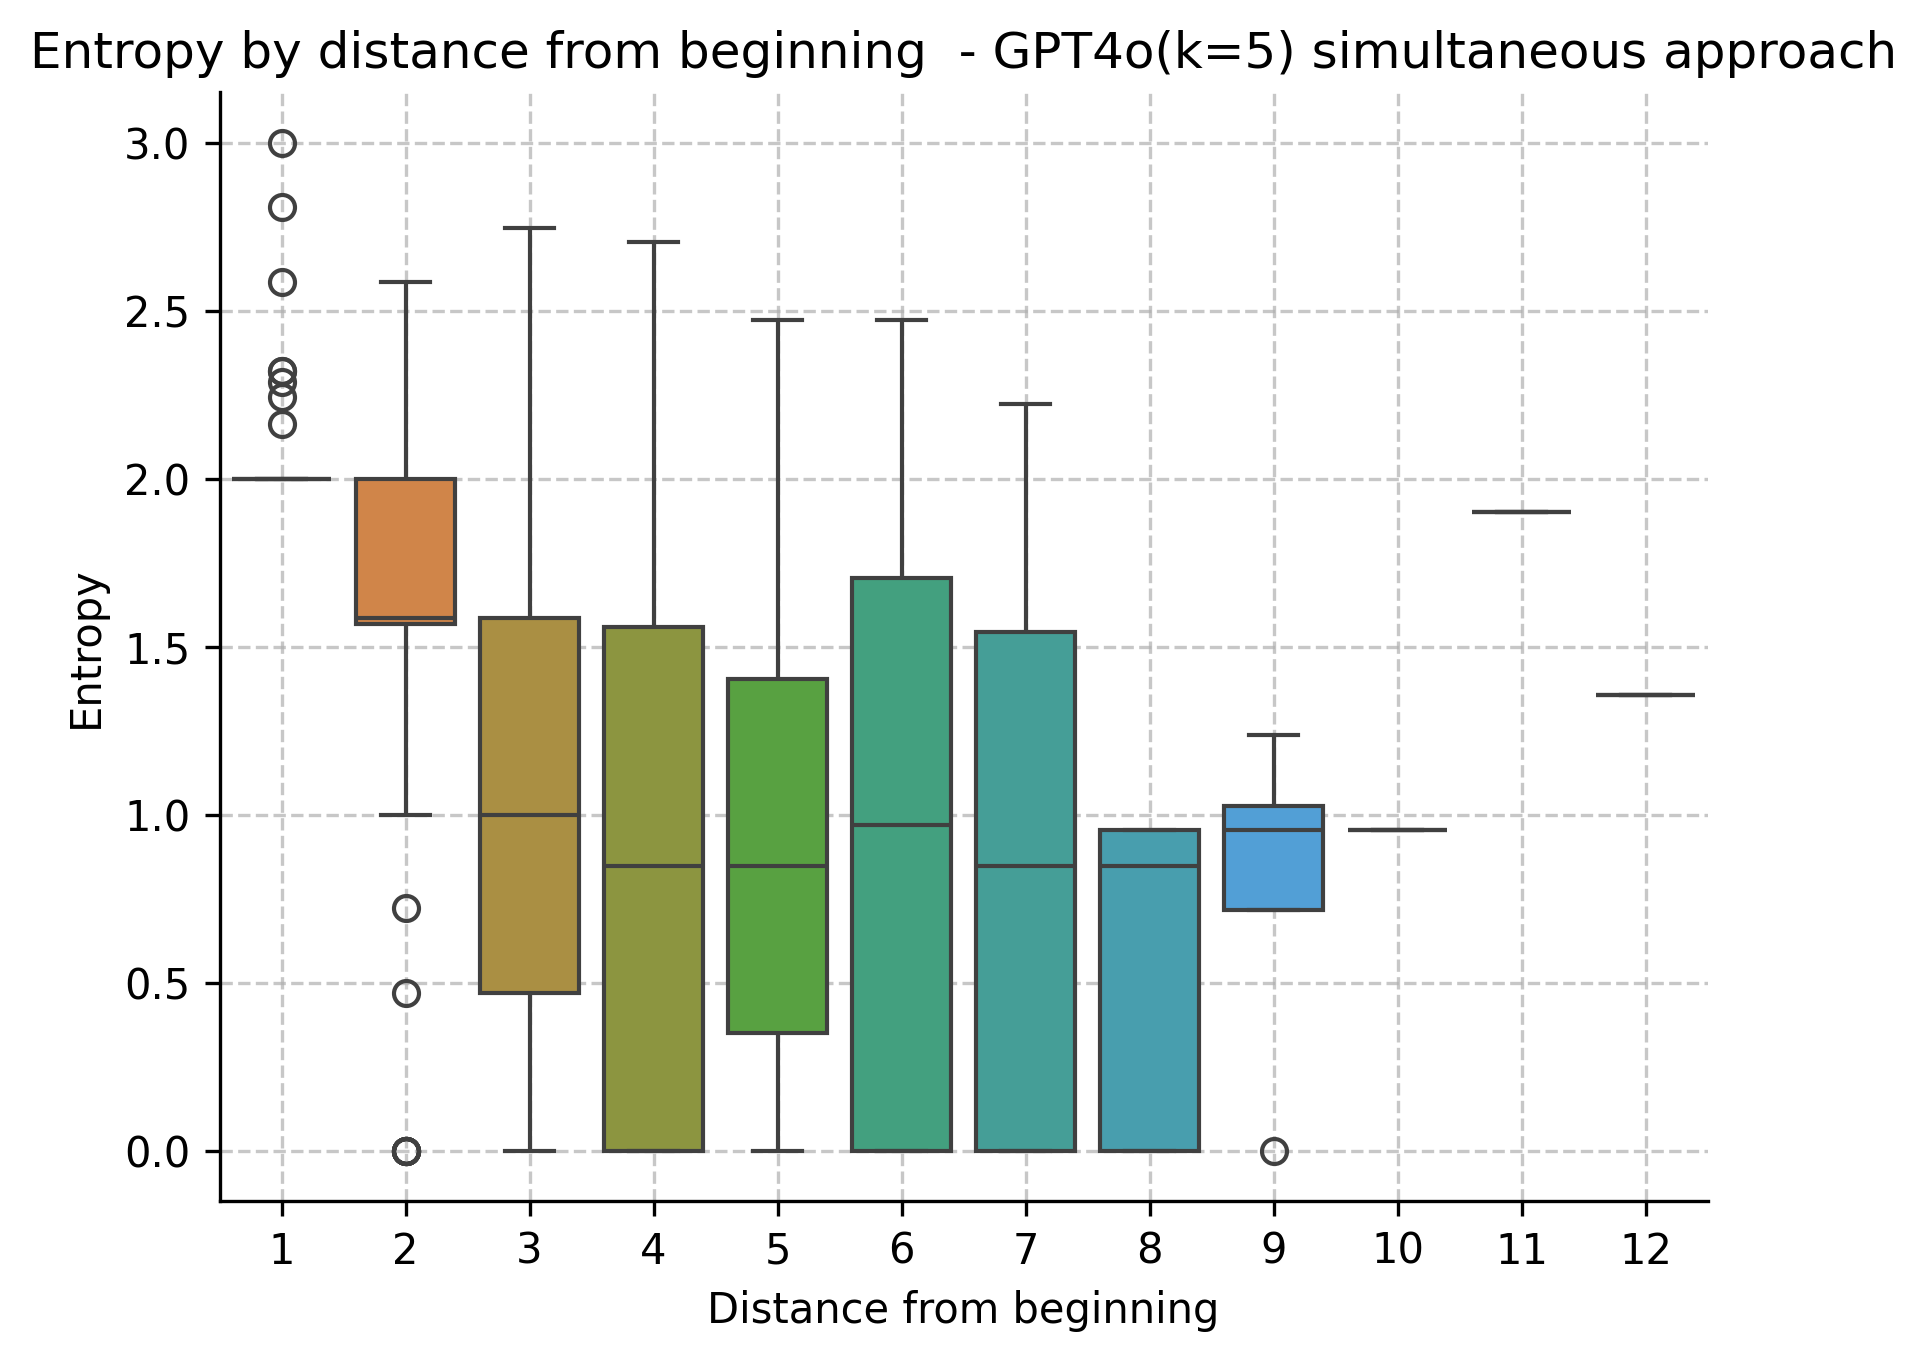

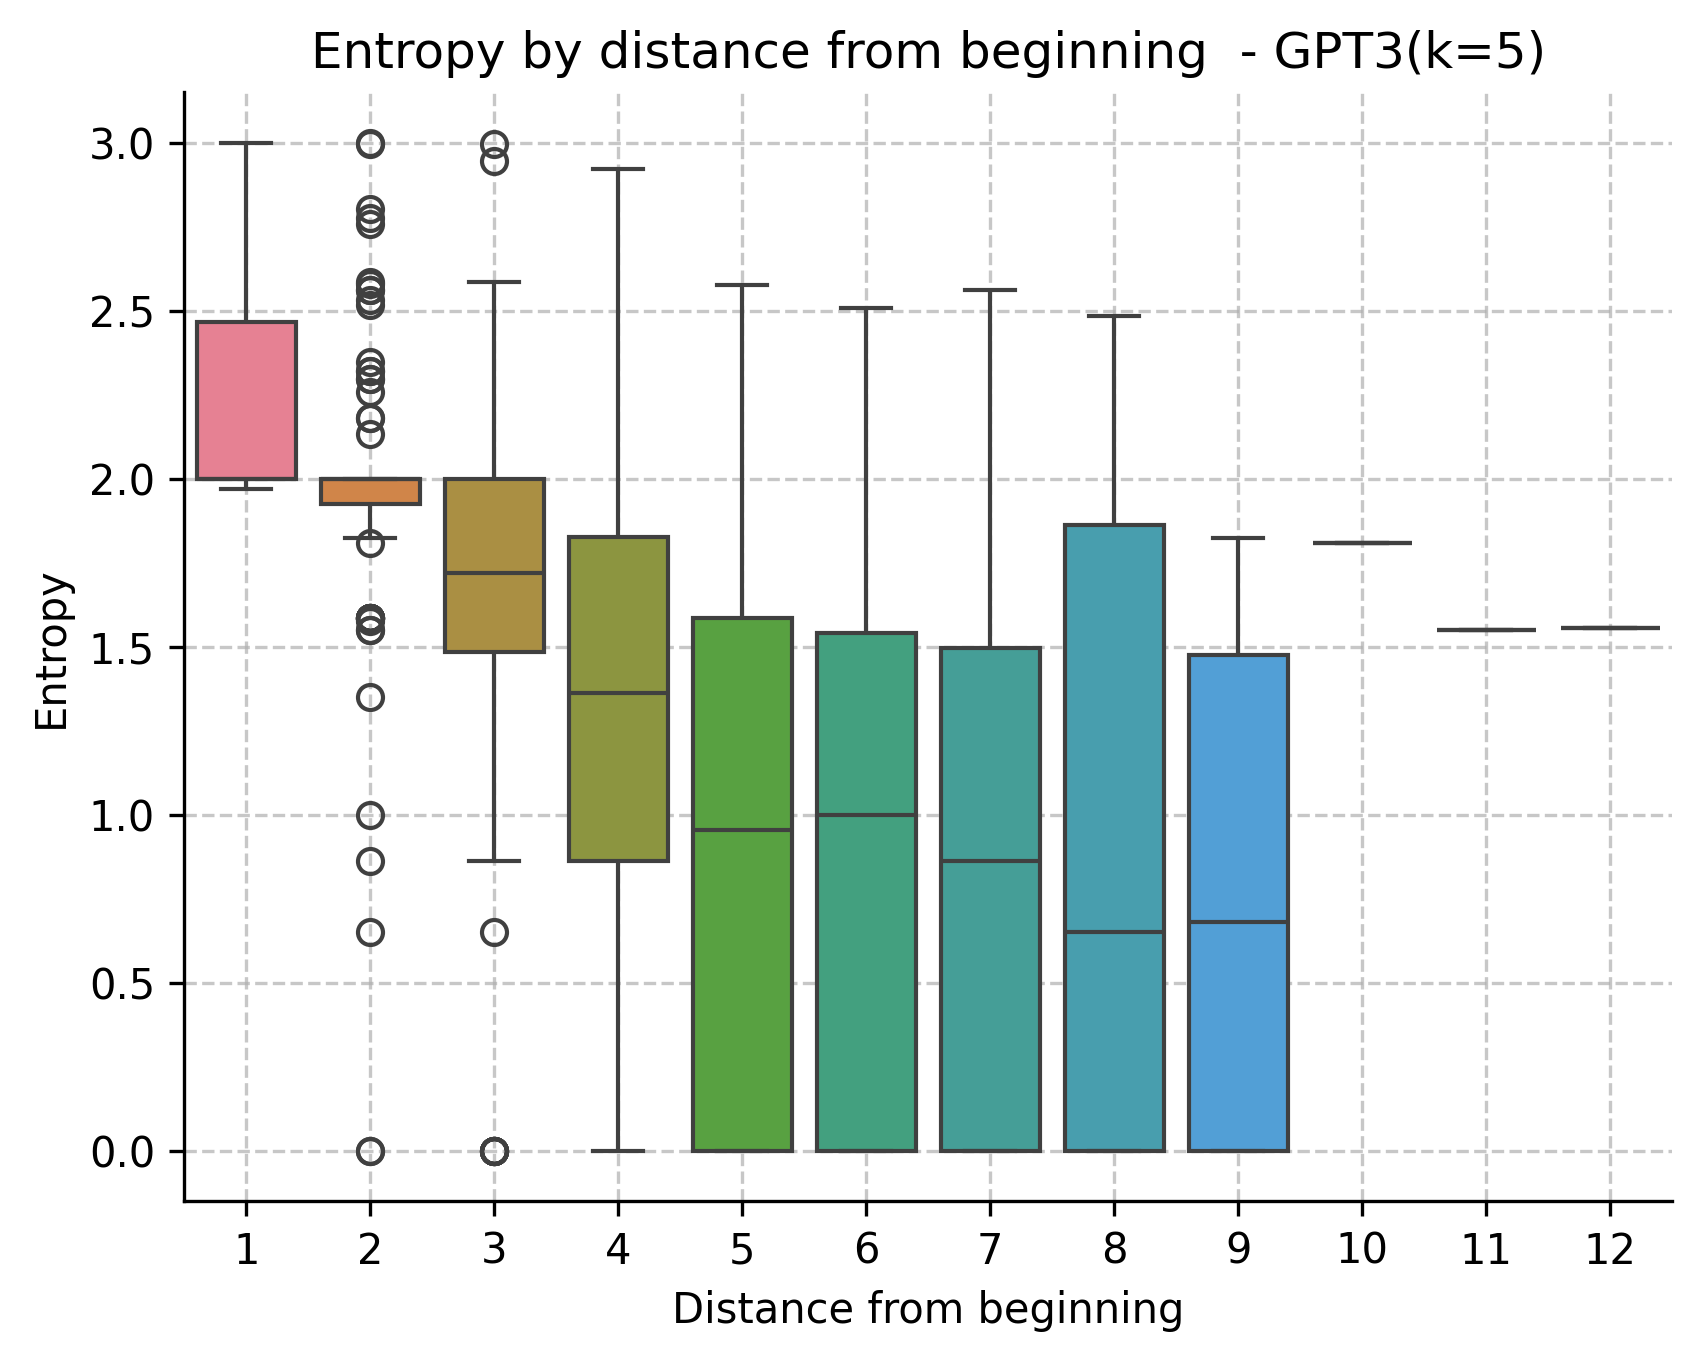

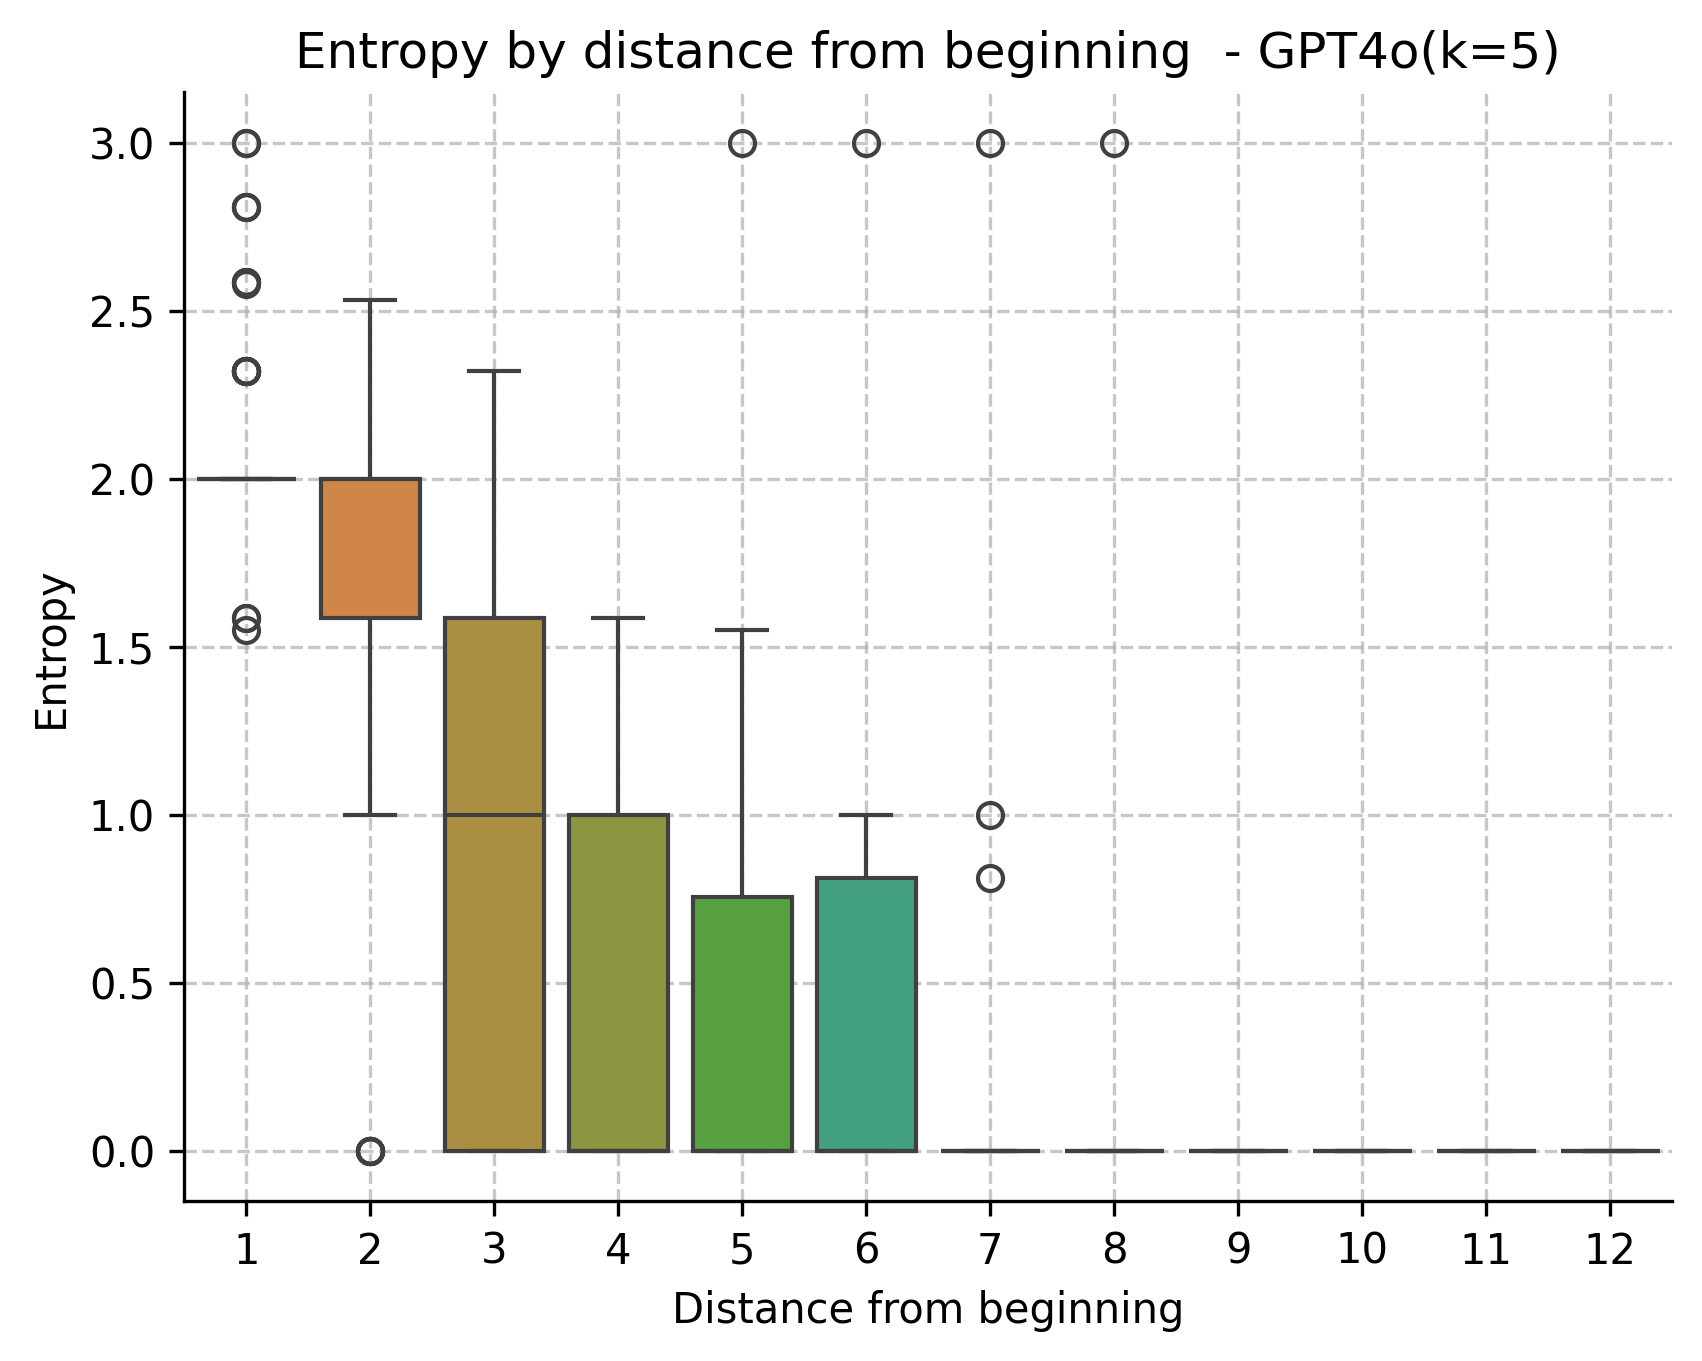

In [53]:
for i, entropies in enumerate(list_entropies):
    entropies_by_distances = []
    for _ in range(0, max_dialogue_length_gpt4o, 1):
        entropies_by_distances.append([])

    for dialogue_entropy in entropies.values():
        for step_index, step_entropy in enumerate(dialogue_entropy):
            # filter invalid entropy values
            if step_entropy != -1.0:
                entropies_by_distances[step_index].append(step_entropy)

    # print(entropies_by_distances[0])
    # Creiamo il box plot usando seaborn
    plt.figure(dpi=300)
    sns.boxplot(data=entropies_by_distances)

    # Modifichiamo le etichette dell'asse x per partire da 1
    plt.xlabel('Distance from beginning')
    plt.ylabel('Entropy')
    plt.title(f'Entropy by distance from beginning  - {labels[i]}')

    # Impostiamo i tick dell'asse x per partire da 1 invece che da 0
    plt.xticks(ticks=range(len(entropies_by_distances)), labels=range(1, len(entropies_by_distances) + 1))

    # Miglioriamo l'estetica generale del grafico
    sns.despine()  # Rimuove le spine del grafico per un aspetto più pulito
    plt.grid(True, linestyle='--', alpha=0.7)  # Aggiunge una griglia per una migliore leggibilità

    # Mostriamo il grafico
    plt.show()

Counter({4: 26, 5: 22, 3: 13, 6: 12, 7: 7, 9: 3, 2: 3, 8: 1, 12: 1})


Text(0.5, 1.0, 'Number of dialogues by length')

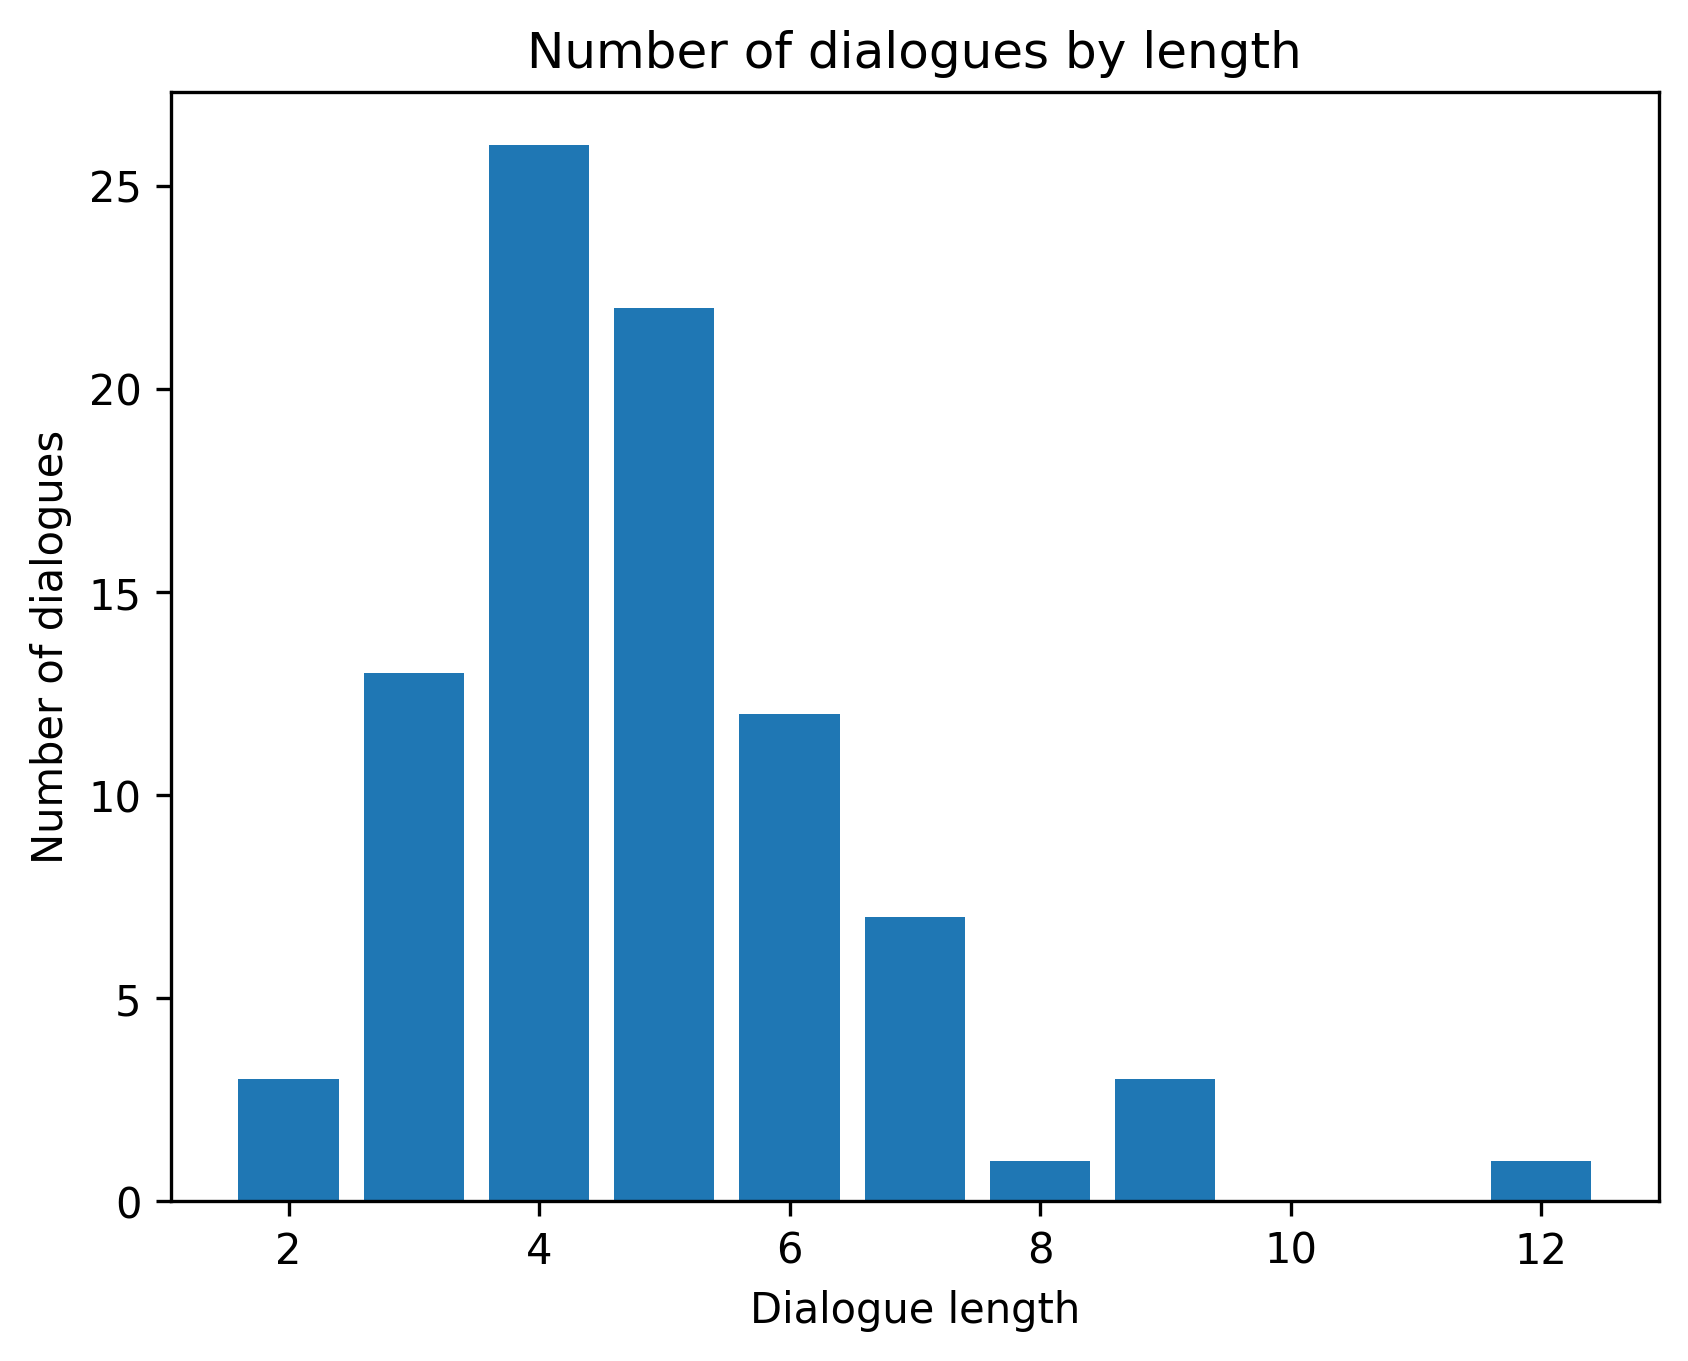

In [54]:
dialogue_lengths = [len(dialogue["intra_dialogues"]) for dialogue in dialogues_gpt4_app1_on3_k5]
counter = Counter(dialogue_lengths)
print(counter)

# display counter in a bar plot
plt.figure(dpi=300)
plt.bar(counter.keys(), counter.values())
plt.xlabel('Dialogue length')
plt.ylabel('Number of dialogues')
plt.title('Number of dialogues by length')

### Bayesian apocalypse

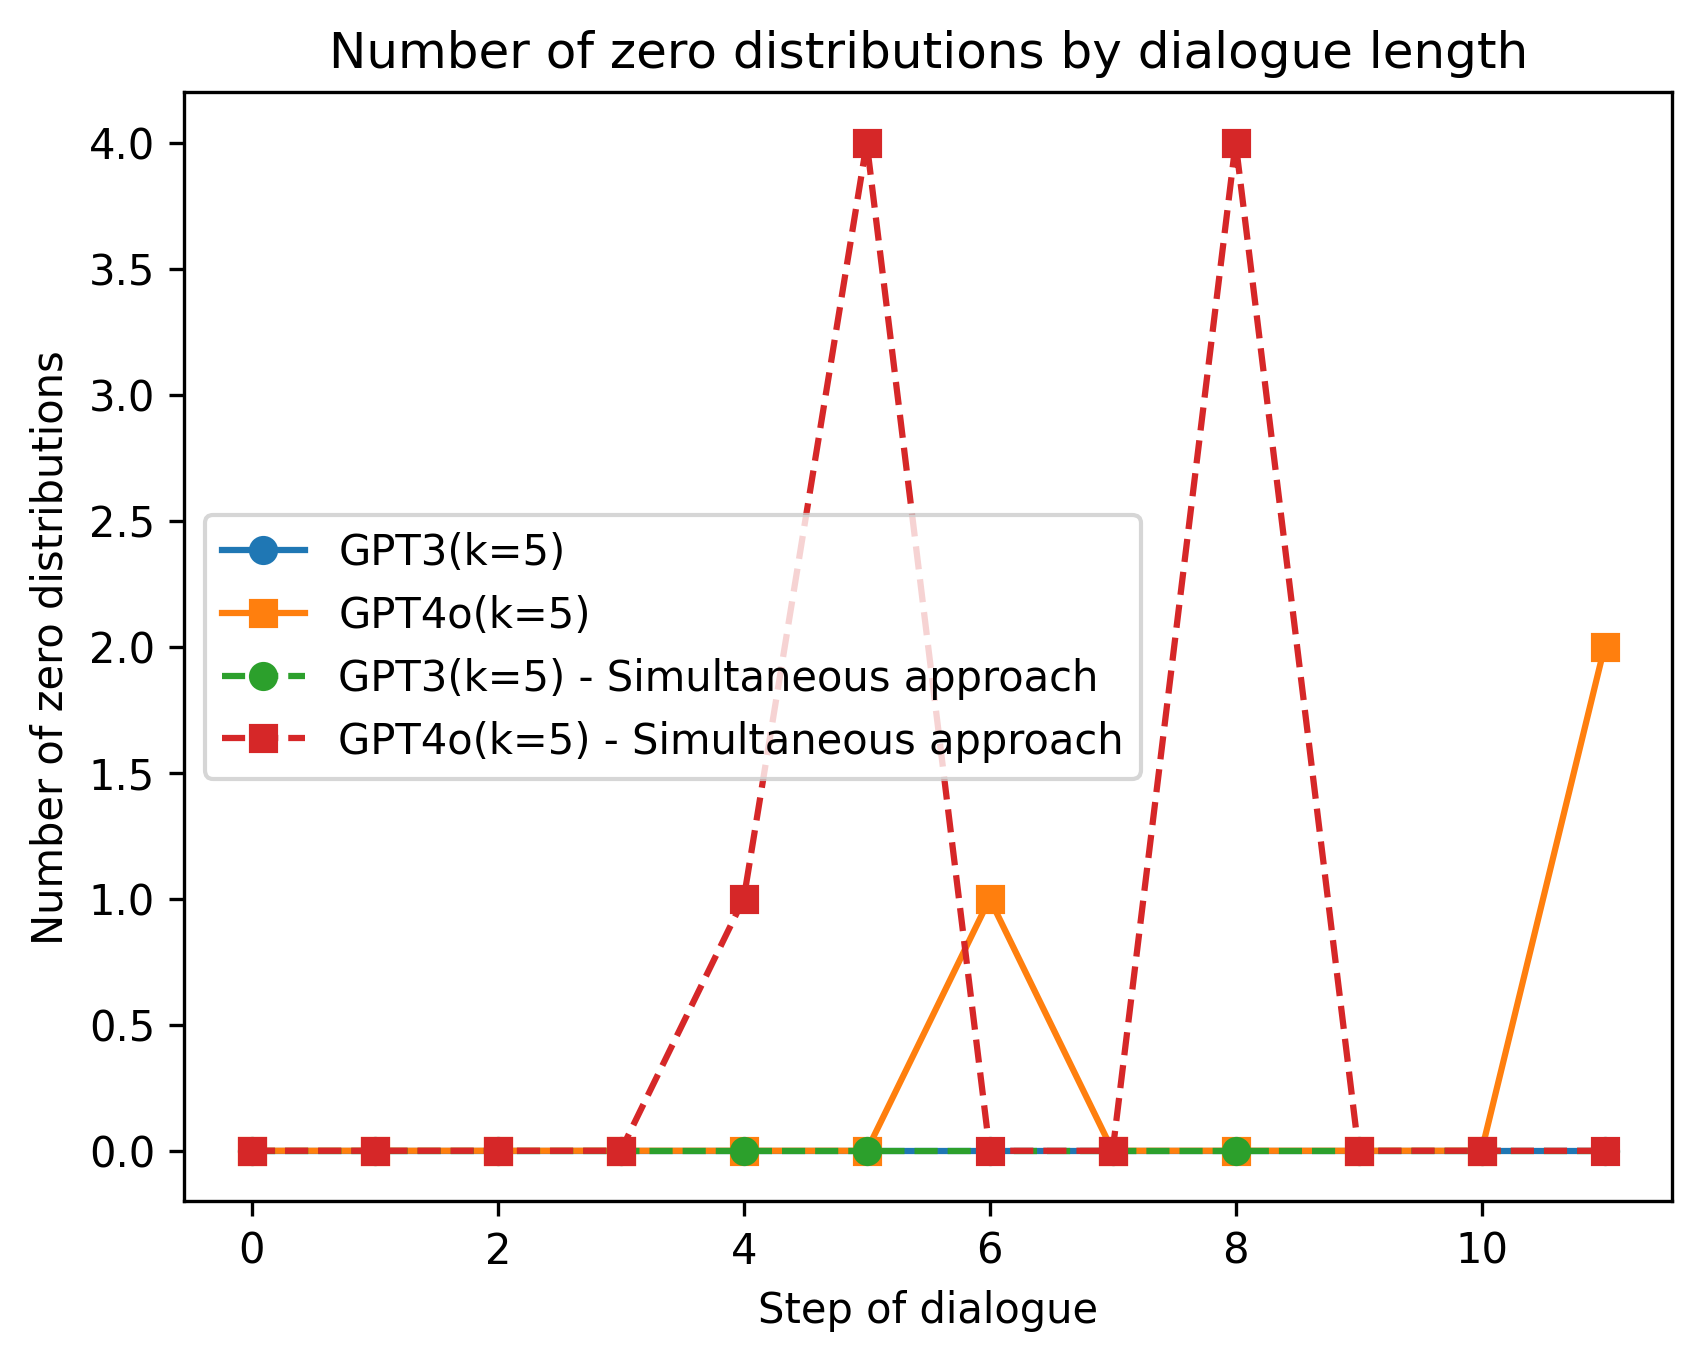

In [107]:
apocalypse_gpt4_app1_on3_k5, apocalypse_norm_gpt4_app1_on3_k5 = apocalypse_by_length_app1(dialogues_data_gpt4o['app1_gpt3ongpt4o_k5'], max_dialogue_length_gpt4o)
apocalypse_gpt4_app1_on4_k5, apocalypse_norm_gpt4_app1_on4_k5 = apocalypse_by_length_app1(dialogues_data_gpt4o['app1_gpt4ongpt4o_k5'], max_dialogue_length_gpt4o)
apocalypse_gpt4_app2_on3_k5, apocalypse_norm_gpt4_app2_on3_k5 = apocalypse_by_length_app2(dialogues_data_gpt4o['app2_gpt3ongpt4o_k5'], max_dialogue_length_gpt4o)
apocalypse_gpt4_app2_on4_k5, apocalypse_norm_gpt4_app2_on4_k5 = apocalypse_by_length_app2(dialogues_data_gpt4o['app2_gpt4ongpt4o_k5'], max_dialogue_length_gpt4o)

plt.figure(dpi=300)
plt.plot(apocalypse_gpt4_app1_on3_k5, marker = 'o')
plt.plot(apocalypse_gpt4_app1_on4_k5, marker = 's')
plt.plot(apocalypse_gpt4_app2_on3_k5, marker = 'o', linestyle='dashed')
plt.plot(apocalypse_gpt4_app2_on4_k5, marker = 's', linestyle='dashed')
plt.xlabel('Step of dialogue')
plt.ylabel('Number of zero distributions')
plt.title('Number of zero distributions by dialogue length')
plt.legend(['GPT3(k=5)', 'GPT4o(k=5)', 'GPT3(k=5) - Simultaneous approach', 'GPT4o(k=5) - Simultaneous approach'])
plt.show()

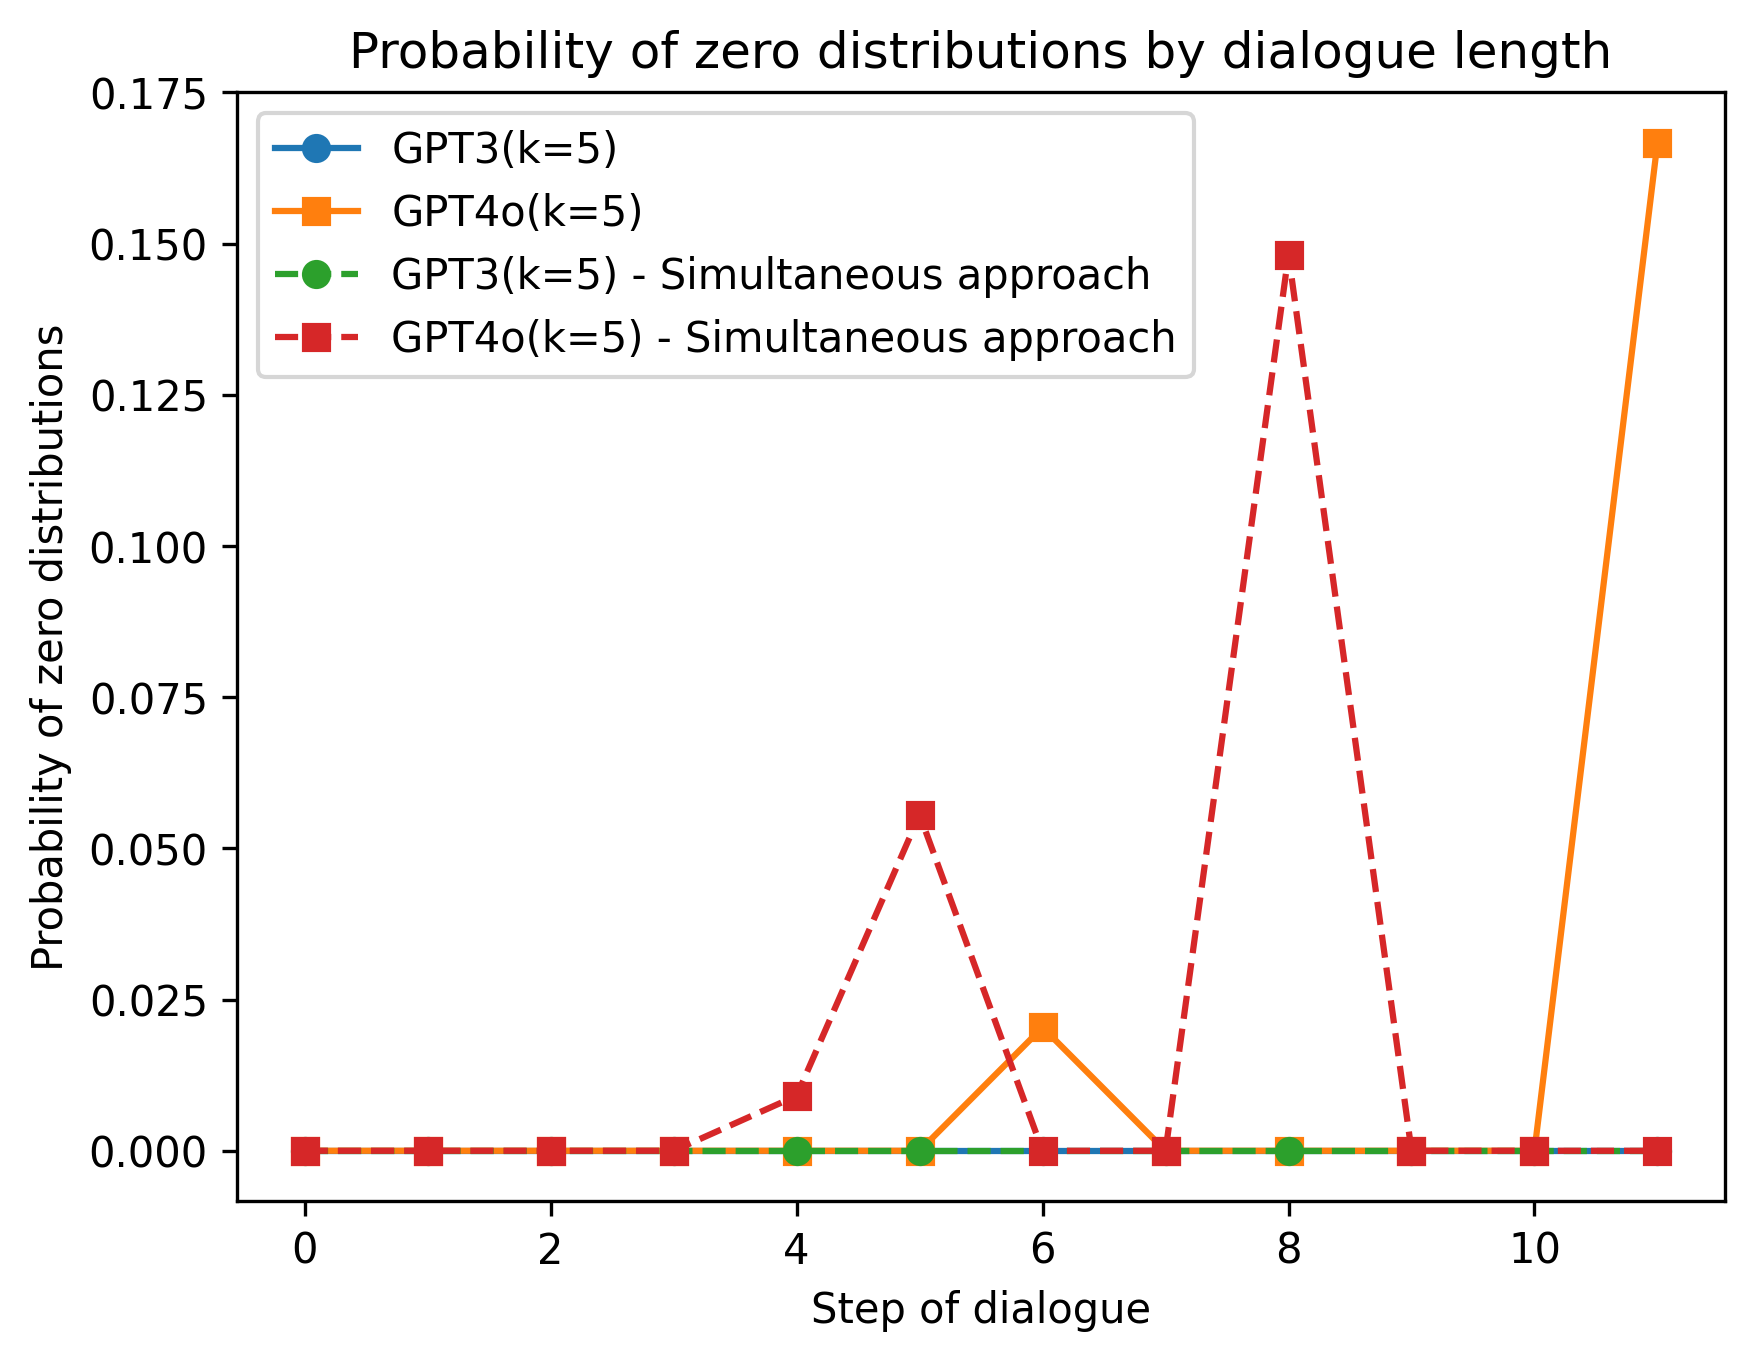

In [108]:
plt.figure(dpi=300)
plt.plot(apocalypse_norm_gpt4_app1_on3_k5, marker = 'o')
plt.plot(apocalypse_norm_gpt4_app1_on4_k5, marker = 's')
plt.plot(apocalypse_norm_gpt4_app2_on3_k5, marker = 'o', linestyle='dashed')
plt.plot(apocalypse_norm_gpt4_app2_on4_k5, marker = 's', linestyle='dashed')
plt.xlabel('Step of dialogue')
plt.ylabel('Probability of zero distributions')
plt.title('Probability of zero distributions by dialogue length')
plt.legend(['GPT3(k=5)', 'GPT4o(k=5)', 'GPT3(k=5) - Simultaneous approach', 'GPT4o(k=5) - Simultaneous approach'])
plt.show()

### Resurected

In [110]:
def compute_resurrected_items_p_sum(grouped_data):
  p_summatory = 0
  counter = 0
  for dialogue_id, dialogue in enumerate(grouped_data):
    #print("DIALOGUE: , ", dialogue["dialogue_id"])
    intra_dialogues = dialogue["intra_dialogues"]
    for i in range(0, len(dialogue["intra_dialogues"])):
      resurrected_items = []
      resurrected_p = 0
      
      if(i != 0):
        current_distr = intra_dialogues[i]["p_distribuition"]
        previous_distr = intra_dialogues[i-1]["p_distribuition"]
        
        # finding resurrected items
        for item in list(current_distr.keys()):
          if(previous_distr[item] == 0 and current_distr[item] > previous_distr[item]):
            resurrected_items.append(item)
        
        for item in resurrected_items:
          resurrected_p += current_distr[item]
          
        p_summatory += resurrected_p
        counter += 1
        
      grouped_data[dialogue_id]["intra_dialogues"][i]["resurrected_items"] = resurrected_items
      grouped_data[dialogue_id]["intra_dialogues"][i]["resurrected_items_p"] = resurrected_p
  
  resurrected_p_average = p_summatory / counter
  
  return grouped_data, resurrected_p_average

five_analyzed_data, five_r_p_average = compute_resurrected_items_p_sum(dialogues_data_gpt4o['app1_gpt3ongpt4o_k5'])
five_gpt4o_analyzed_data, five_gpt4o_r_p_average = compute_resurrected_items_p_sum(dialogues_data_gpt4o['app1_gpt4ongpt4o_k5'])

print("Resurrected avg GPT3 (k=5): ", five_r_p_average)
print("Resurrected avg GPT4o (k=5): ", five_gpt4o_r_p_average)

Resurrected avg GPT3 (k=5):  0.08885427728613567
Resurrected avg GPT4o (k=5):  0.03540855457227139


In [111]:
resurected_gpt4_app1_on3_k5, resurected_norm_gpt4_app1_on3_k5 = resurected_items_length_app1(dialogues_data_gpt4o['app1_gpt3ongpt4o_k5'], max_dialogue_length_gpt4o)
resurected_gpt4_app1_on4_k5, resurected_norm_gpt4_app1_on4_k5 = resurected_items_length_app1(dialogues_data_gpt4o['app1_gpt4ongpt4o_k5'], max_dialogue_length_gpt4o)
resurected_gpt4_app2_on3_k5, resurected_norm_gpt4_app2_on3_k5 = resurected_items_length_app2(dialogues_data_gpt4o['app2_gpt3ongpt4o_k5'], max_dialogue_length_gpt4o)
resurected_gpt4_app2_on4_k5, resurected_norm_gpt4_app2_on4_k5 = resurected_items_length_app2(dialogues_data_gpt4o['app2_gpt4ongpt4o_k5'], max_dialogue_length_gpt4o)


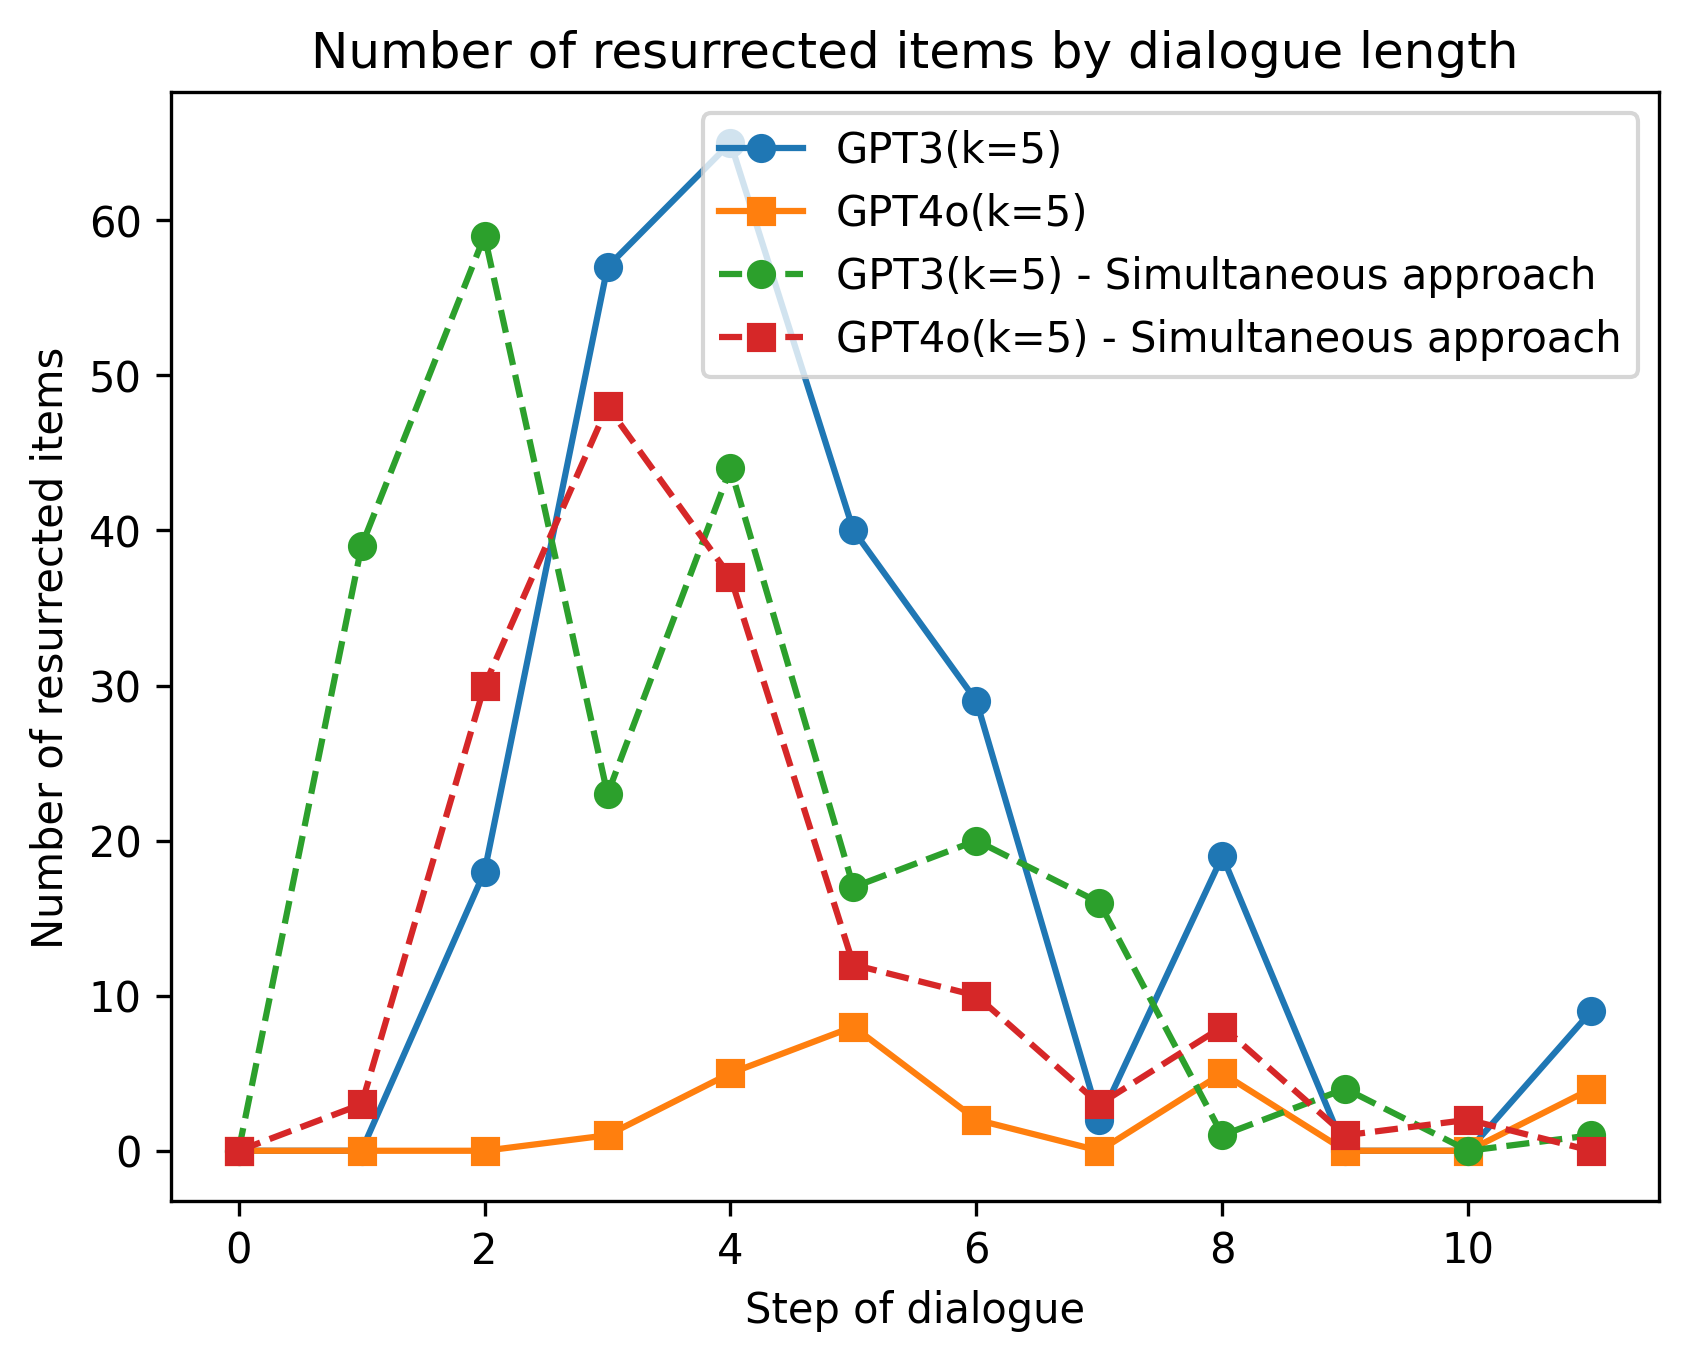

In [112]:
plt.figure(dpi=300)
plt.plot(resurected_gpt4_app1_on3_k5, marker = 'o')
plt.plot(resurected_gpt4_app1_on4_k5, marker = 's')
plt.plot(resurected_gpt4_app2_on3_k5, marker = 'o', linestyle='dashed')
plt.plot(resurected_gpt4_app2_on4_k5, marker = 's', linestyle='dashed')
plt.xlabel('Step of dialogue')
plt.ylabel('Number of resurrected items')
plt.title('Number of resurrected items by dialogue length')
plt.legend(['GPT3(k=5)', 'GPT4o(k=5)', 'GPT3(k=5) - Simultaneous approach', 'GPT4o(k=5) - Simultaneous approach'])
plt.show()

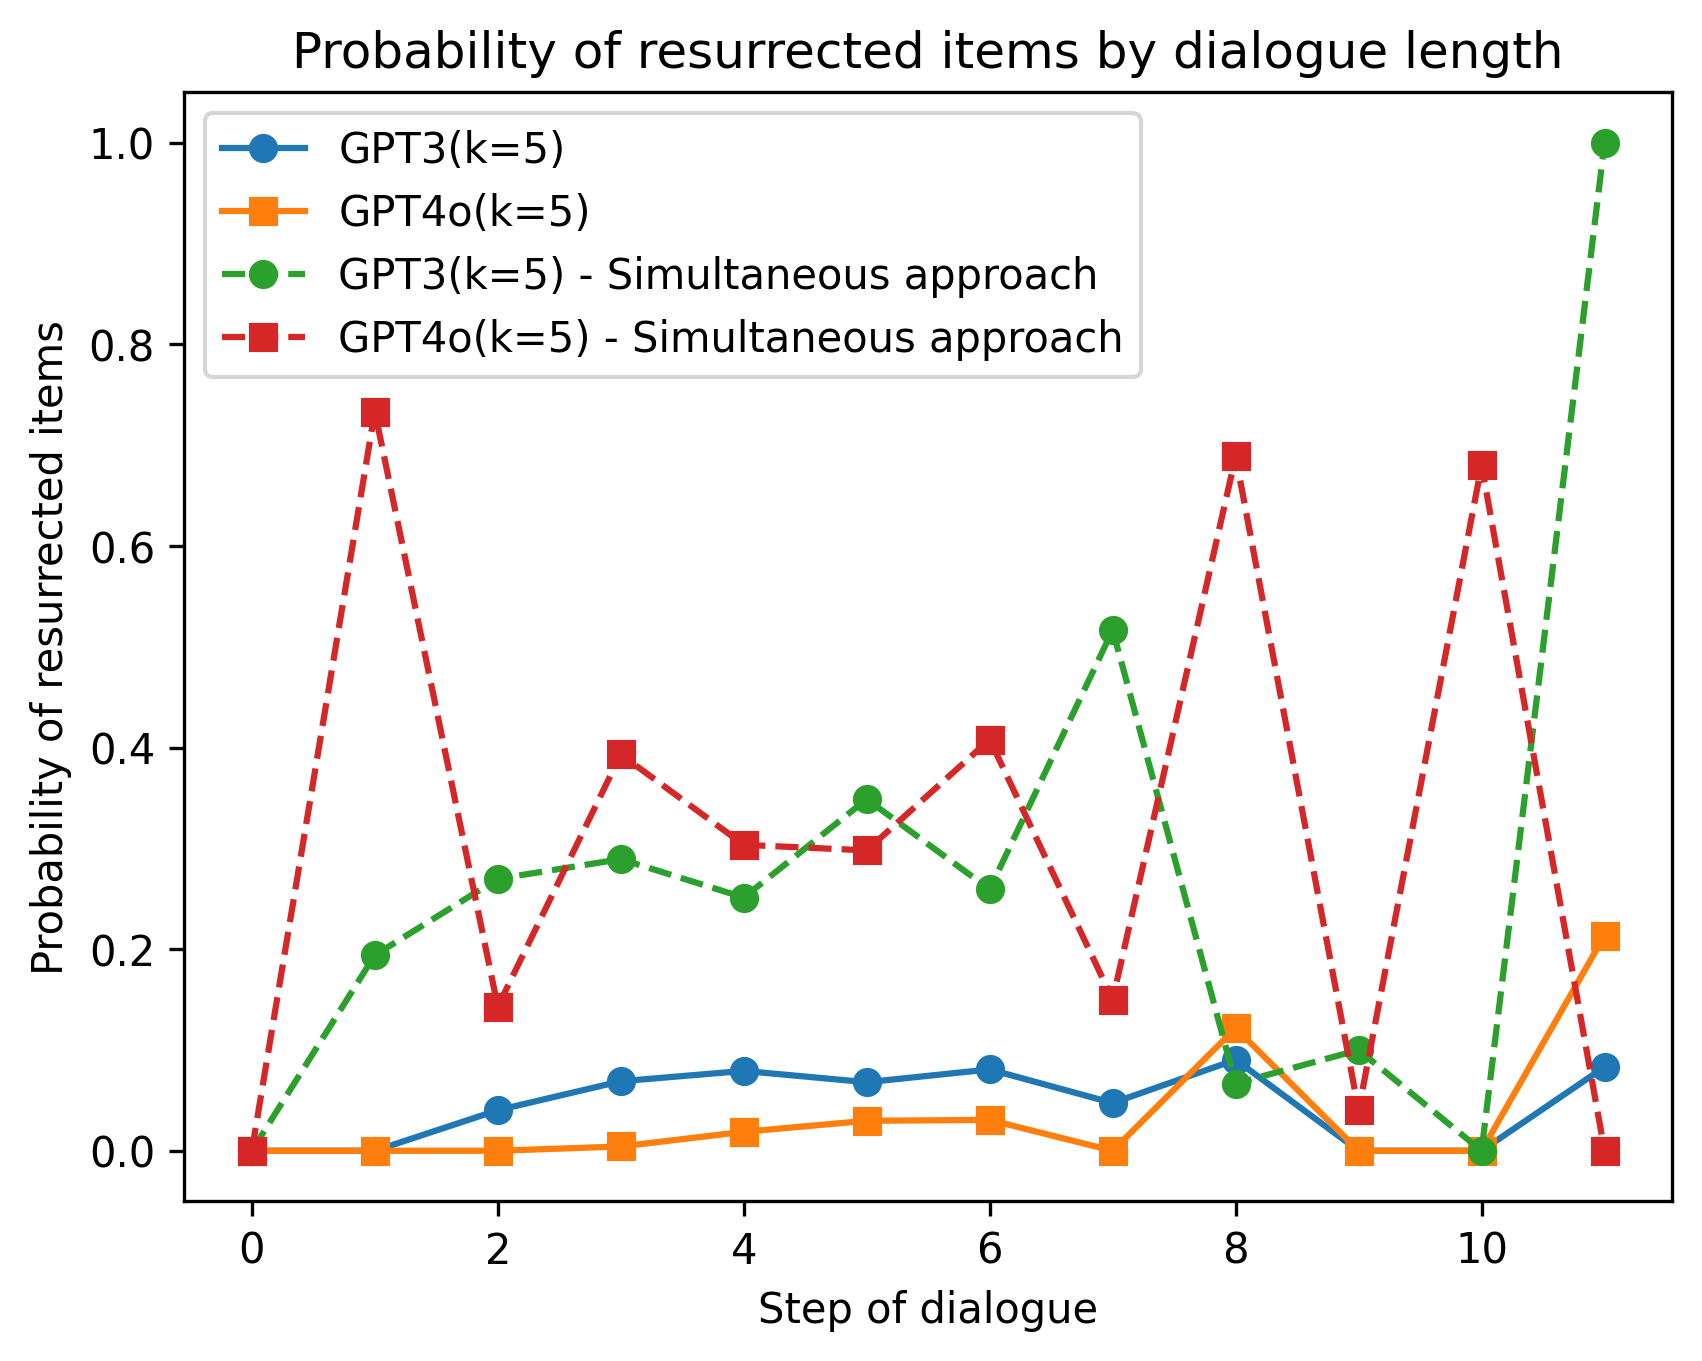

In [113]:
plt.figure(dpi=300)
plt.plot(resurected_norm_gpt4_app1_on3_k5, marker = 'o')
plt.plot(resurected_norm_gpt4_app1_on4_k5, marker = 's')
plt.plot(resurected_norm_gpt4_app2_on3_k5, marker = 'o', linestyle='dashed')
plt.plot(resurected_norm_gpt4_app2_on4_k5, marker = 's', linestyle='dashed')
plt.xlabel('Step of dialogue')
plt.ylabel('Probability of resurrected items')
plt.title('Probability of resurrected items by dialogue length')
plt.legend(['GPT3(k=5)', 'GPT4o(k=5)', 'GPT3(k=5) - Simultaneous approach', 'GPT4o(k=5) - Simultaneous approach'])
plt.show()

### Ongoing dialogues comparison 

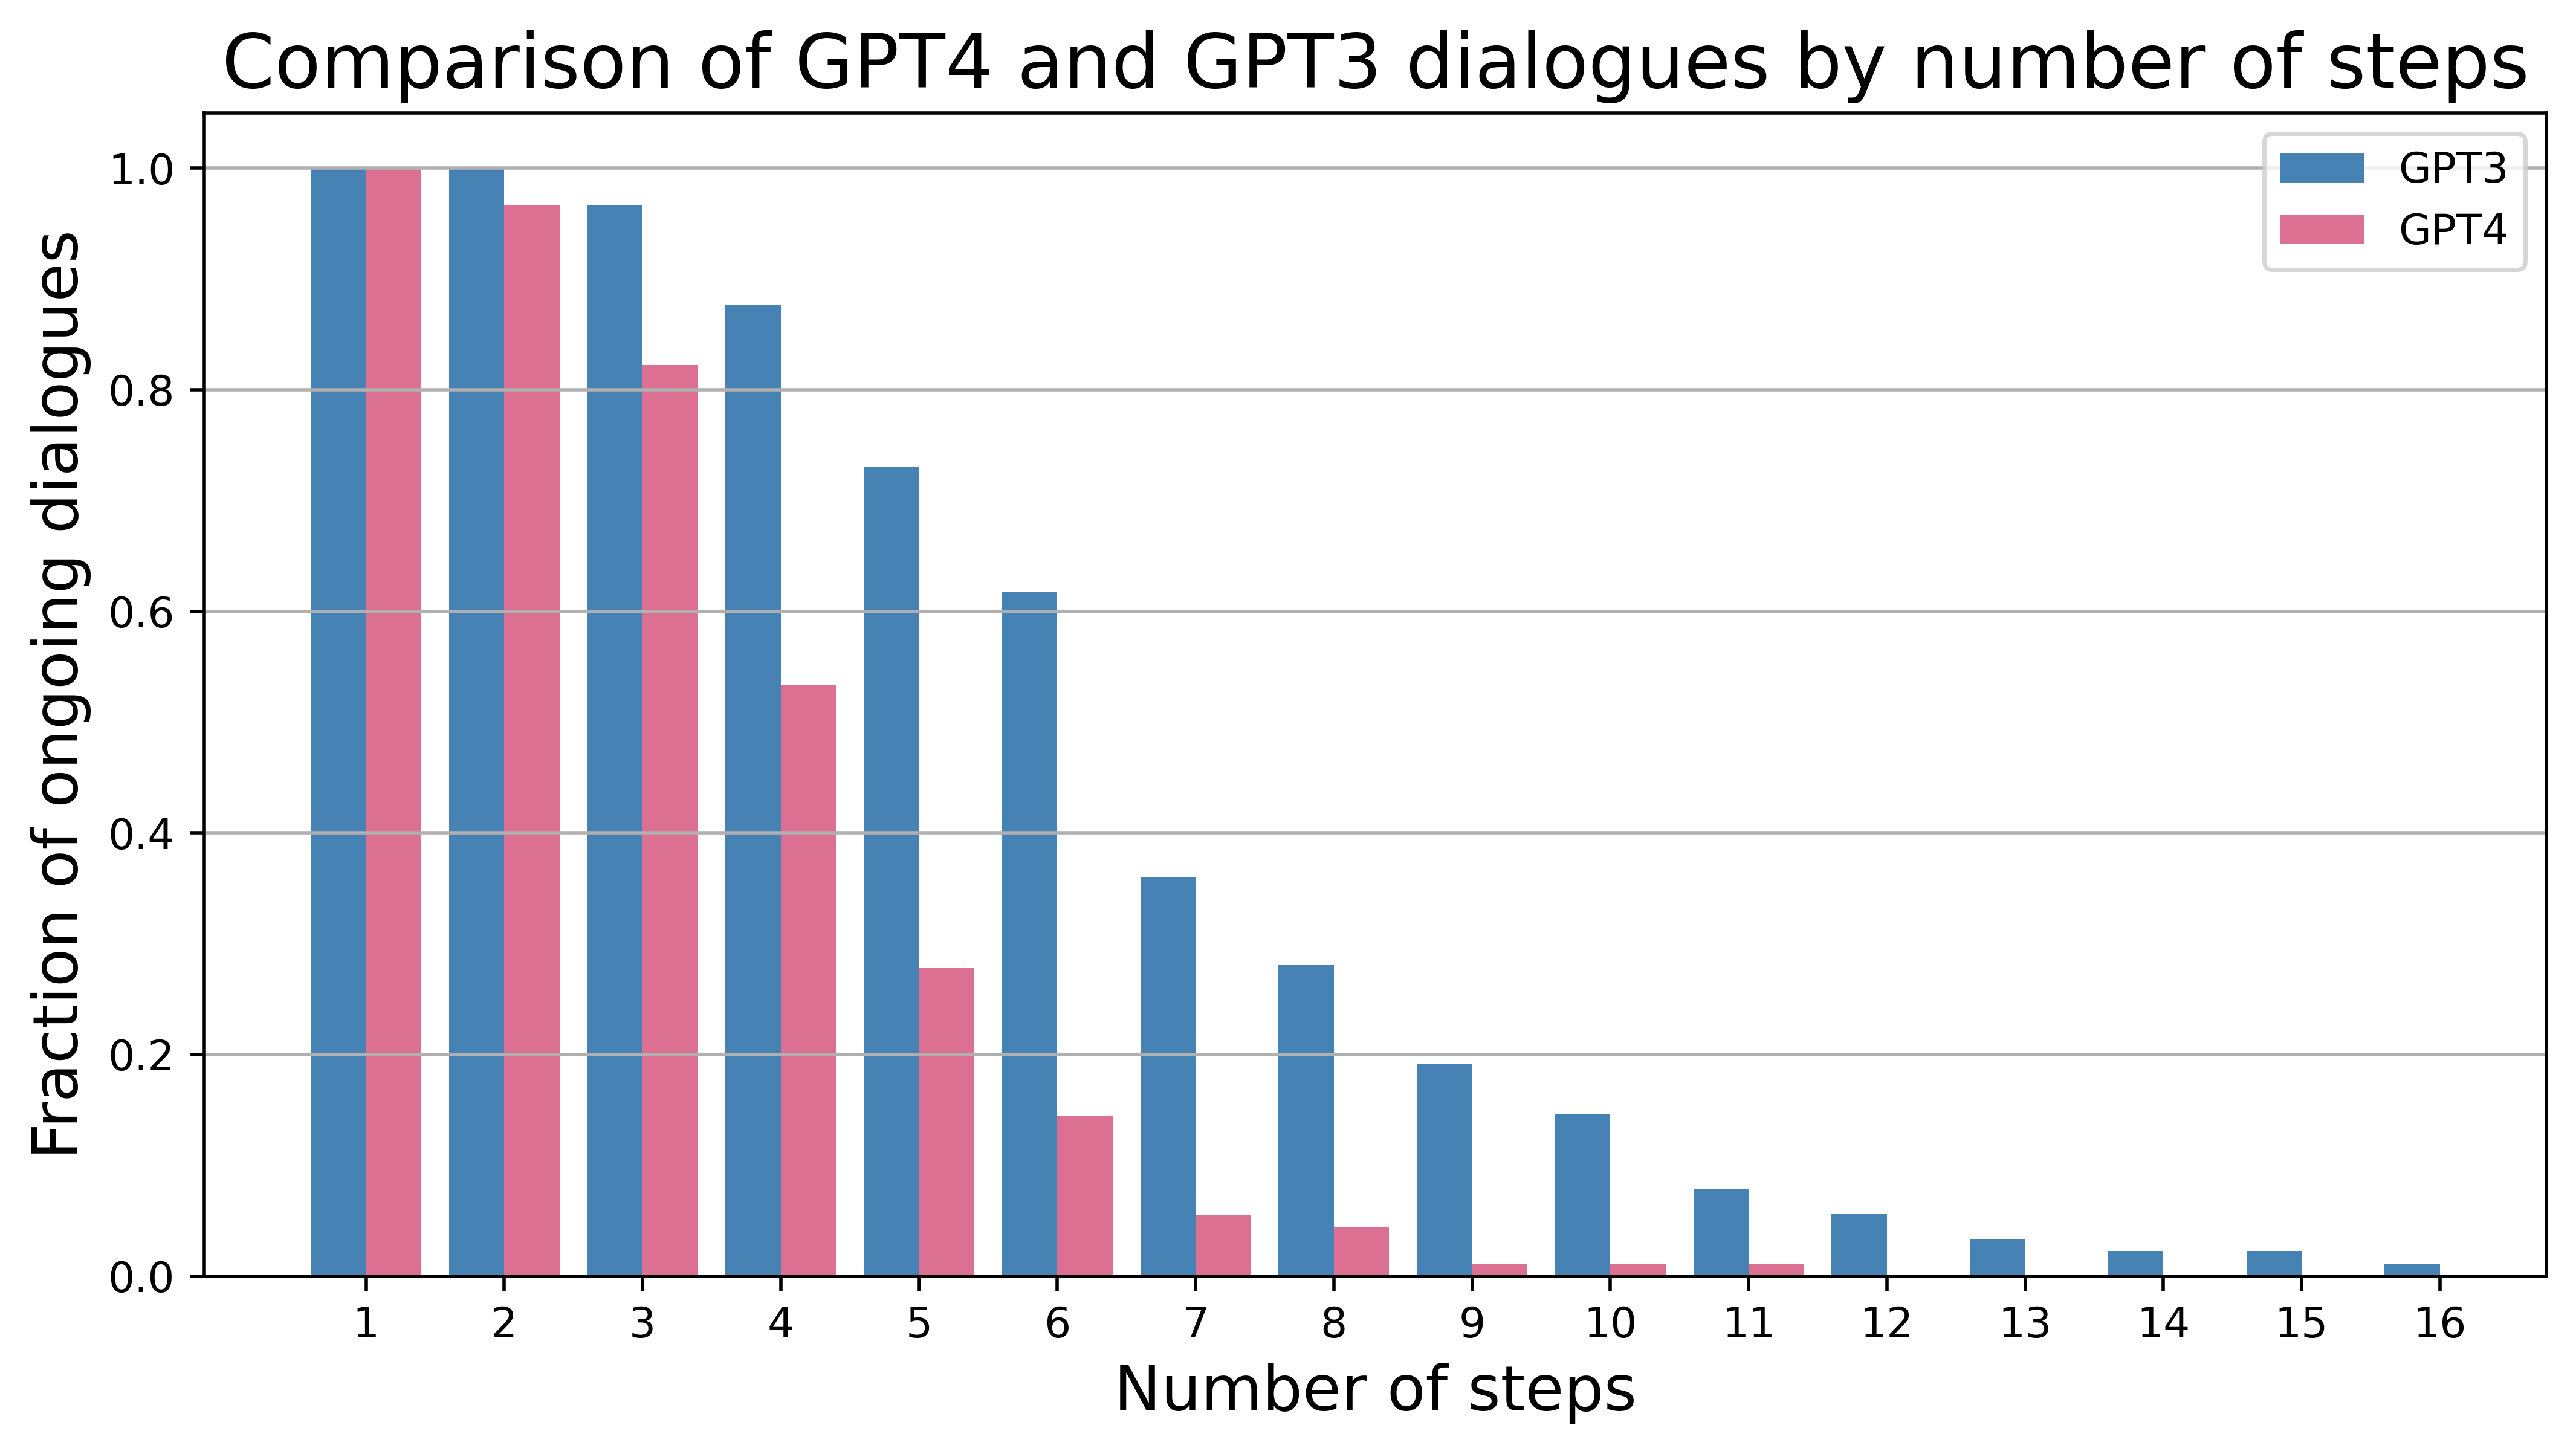

In [102]:
gpt3_durations = [1, 1, 0.9662921348, 0.8764044944, 0.7303370787, 0.6179775281, 0.3595505618, 0.2808988764, 0.191011236,
                  0.1460674157, 0.07865168539, 0.05617977528, 0.03370786517, 0.02247191011, 0.02247191011, 0.01123595506]
gpt4_durations = [1, 0.9666666667, 0.8222222222, 0.5333333333, 0.2777777778, 0.1444444444,
                  0.05555555556, 0.04444444444, 0.01111111111, 0.01111111111,0.01111111111]

# Number of steps corresponding to the durations
steps_gpt3 = np.arange(1, len(gpt3_durations) + 1)
steps_gpt4 = np.arange(1, len(gpt4_durations) + 1)

# Plotting the data
plt.figure(figsize=(10, 5), dpi=500)
plt.bar(steps_gpt3 - 0.2, gpt3_durations, width=0.4, label='GPT3', color='steelblue')
plt.bar(steps_gpt4 + 0.2, gpt4_durations, width=0.4, label='GPT4', color='palevioletred')

# Adding labels and title
plt.xlabel('Number of steps', fontsize=15)
plt.ylabel('Fraction of ongoing dialogues', fontsize=15)
plt.title('Comparison of GPT4 and GPT3 dialogues by number of steps', fontsize=18)
plt.legend()

# Show the plot
plt.xticks(np.arange(1, max(len(gpt3_durations), len(gpt4_durations)) + 1))
plt.grid(axis='y')
plt.show()